In [10]:
import os, sys, shutil
import rasterio
import numpy as np
import geopandas as gpd
import pandas as pd


from glob import glob
from rasterio.warp import transform_bounds
from shapely.geometry import Polygon
from pyproj import Transformer
from matplotlib import pyplot as plt

module_path = os.path.abspath(".") + "/code"
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset import load_scenario
from Scenario_sampler import ScenarioSampler

In [6]:
# utils

def return_first_scenario(path):
    chosen_subfolder = None
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_dir() and entry.name != '.DS_Store':
                chosen_subfolder = entry.name
                break
    if chosen_subfolder is None:
        raise ValueError("No subfolder found")
    return chosen_subfolder



def read_first_and_last_lines(file_path):
    with open(file_path, 'rb') as file:
        # Read the first line
        first_line = file.readline().decode()

        # Move to the end of the file
        file.seek(0, os.SEEK_END)
        file_size = file.tell()
        if file_size == 0:
            return '', ''  # Empty file

        pos = file_size - 1

        # Skip trailing newlines at the end of the file
        while pos >= 0:
            file.seek(pos, os.SEEK_SET)
            char = file.read(1)
            if char != b'\n' and char != b'\r':
                break
            pos -= 1

        # Now find the previous newline (start of last line)
        while pos >= 0:
            file.seek(pos, os.SEEK_SET)
            if file.read(1) == b'\n':
                pos += 1
                break
            pos -= 1
        else:
            pos = 0  # The last line is also the first line

        file.seek(pos, os.SEEK_SET)
        last_line = file.readline().decode()

    return first_line, last_line


def read_first_and_last_lines2(file_path):
    with open(file_path, 'r') as file:
        # Read the first line
        first_line = file.readline()

        # Move to the end of the file
        file.seek(-1, 2)  # 2 means seek from the end

        # Read until a newline is found
        last_line = ''
        while True:
            char = file.read(1)
            if char == '\n' or file.tell() == 1:
                break
            last_line = char + last_line
            file.seek(-2, 1)  # Move back two characters

    return first_line, last_line

from datetime import datetime
def find_earliest_latest_dates(layout_path):
    """
    Find the earliest and latest dates in a layout folder.
    """
    earliest_date = None
    latest_date = None
    for filename in os.listdir(os.path.join(layout_path, "Weather_Data")):
        if filename.endswith(".txt"):
            first_line, last_line = read_first_and_last_lines(os.path.join(layout_path, "Weather_Data", filename))
            first_date = " ".join(first_line.split(" ")[:4])
            last_date = " ".join(last_line.split(" ")[:4])
            first_date = datetime.strptime(first_date, "%Y %m %d %H%M")
            last_date = datetime.strptime(last_date, "%Y %m %d %H%M")
            if earliest_date is None or first_date < earliest_date:
                earliest_date = first_date
            if latest_date is None or last_date > latest_date:
                latest_date = last_date
    return earliest_date, latest_date

In [7]:
fires_gdf = gpd.read_file("./FPA_FOD_20221014.gpkg") # 6th edition # gpd.read_file("./FPA_FOD_20210617.gpkg") 5th edition  
fires_gdf['DISCOVERY_DATE'] = pd.to_datetime(fires_gdf['DISCOVERY_DATE'])
fires_gdf = fires_gdf.to_crs("EPSG:4326")

/opt/anaconda3/envs/wildfire/lib/python3.11/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'FPA_FOD_20221014.gpkg': 'Fires' (default), 'NWCG_UnitIdActive_20200123'. Specify layer parameter to avoid this warning.
  result = read_func(


Copied the layout tifs to sim2real_layouts
loaded the layout list
loaded the fires
0101_02057
Earliest date: 2020-09-02 00:00:00, Latest date: 2020-09-23 23:00:00
Sampler built with 18328 ignition points.


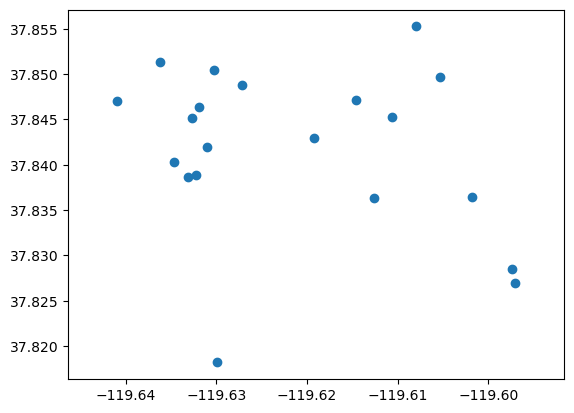

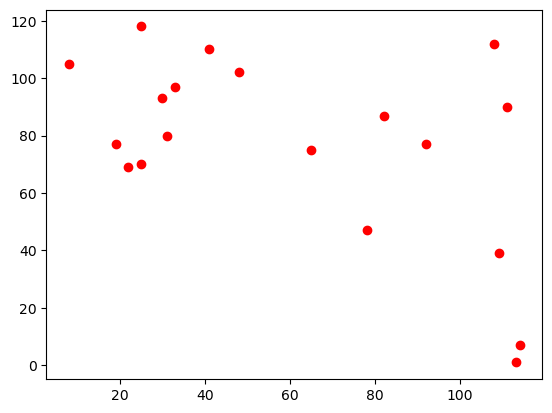

Failed 1
0279_03823
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-07 23:00:00
Sampler built with 31743 ignition points.


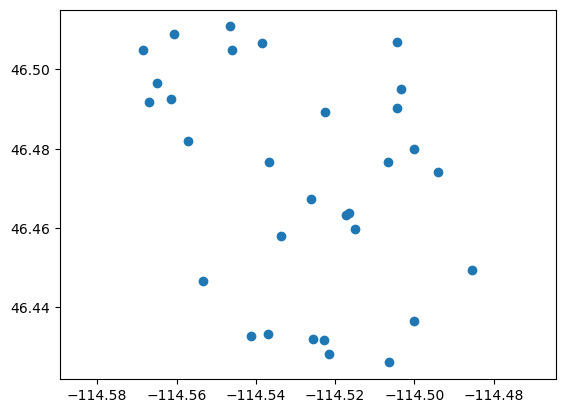

Scenario 0279_02384 has the wrong size for layout 0279_03823: 184 != 181 or 358 != 187


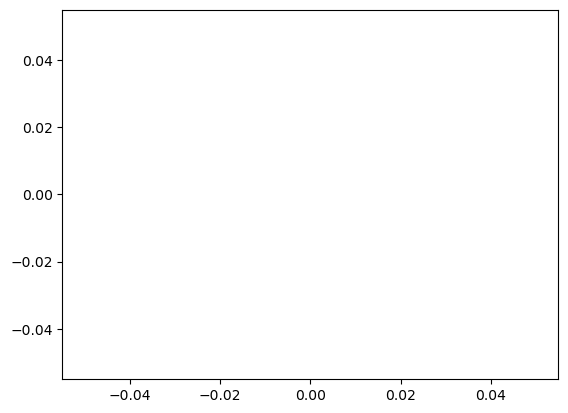

Failed 0
0280_03717
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-07 23:00:00
Sampler built with 32838 ignition points.


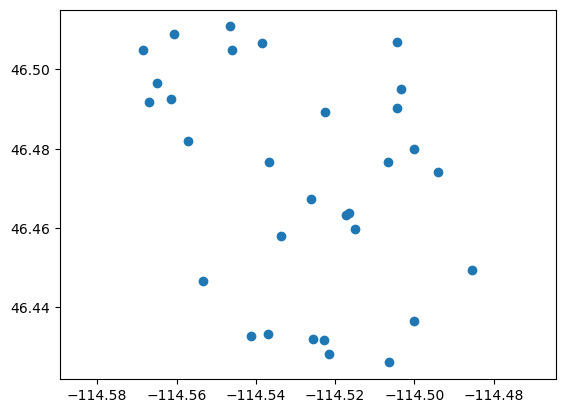

Scenario 0280_02802 has the wrong size for layout 0280_03717: 184 != 180 or 358 != 202


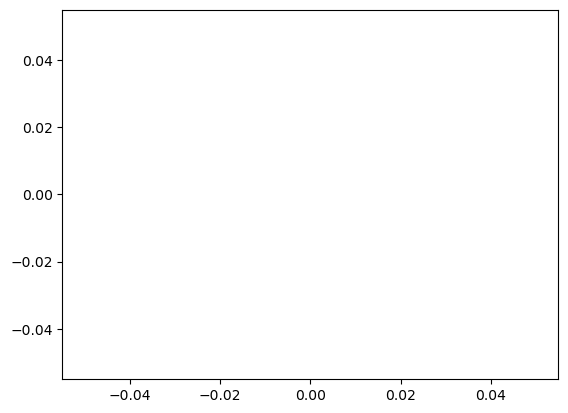

Failed 0
0014_00426
Earliest date: 2023-07-21 00:00:00, Latest date: 2023-08-09 23:00:00
Sampler built with 9406 ignition points.


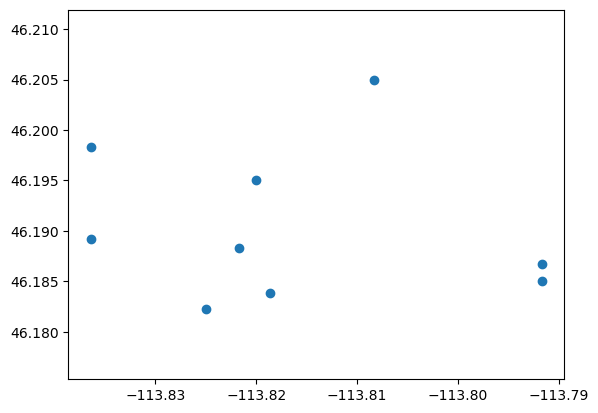

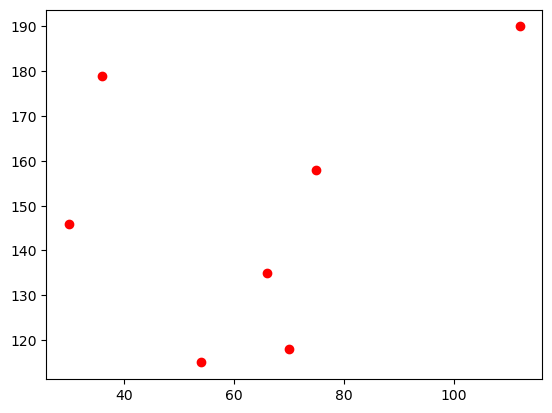

Failed 2
!! Failed 2 out of 9 for layout 0014_00426 !!
0002_00714
Earliest date: 2023-07-25 00:00:00, Latest date: 2023-08-24 23:00:00
Sampler built with 23616 ignition points.


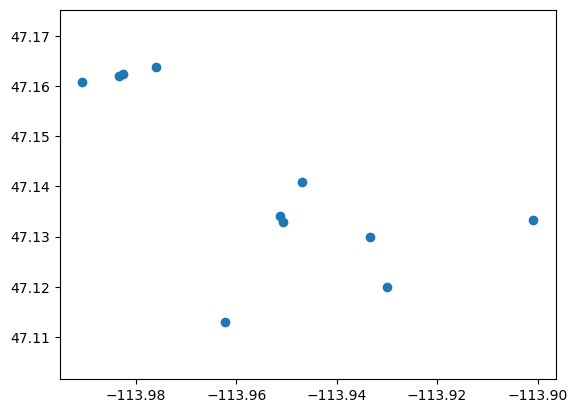

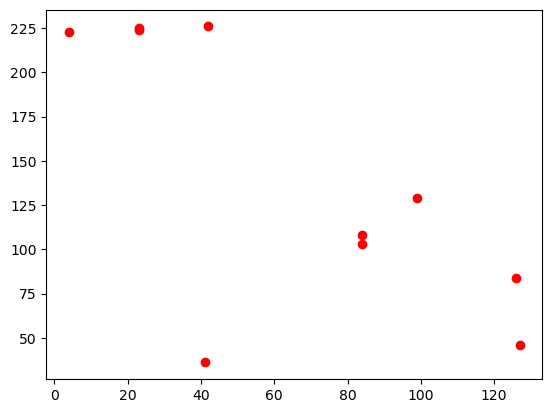

Failed 1
0046_02758
Earliest date: 2022-09-14 00:00:00, Latest date: 2022-10-05 23:00:00
Error processing 0046_00637: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00637/
Error processing 0046_00263: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00263/
Error processing 0046_01699: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_01699/
Error processing 0046_00321: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00321/
Error processing 0046_00202: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00202/
Error processing 0046_00323: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00323/
Sampler built with 30436 ignition points.


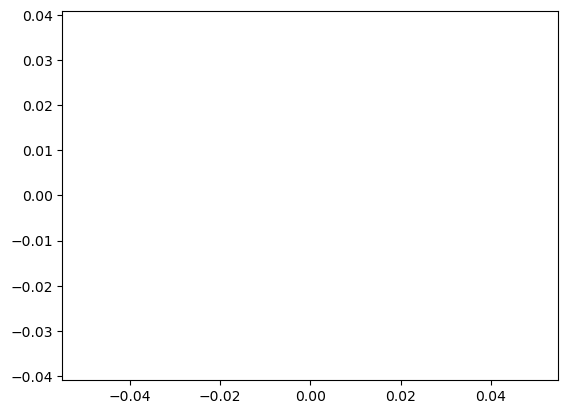

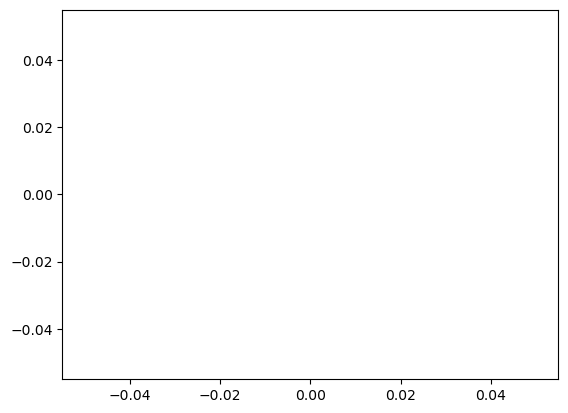

Failed 0
!! Failed 0 out of 0 for layout 0046_02758 !!
0282_03685
Earliest date: 2021-08-04 00:00:00, Latest date: 2021-08-24 23:00:00
Sampler built with 48240 ignition points.


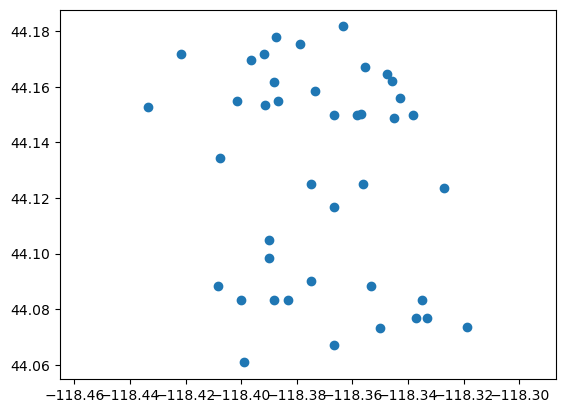

Scenario 0282_03518 has the wrong size for layout 0282_03685: 253 != 251 or 435 != 230


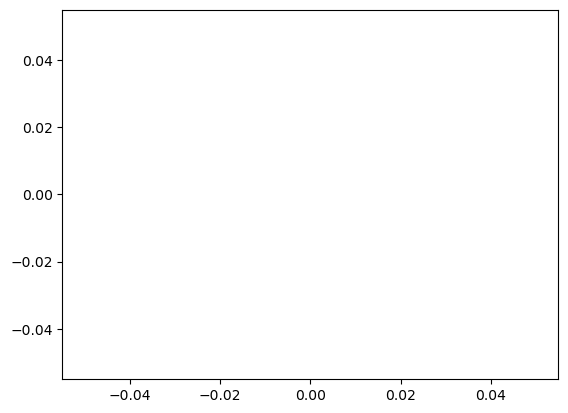

Failed 0
0346_02223
Earliest date: 2021-08-11 00:00:00, Latest date: 2021-09-12 23:00:00
Sampler built with 56517 ignition points.


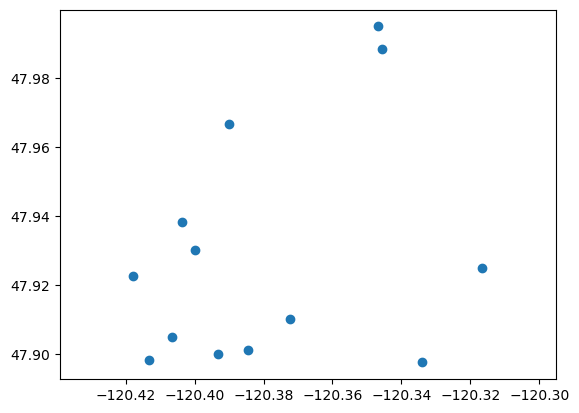

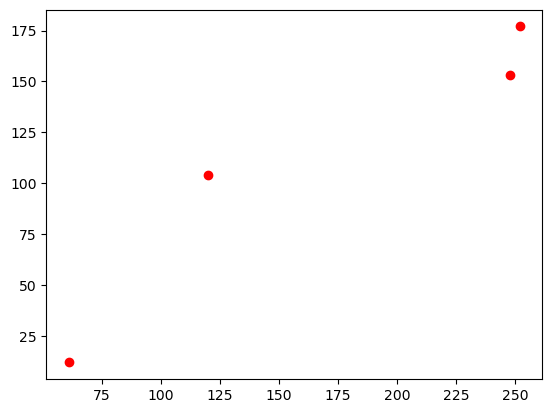

Failed 9
!! Failed 9 out of 13 for layout 0346_02223 !!
0321_03136
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-07-25 23:00:00
Sampler built with 48874 ignition points.


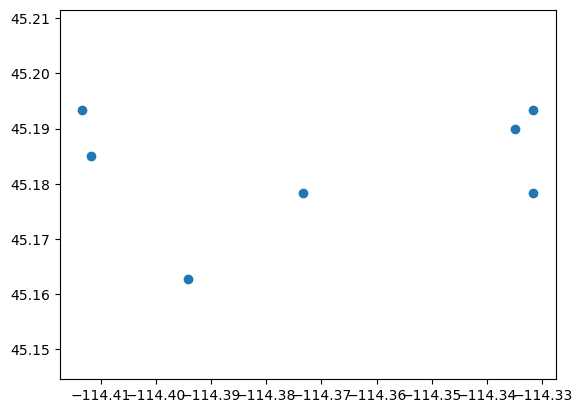

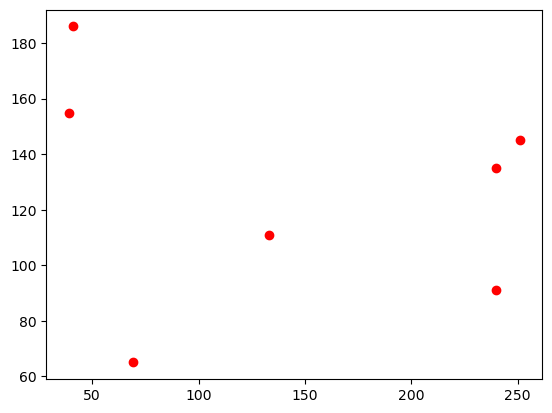

Failed 0
0314_02558
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-03 23:00:00
Sampler built with 36825 ignition points.


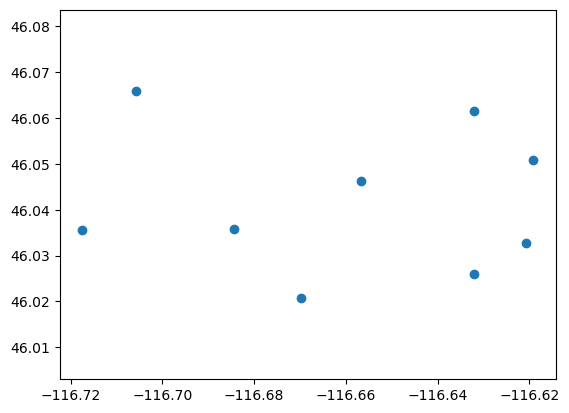

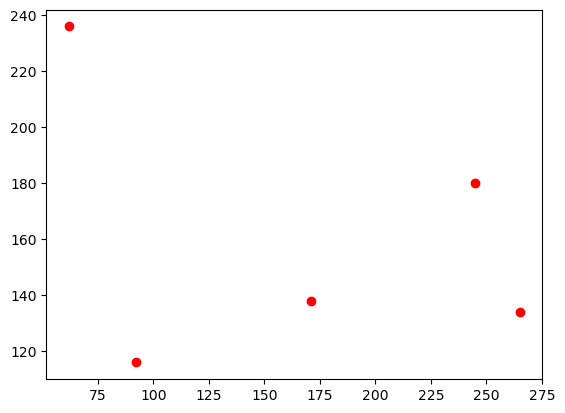

Failed 4
!! Failed 4 out of 9 for layout 0314_02558 !!
0269_00642
Earliest date: 2022-08-25 00:00:00, Latest date: 2022-09-15 23:00:00
Sampler built with 24051 ignition points.


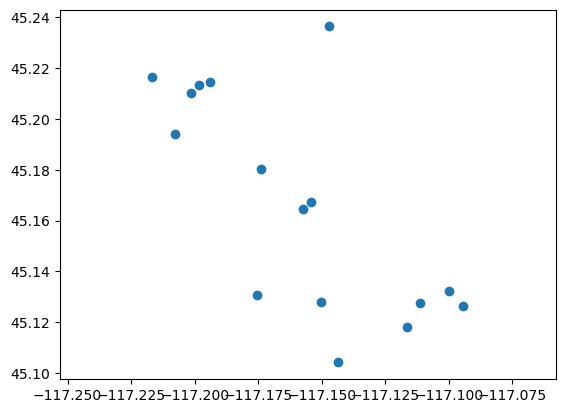

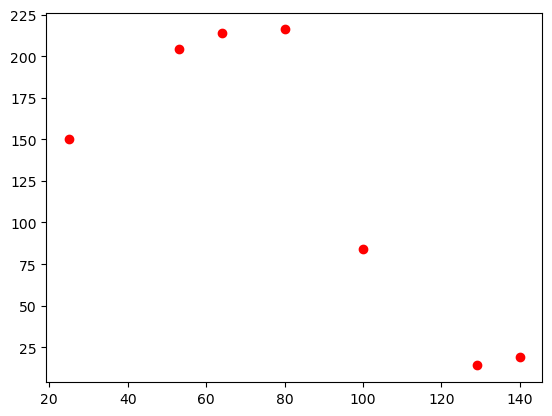

Failed 9
!! Failed 9 out of 16 for layout 0269_00642 !!
0056_01464
Earliest date: 2022-06-15 00:00:00, Latest date: 2022-07-04 23:00:00
Error processing 0056_00611: No JPG files found in folder: ./WideDataset/0056_01464/Satellite_Images_Mask/0056_00611/
Error processing 0056_00610: No JPG files found in folder: ./WideDataset/0056_01464/Satellite_Images_Mask/0056_00610/
Error processing 0056_00612: No JPG files found in folder: ./WideDataset/0056_01464/Satellite_Images_Mask/0056_00612/
Sampler built with 26011 ignition points.


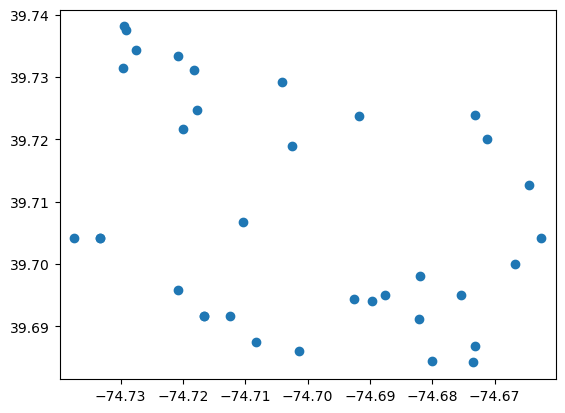

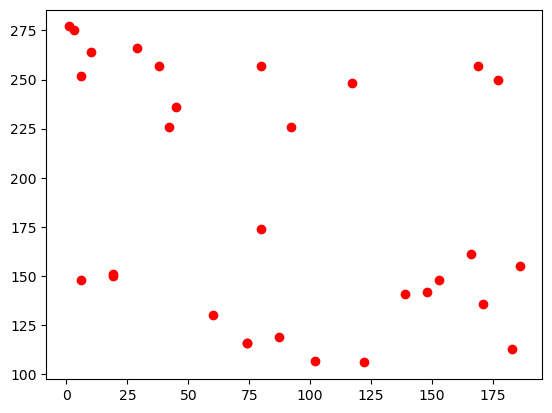

Failed 5
0347_00907
Earliest date: 2021-08-11 00:00:00, Latest date: 2021-09-12 23:00:00
Sampler built with 29230 ignition points.


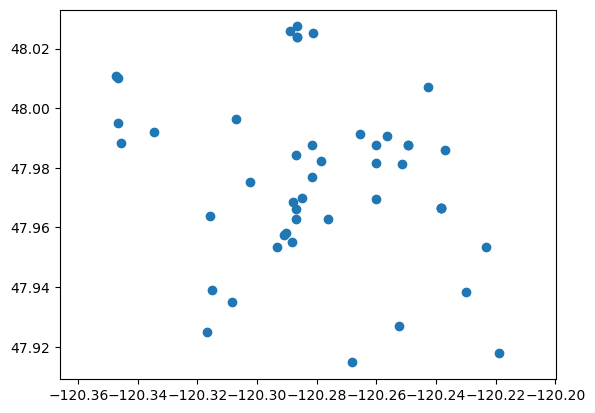

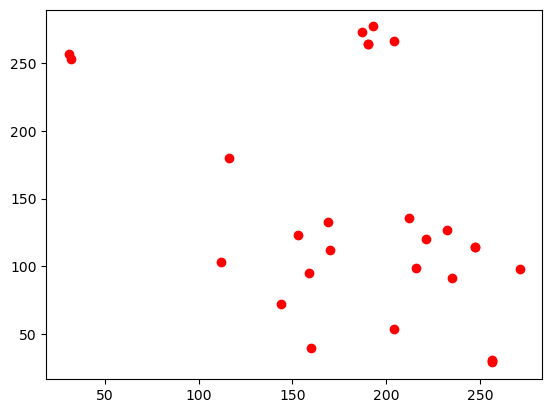

Failed 20
!! Failed 20 out of 47 for layout 0347_00907 !!
0001_02614
Earliest date: 2023-07-24 00:00:00, Latest date: 2023-08-10 23:00:00
Sampler built with 30055 ignition points.


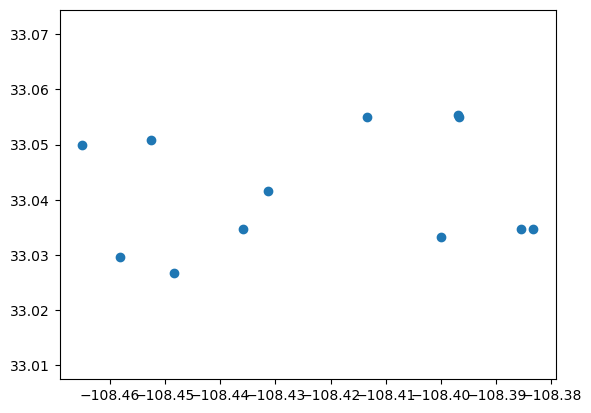

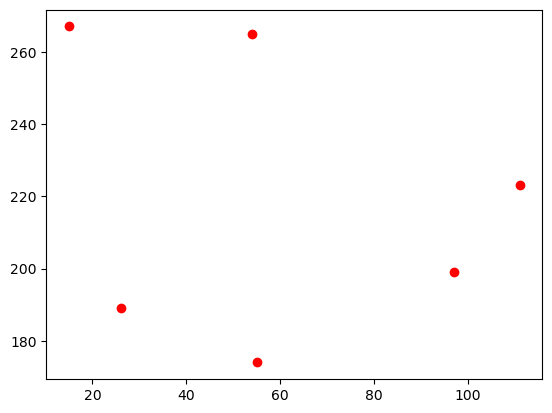

Failed 6
!! Failed 6 out of 12 for layout 0001_02614 !!
0274_03052
Earliest date: 2022-06-16 00:00:00, Latest date: 2022-07-08 23:00:00
Sampler built with 61551 ignition points.


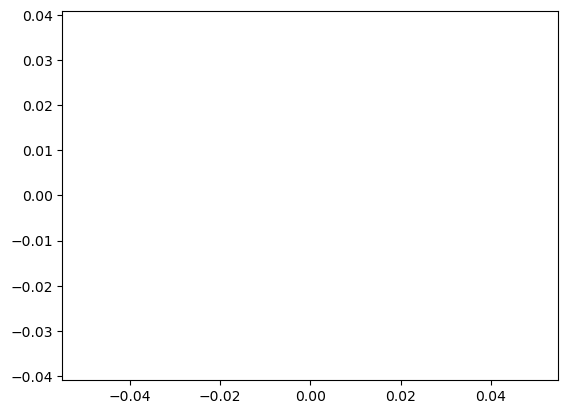

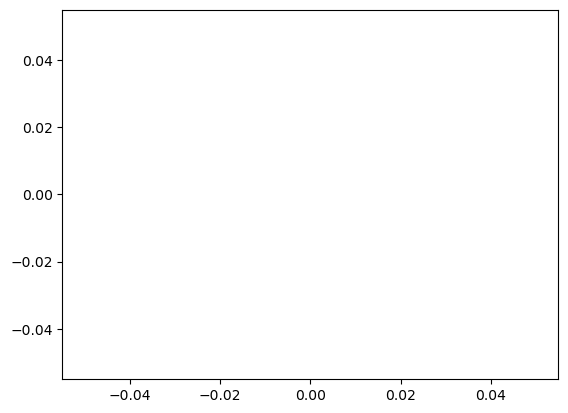

Failed 0
!! Failed 0 out of 0 for layout 0274_03052 !!
0276_03090
Earliest date: 2022-06-18 00:00:00, Latest date: 2022-07-08 23:00:00
Sampler built with 77168 ignition points.


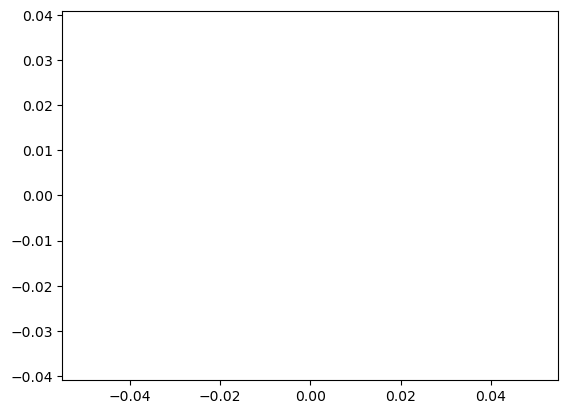

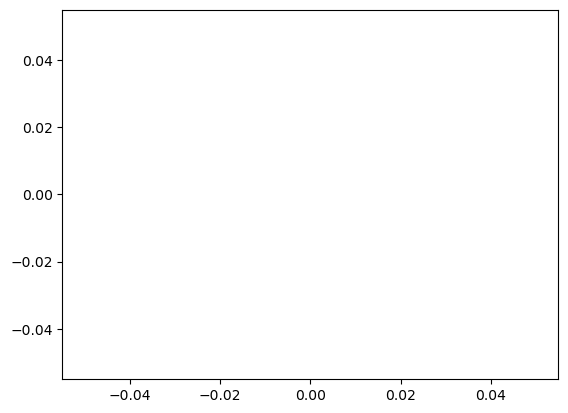

Failed 0
!! Failed 0 out of 0 for layout 0276_03090 !!
0018_02440
Earliest date: 2023-06-21 00:00:00, Latest date: 2023-07-13 23:00:00
Sampler built with 40686 ignition points.


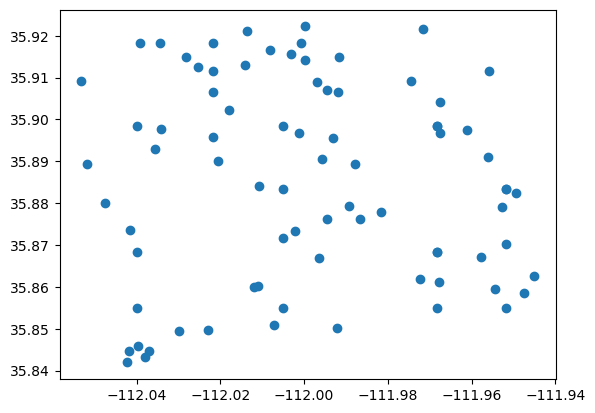

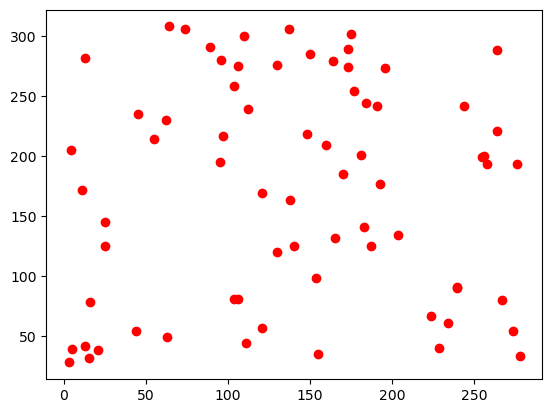

Failed 9
0017_02731
Earliest date: 2023-03-03 00:00:00, Latest date: 2023-03-21 23:00:00
Sampler built with 36565 ignition points.


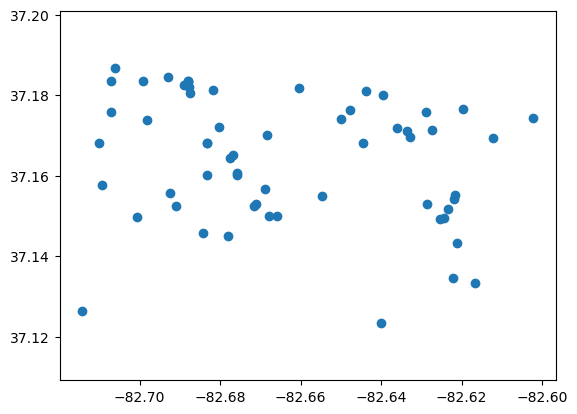

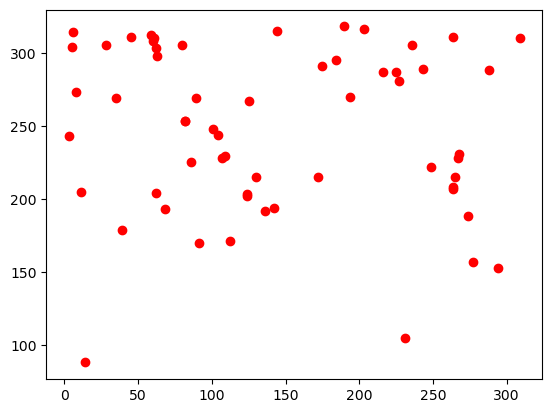

Failed 1
0055_02555
Earliest date: 2022-09-01 00:00:00, Latest date: 2022-09-20 23:00:00
Sampler built with 42089 ignition points.


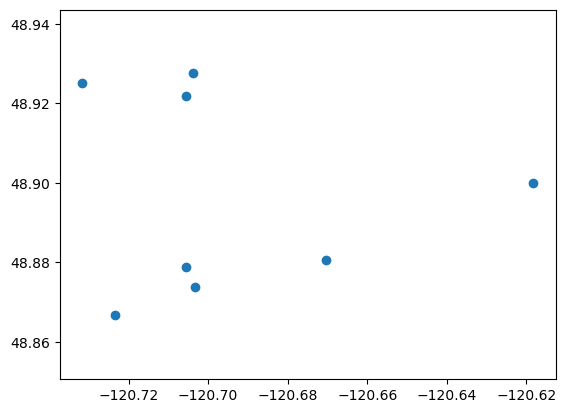

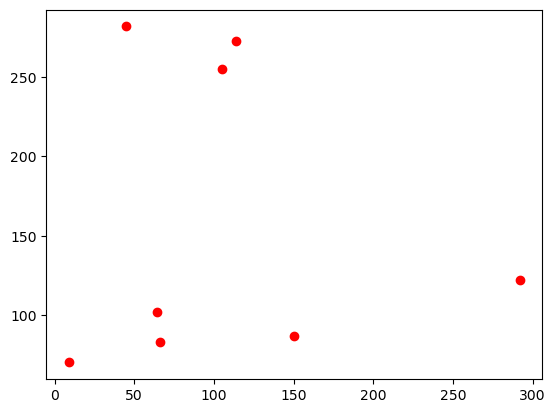

Failed 0
0319_04796
Earliest date: 2021-07-13 00:00:00, Latest date: 2021-08-01 23:00:00
Sampler built with 61731 ignition points.


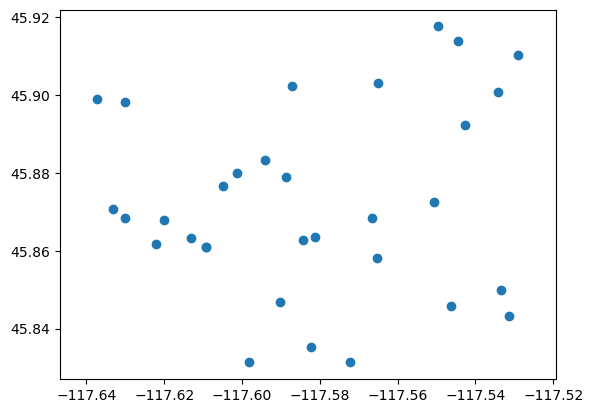

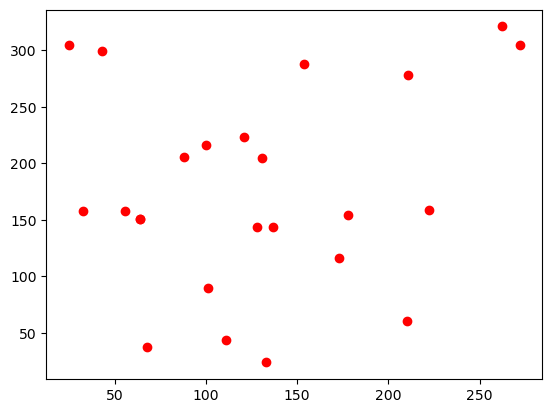

Failed 8
!! Failed 8 out of 32 for layout 0319_04796 !!
0266_03160
Earliest date: 2022-06-04 00:00:00, Latest date: 2022-06-22 23:00:00
Sampler built with 64492 ignition points.


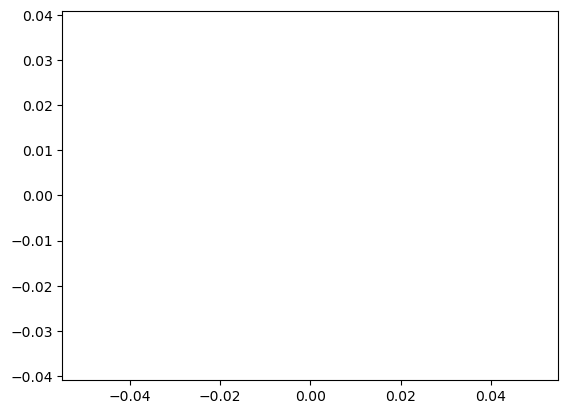

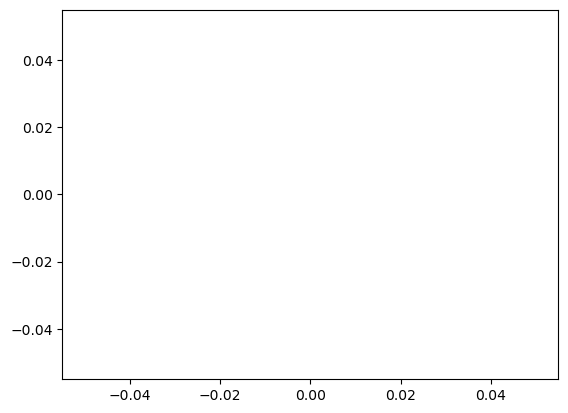

Failed 0
!! Failed 0 out of 0 for layout 0266_03160 !!
0085_02466
Earliest date: 2022-08-30 00:00:00, Latest date: 2022-09-20 23:00:00
Sampler built with 43475 ignition points.


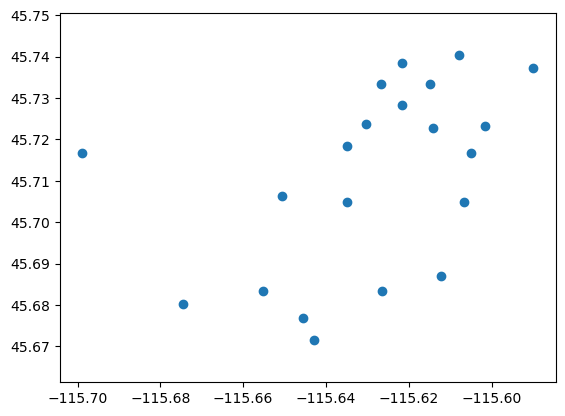

Scenario 0085_01420 has the wrong size for layout 0085_02466: 334 != 351 or 241 != 250


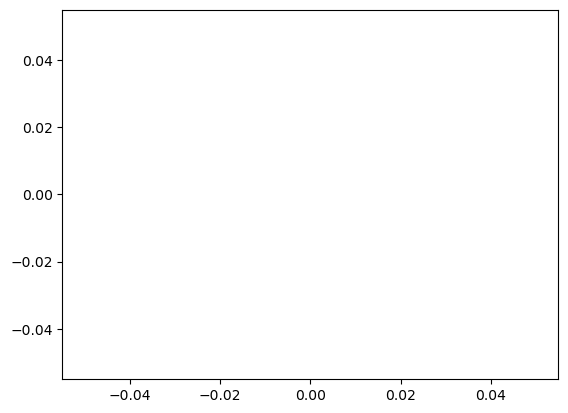

Failed 0
0320_02378
Earliest date: 2021-07-13 00:00:00, Latest date: 2021-08-01 23:00:00
Sampler built with 42267 ignition points.


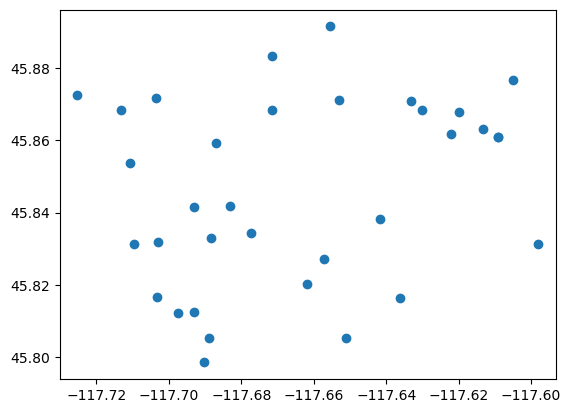

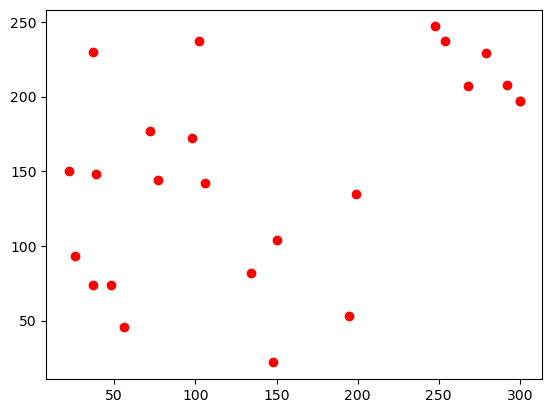

Failed 10
!! Failed 10 out of 34 for layout 0320_02378 !!
0005_00725
Earliest date: 2023-03-04 00:00:00, Latest date: 2023-03-21 23:00:00
Sampler built with 23957 ignition points.


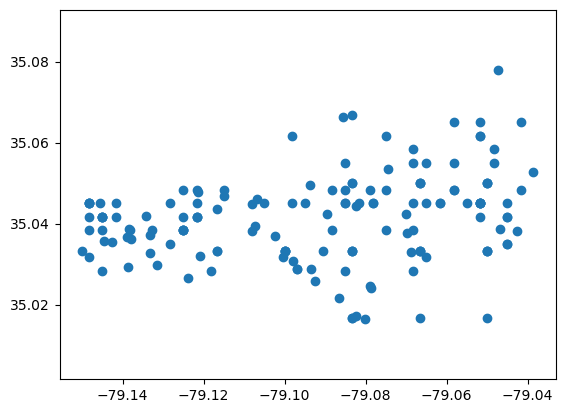

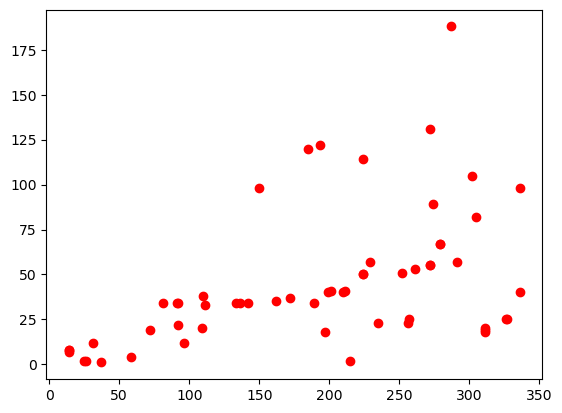

Failed 99
!! Failed 99 out of 157 for layout 0005_00725 !!
0334_02747
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 70542 ignition points.


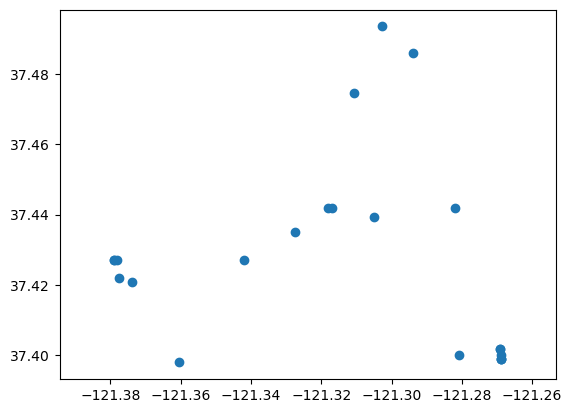

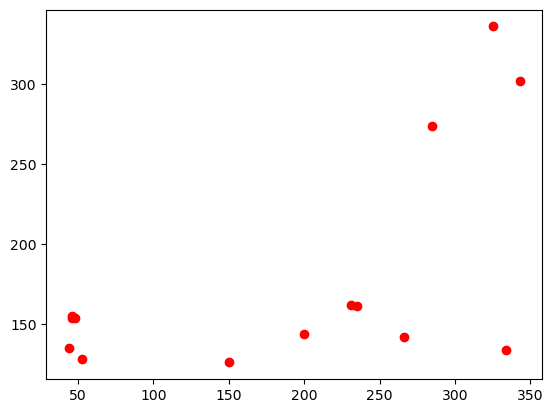

Failed 8
!! Failed 8 out of 22 for layout 0334_02747 !!
0039_01770
Earliest date: 2023-09-18 00:00:00, Latest date: 2023-10-17 23:00:00
Sampler built with 33797 ignition points.


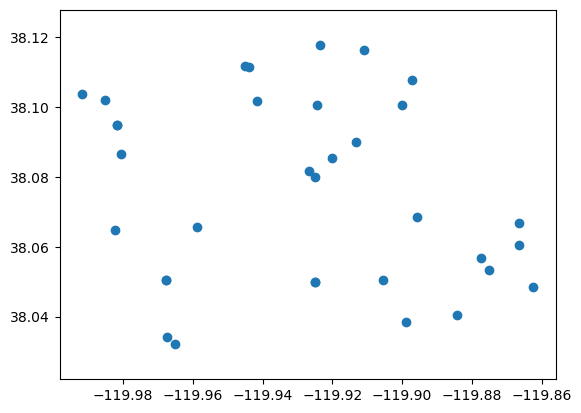

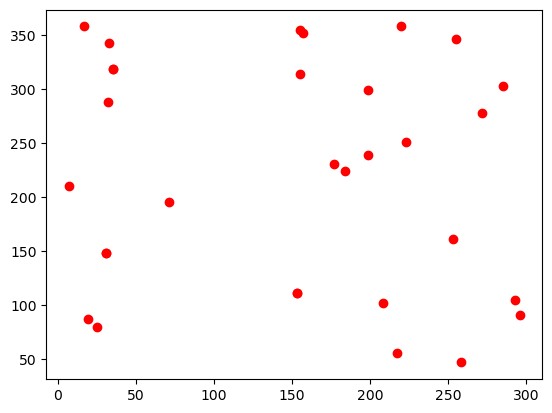

Failed 3
0035_00642
Earliest date: 2022-05-01 00:00:00, Latest date: 2022-05-24 23:00:00
Sampler built with 26639 ignition points.


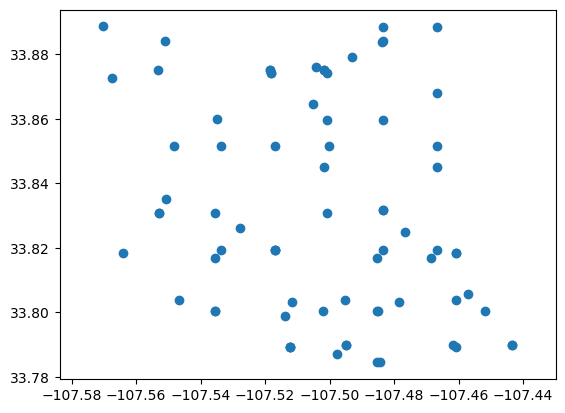

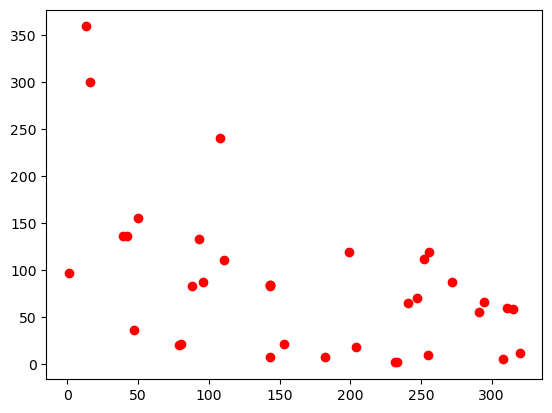

Failed 39
!! Failed 39 out of 75 for layout 0035_00642 !!
0313_03217
Layout ./WideDataset/0313_03217/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0313_03217/Satellite_Image_Mask/ does not exist
0343_03272
Earliest date: 2021-08-03 00:00:00, Latest date: 2021-08-29 23:00:00
Sampler built with 42809 ignition points.


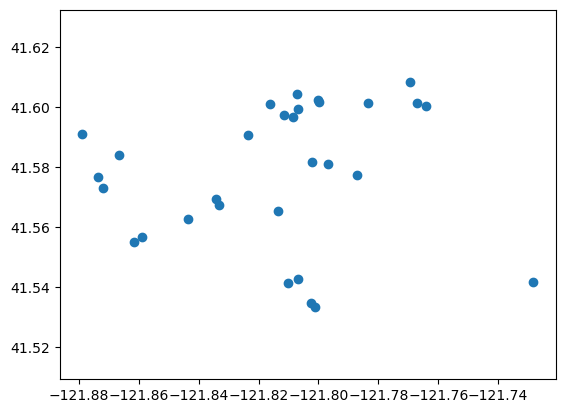

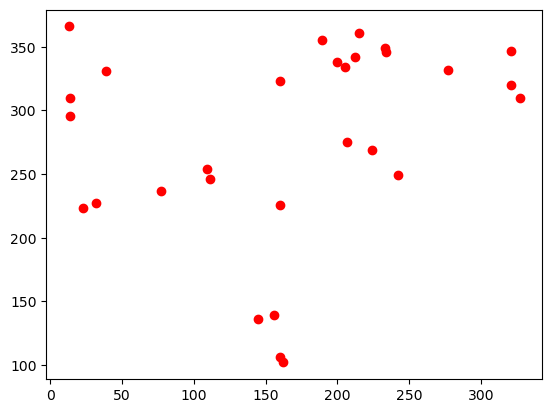

Failed 1
0341_02643
Earliest date: 2021-08-03 00:00:00, Latest date: 2021-08-29 23:00:00
Sampler built with 46680 ignition points.


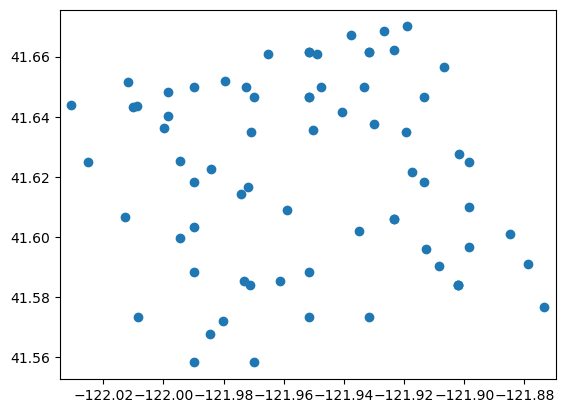

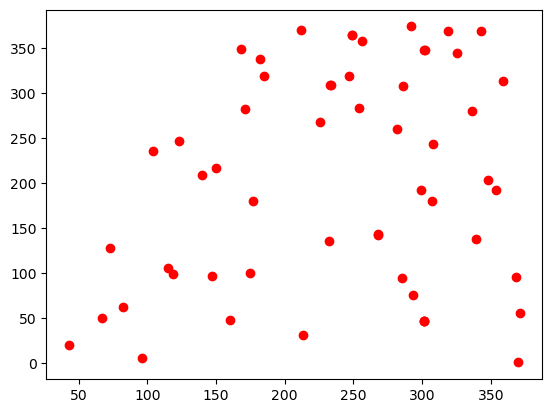

Failed 15
!! Failed 15 out of 71 for layout 0341_02643 !!
0317_01620
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-03 23:00:00
Error processing 0317_00210: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_00210/
Error processing 0317_00211: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_00211/
Error processing 0317_01506: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_01506/
Error processing 0317_00212: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_00212/
Error processing 0317_01507: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_01507/
Sampler built with 43236 ignition points.


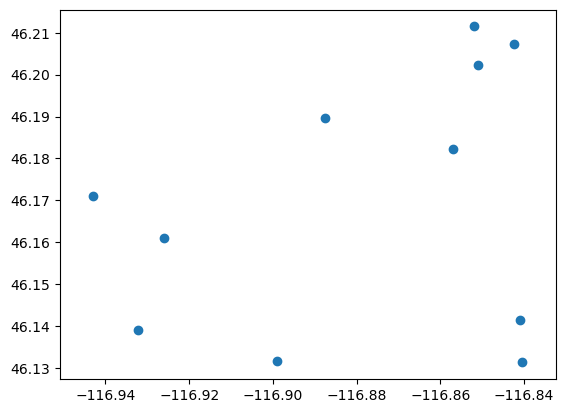

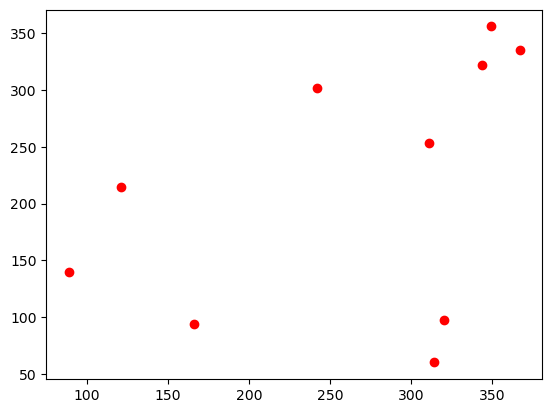

Failed 1
0312_02933
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-03 23:00:00
Error processing 0312_02522: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_02522/
Error processing 0312_02523: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_02523/
Error processing 0312_00072: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_00072/
Error processing 0312_02521: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_02521/
Error processing 0312_00074: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_00074/
Error processing 0312_00073: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_00073/
Sampler built with 68856 ignition points.


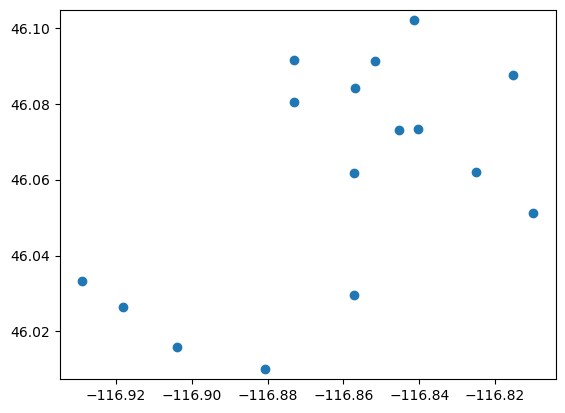

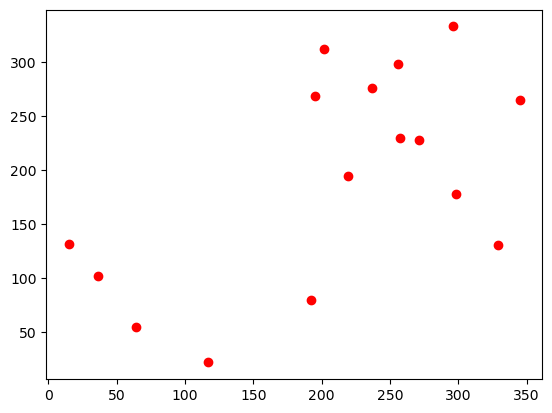

Failed 0
0323_01406
Earliest date: 2022-08-07 00:00:00, Latest date: 2022-08-30 23:00:00
Sampler built with 47469 ignition points.


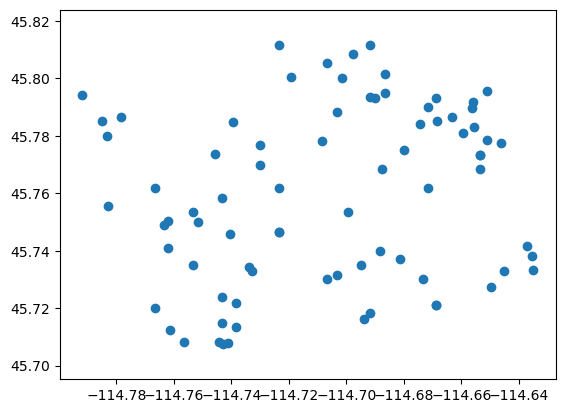

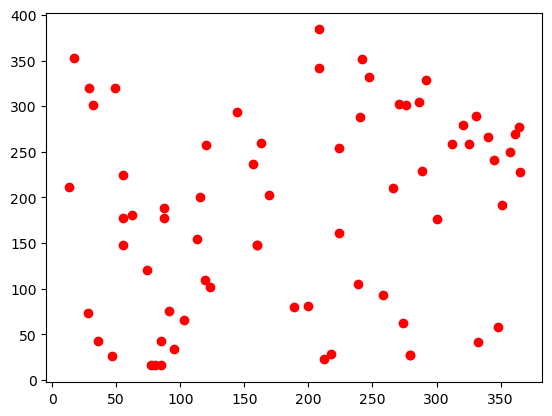

Failed 10
0345_03074
Earliest date: 2022-09-01 00:00:00, Latest date: 2022-09-22 23:00:00
Sampler built with 79318 ignition points.


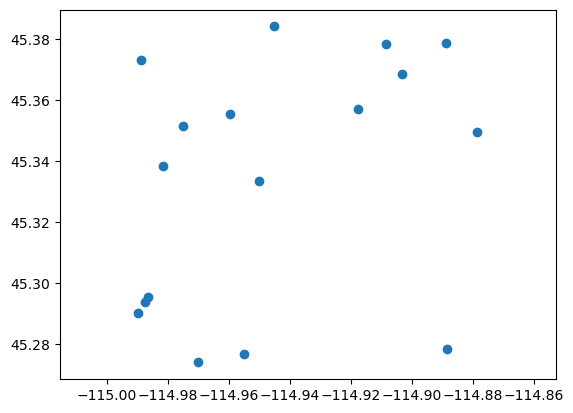

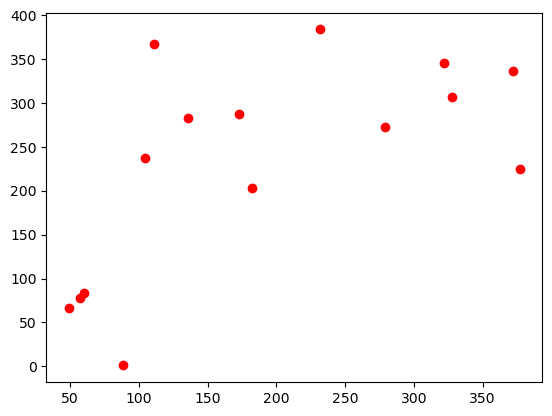

Failed 2
0271_03136
Earliest date: 2022-06-04 00:00:00, Latest date: 2022-06-22 23:00:00
Sampler built with 69116 ignition points.


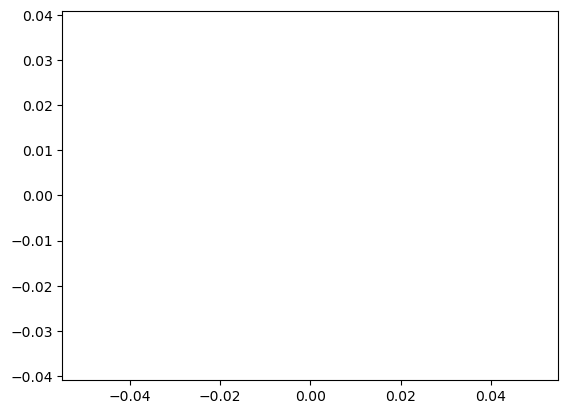

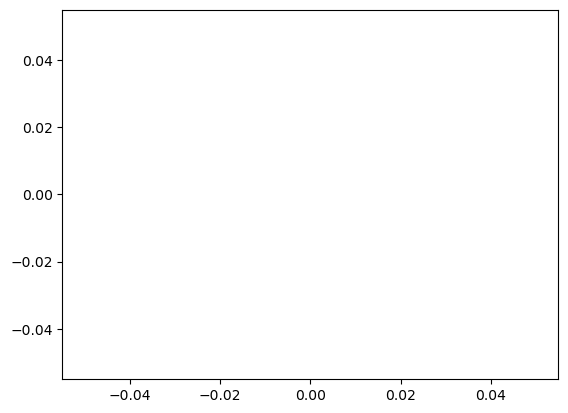

Failed 0
!! Failed 0 out of 0 for layout 0271_03136 !!
0342_02222
Earliest date: 2021-08-03 00:00:00, Latest date: 2021-08-29 23:00:00
Sampler built with 41269 ignition points.


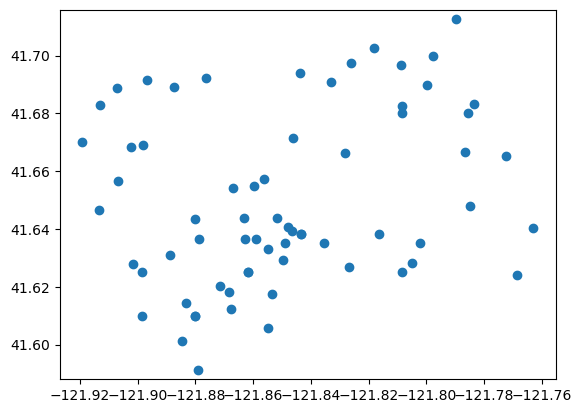

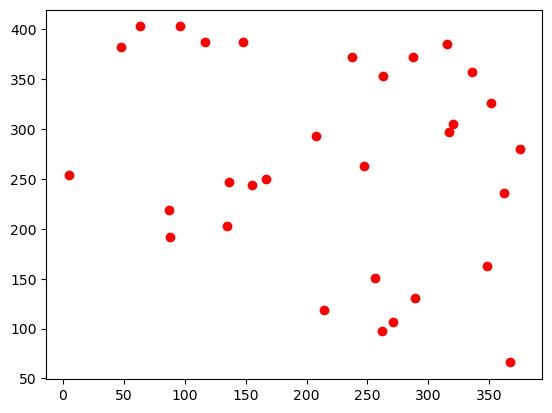

Failed 36
!! Failed 36 out of 67 for layout 0342_02222 !!
0264_02426
Earliest date: 2020-08-26 00:00:00, Latest date: 2020-09-25 23:00:00
Sampler built with 49904 ignition points.


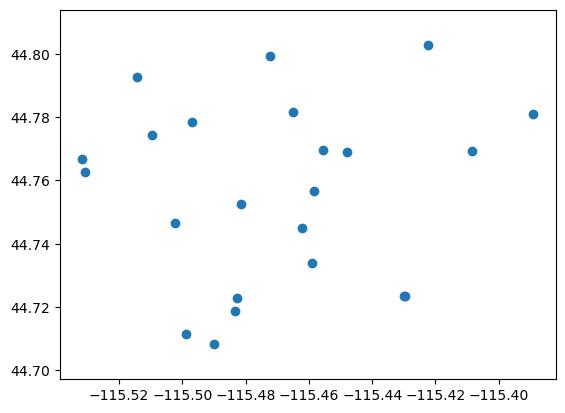

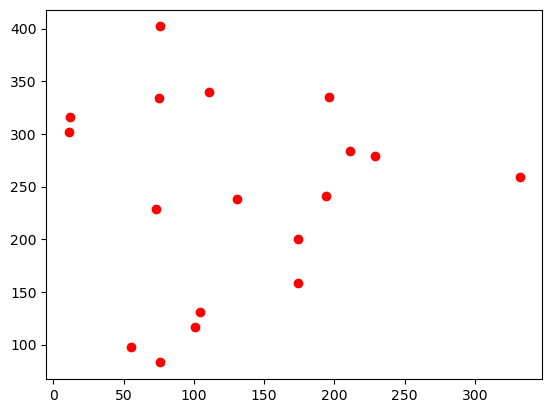

Failed 5
!! Failed 5 out of 23 for layout 0264_02426 !!
0327_03305
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 64705 ignition points.


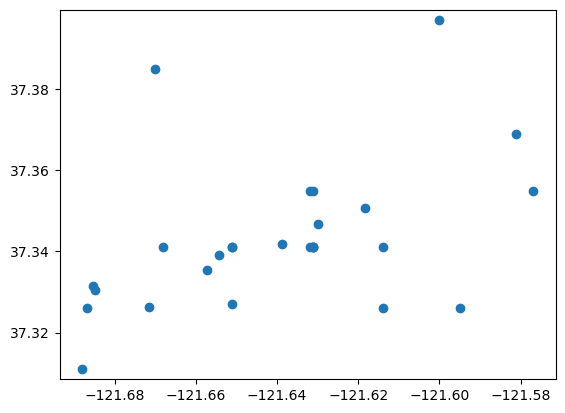

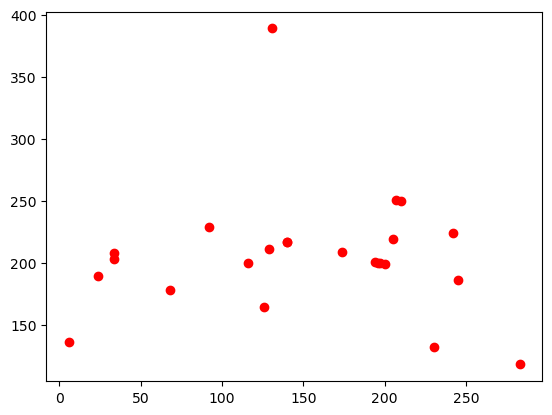

Failed 3
0278_01323
Earliest date: 2023-07-22 00:00:00, Latest date: 2023-08-24 23:00:00
Sampler built with 22606 ignition points.


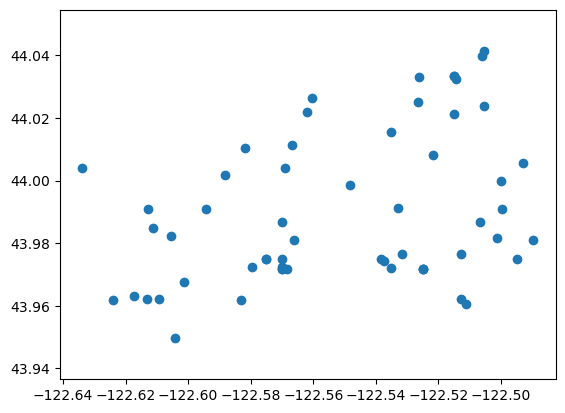

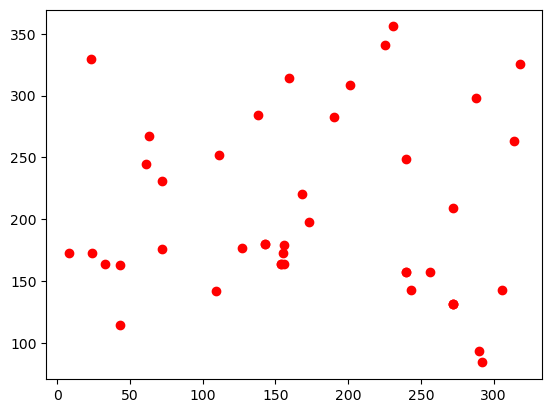

Failed 15
!! Failed 15 out of 58 for layout 0278_01323 !!
0052_00798
Earliest date: 2022-12-25 00:00:00, Latest date: 2023-01-31 23:00:00
Sampler built with 12214 ignition points.


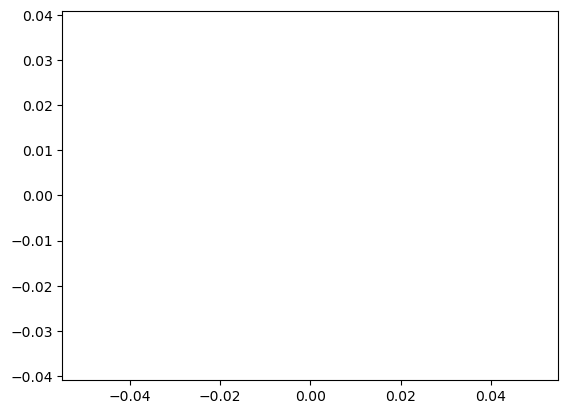

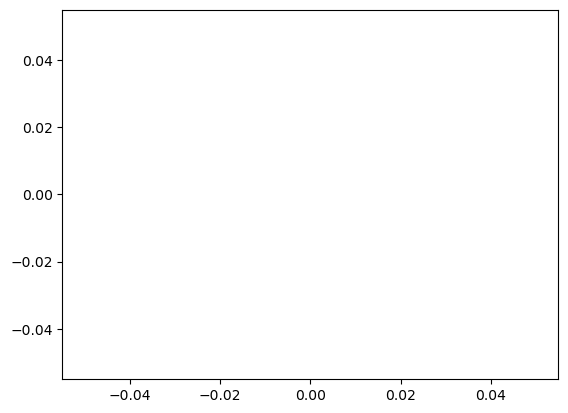

Failed 0
!! Failed 0 out of 0 for layout 0052_00798 !!
0315_02455
Layout ./WideDataset/0315_02455/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0315_02455/Satellite_Image_Mask/ does not exist
0265_02487
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 53188 ignition points.


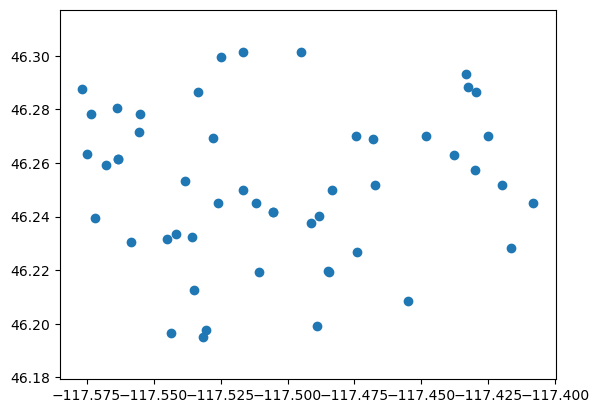

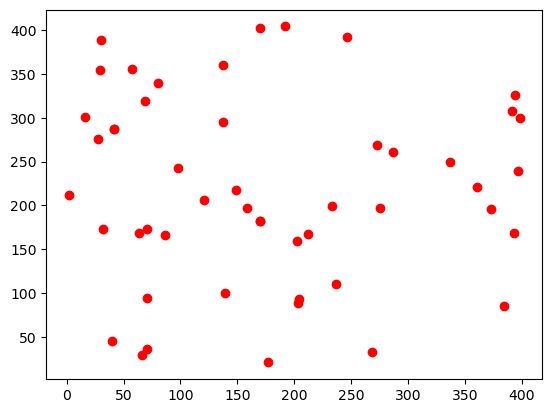

Failed 1
0277_02102
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 55307 ignition points.


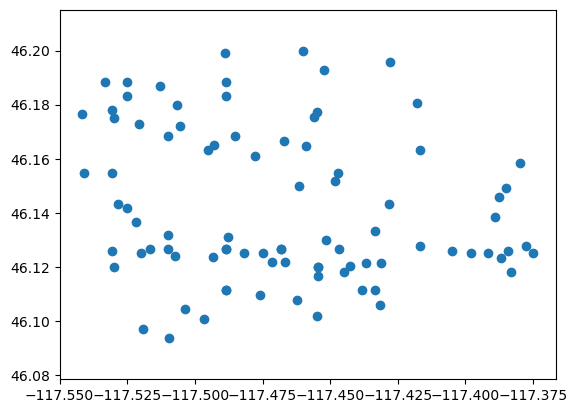

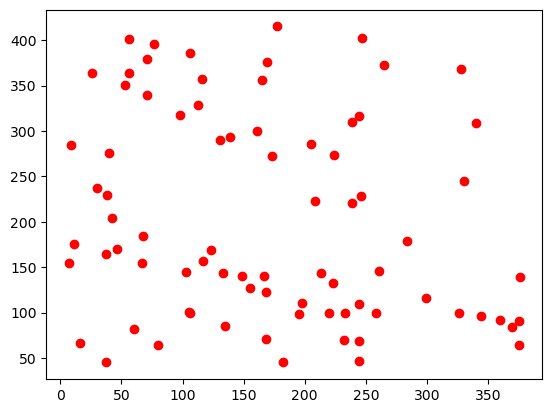

Failed 9
0110_02767
Layout ./WideDataset/0110_02767/Satellite_Images_Mask/ does not exist
Error for layout 0110_02767: unconverted data remains:  
0054_01387
Earliest date: 2023-08-14 00:00:00, Latest date: 2023-09-25 23:00:00
Sampler built with 42403 ignition points.


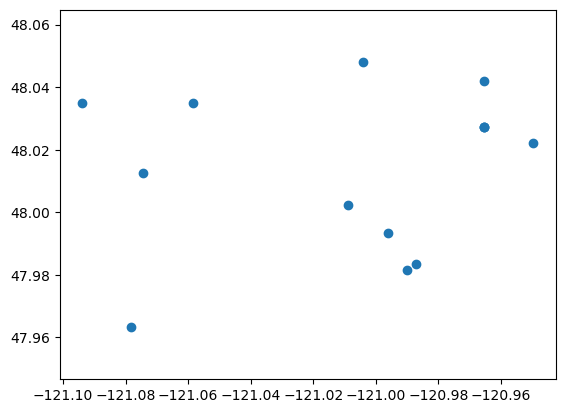

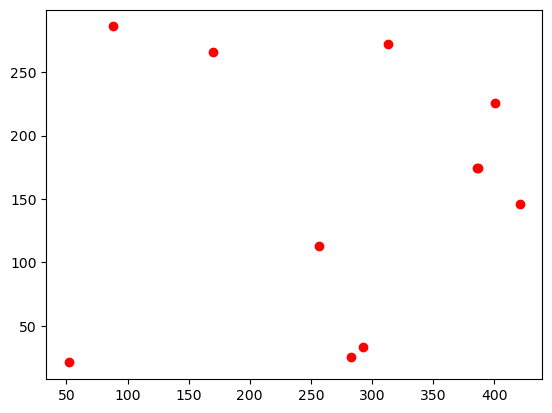

Failed 3
!! Failed 3 out of 14 for layout 0054_01387 !!
0086_02230
Earliest date: 2020-08-29 00:00:00, Latest date: 2020-09-16 23:00:00
Sampler built with 37041 ignition points.


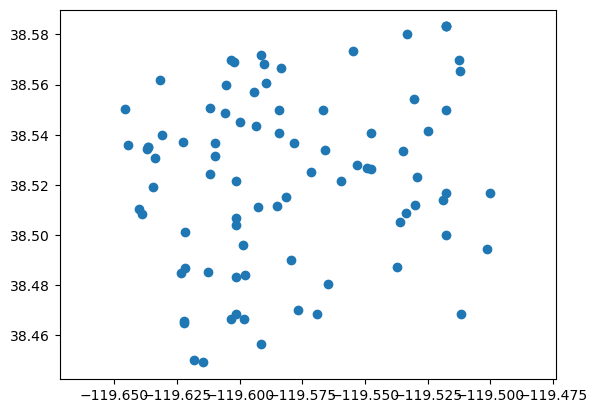

Scenario 0086_00265 has the wrong size for layout 0086_02230: 429 != 263 or 445 != 309


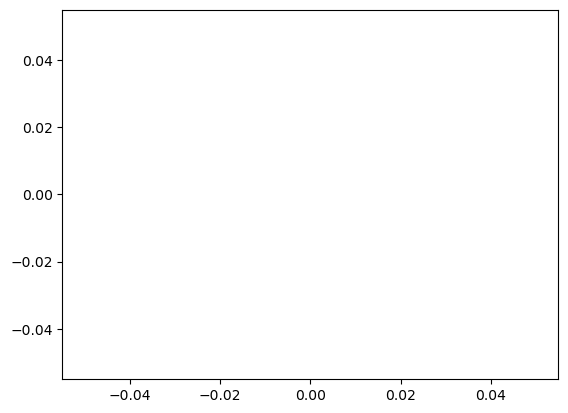

Failed 0
0087_02445
Earliest date: 2020-08-29 00:00:00, Latest date: 2020-09-16 23:00:00
Sampler built with 44877 ignition points.


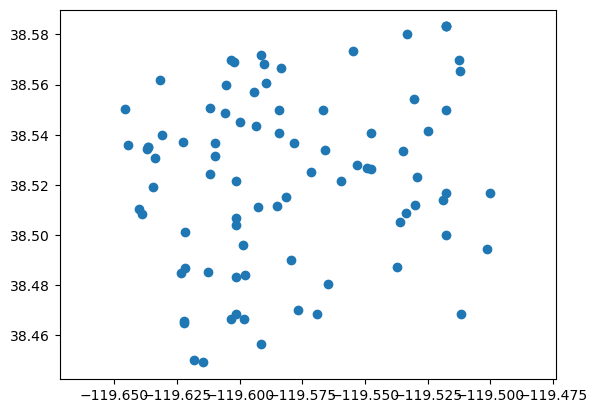

Scenario 0021_00115 has the wrong size for layout 0087_02445: 429 != 267 or 445 != 285


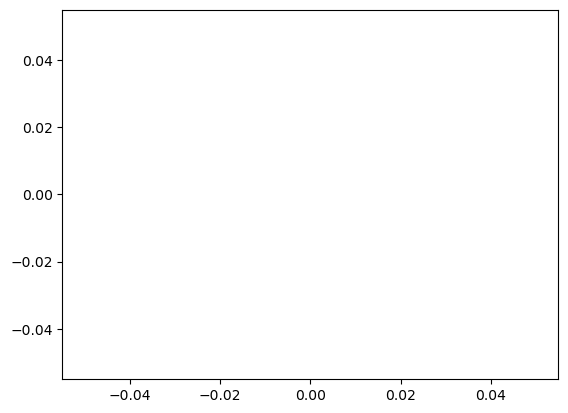

Failed 0
0003_01715
Earliest date: 2023-05-17 00:00:00, Latest date: 2023-06-09 23:00:00
Sampler built with 27043 ignition points.


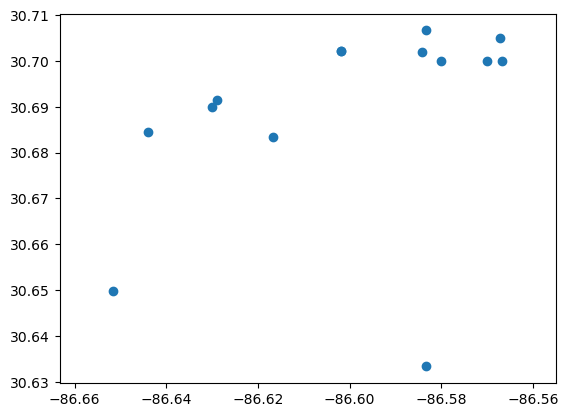

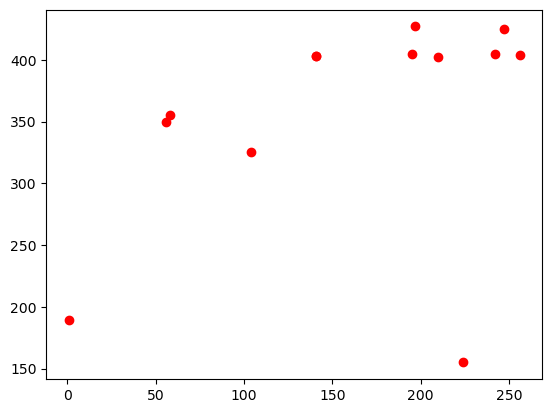

Failed 1
0109_03065
Layout ./WideDataset/0109_03065/Satellite_Images_Mask/ does not exist
Error for layout 0109_03065: unconverted data remains:  
0088_01340
Earliest date: 2021-08-09 00:00:00, Latest date: 2021-09-02 23:00:00
Sampler built with 36823 ignition points.


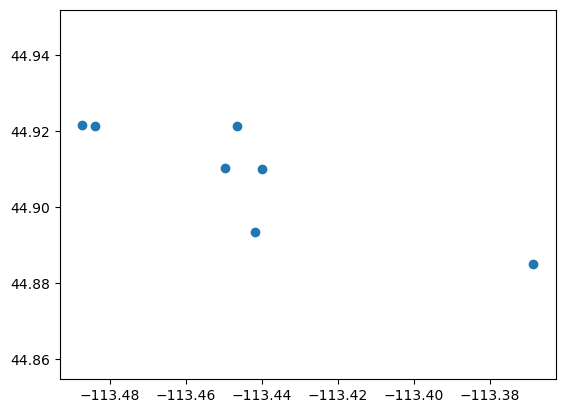

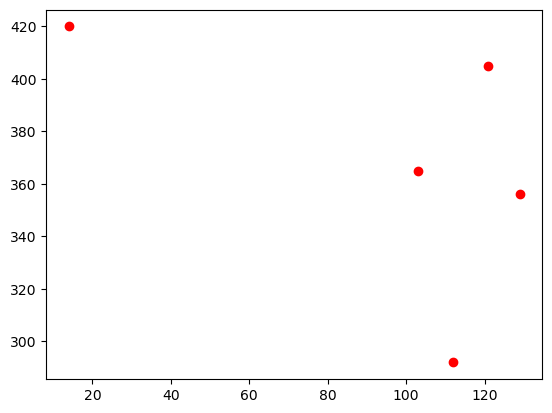

Failed 2
!! Failed 2 out of 7 for layout 0088_01340 !!
0045_02388
Earliest date: 2023-08-24 00:00:00, Latest date: 2023-09-11 23:00:00
Error processing 0045_00685: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_00685/
Error processing 0045_00684: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_00684/
Error processing 0045_01590: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_01590/
Error processing 0045_02040: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_02040/
Error processing 0045_02012: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_02012/
Error processing 0045_02041: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_02041/
Error processing 0045_00686: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_00686/
Error processing 0045_01589: No JPG fil

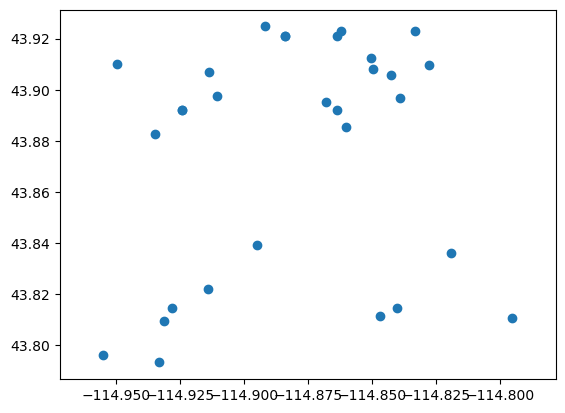

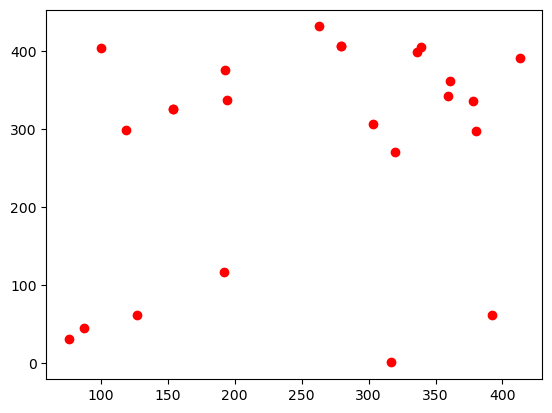

Failed 6
0335_01696
Earliest date: 2021-07-12 00:00:00, Latest date: 2021-08-04 23:00:00
Sampler built with 46222 ignition points.


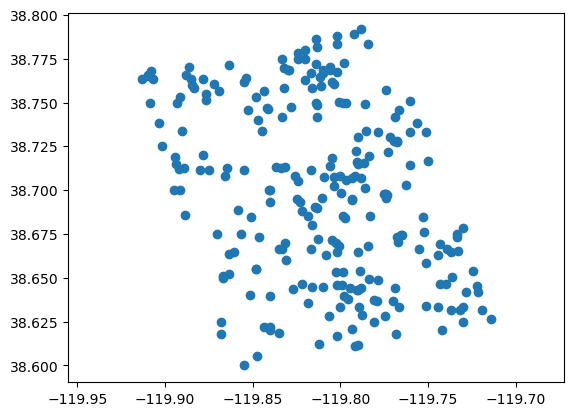

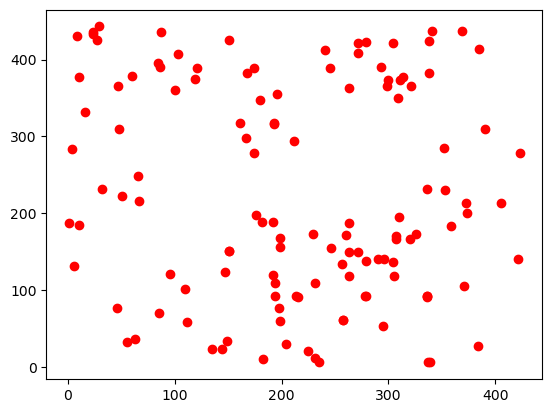

Failed 121
!! Failed 121 out of 247 for layout 0335_01696 !!
0338_02320
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 53466 ignition points.


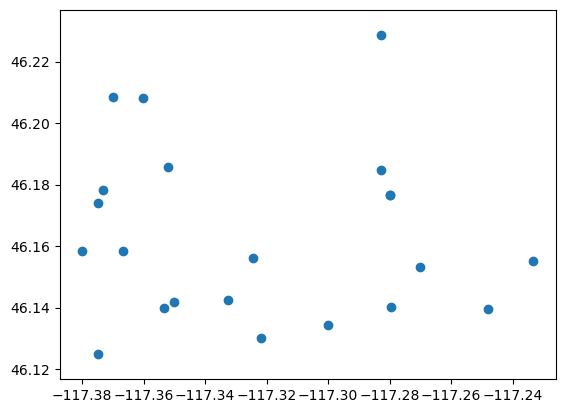

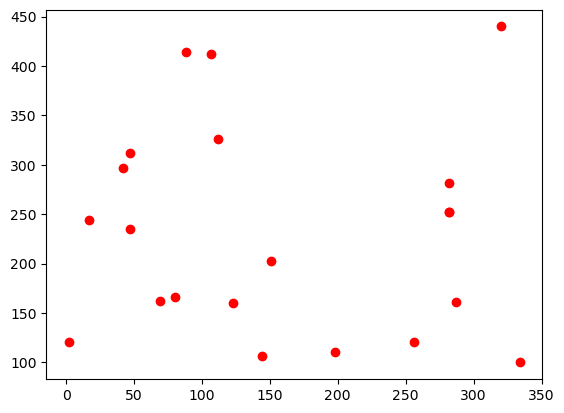

Failed 1
0337_02831
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 73419 ignition points.


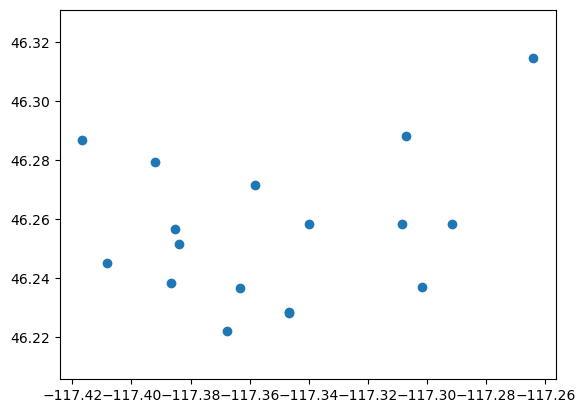

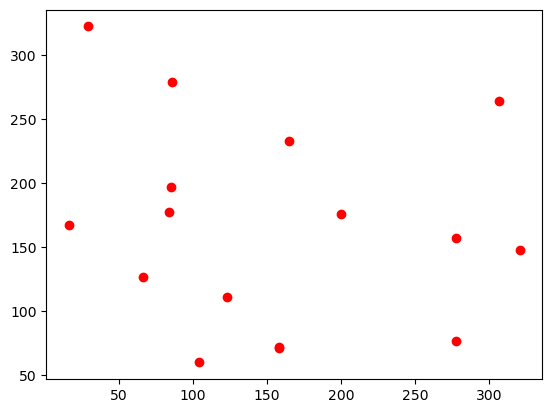

Failed 1
0316_02459
Layout ./WideDataset/0316_02459/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0316_02459/Satellite_Image_Mask/ does not exist
0333_03036
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 77405 ignition points.


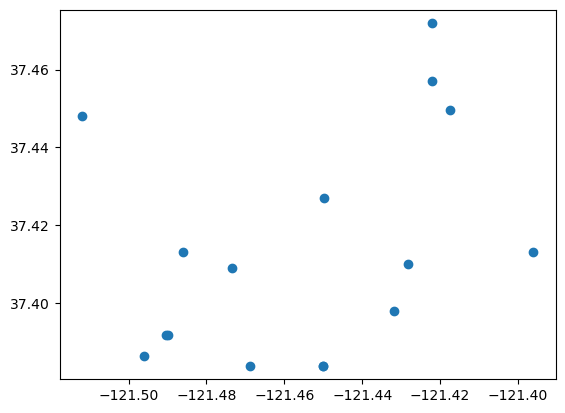

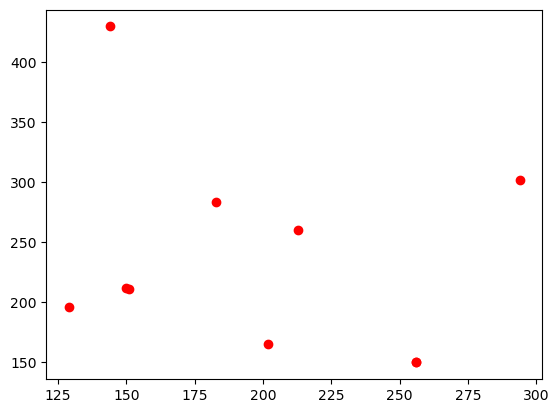

Failed 6
!! Failed 6 out of 16 for layout 0333_03036 !!
0332_03255
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 70859 ignition points.


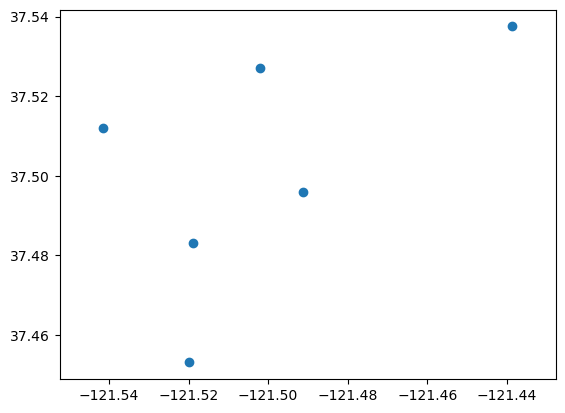

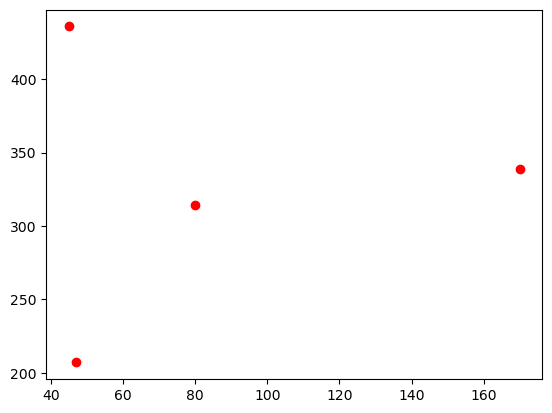

Failed 2
!! Failed 2 out of 6 for layout 0332_03255 !!
0108_02258
Layout ./WideDataset/0108_02258/Satellite_Images_Mask/ does not exist
Error for layout 0108_02258: unconverted data remains:  5
0325_03049
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 59090 ignition points.


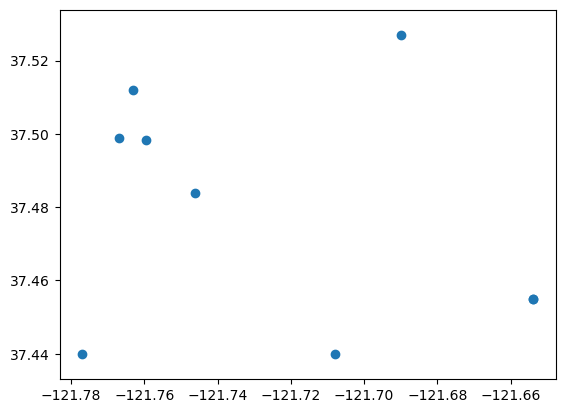

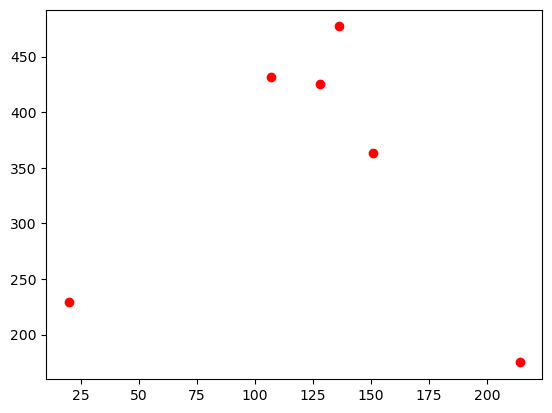

Failed 3
!! Failed 3 out of 9 for layout 0325_03049 !!
0025_02019
Earliest date: 2022-04-01 00:00:00, Latest date: 2022-04-18 23:00:00
Sampler built with 167567 ignition points.


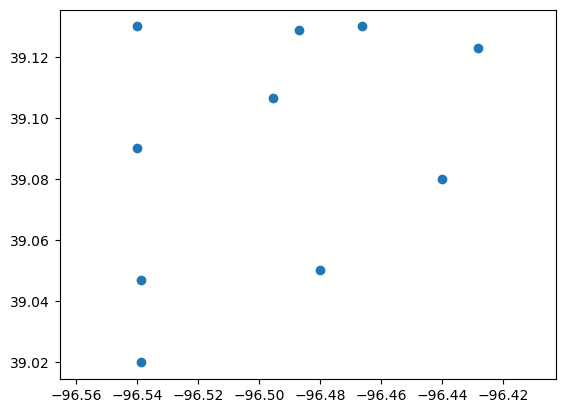

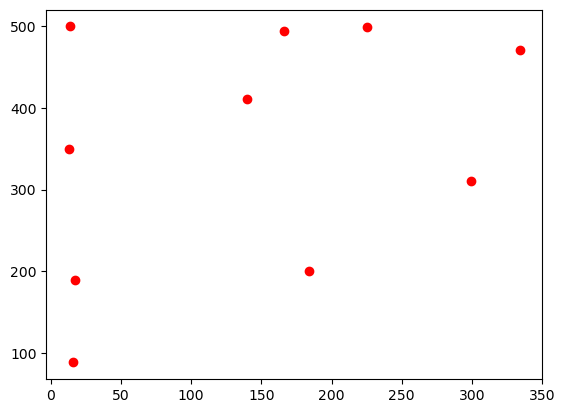

Failed 0
0344_03155
Earliest date: 2022-06-17 00:00:00, Latest date: 2022-07-10 23:00:00
Sampler built with 55900 ignition points.


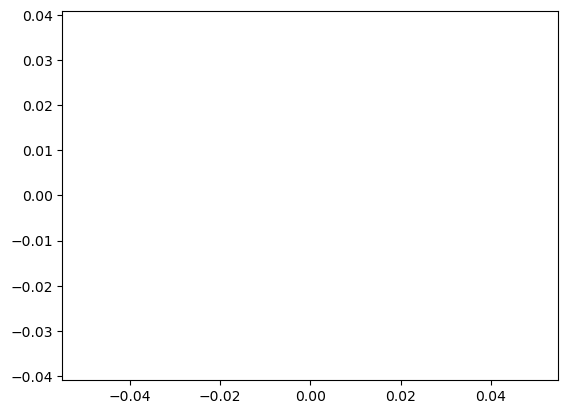

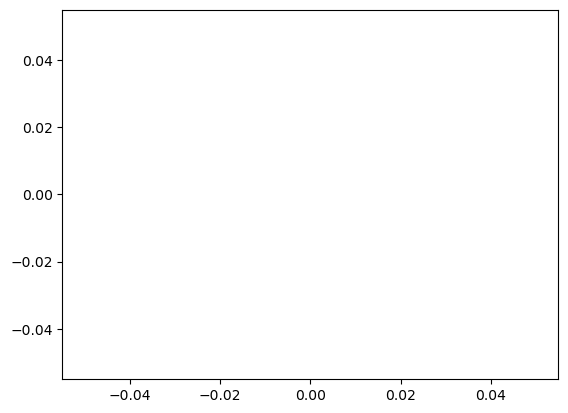

Failed 0
!! Failed 0 out of 0 for layout 0344_03155 !!
0024_02655
Earliest date: 2022-04-03 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 207530 ignition points.


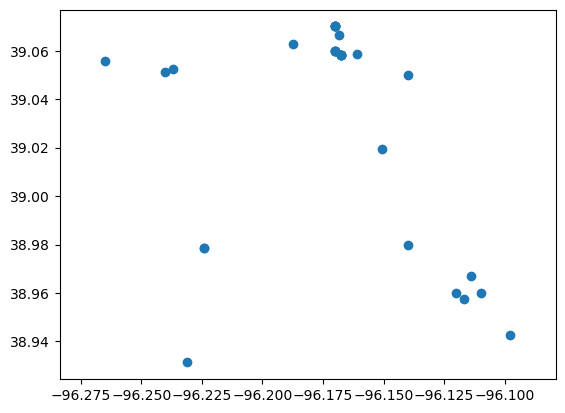

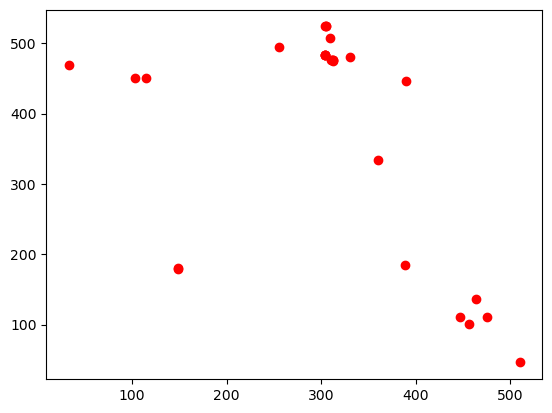

Failed 3
0106_02165
Layout ./WideDataset/0106_02165/Satellite_Images_Mask/ does not exist
Error for layout 0106_02165: unconverted data remains:  
0092_03189
Earliest date: 2020-08-09 00:00:00, Latest date: 2020-08-29 23:00:00
Sampler built with 72368 ignition points.


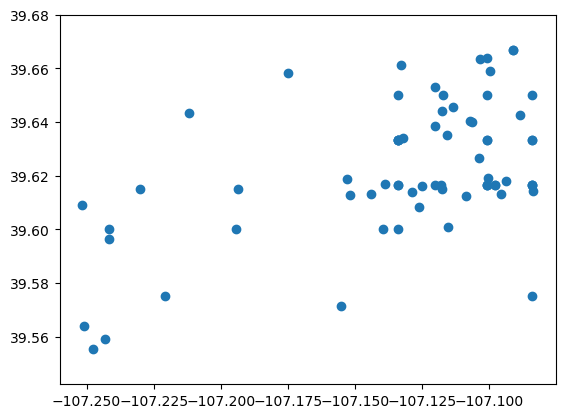

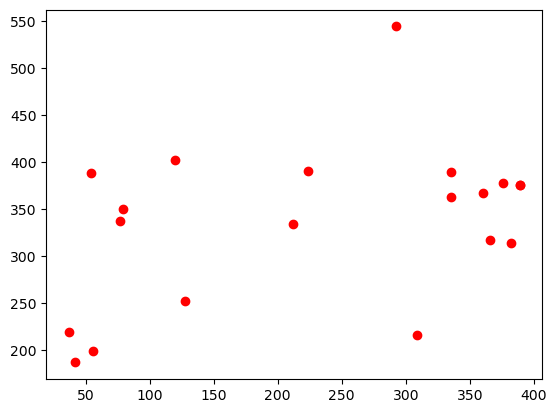

Failed 50
!! Failed 50 out of 70 for layout 0092_03189 !!
0111_03612
Layout ./WideDataset/0111_03612/Satellite_Images_Mask/ does not exist
Error for layout 0111_03612: unconverted data remains:  5
0023_00995
Earliest date: 2023-09-30 00:00:00, Latest date: 2023-10-25 23:00:00
Sampler built with 79841 ignition points.


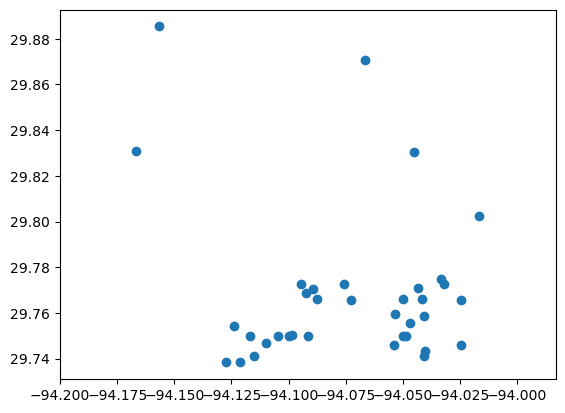

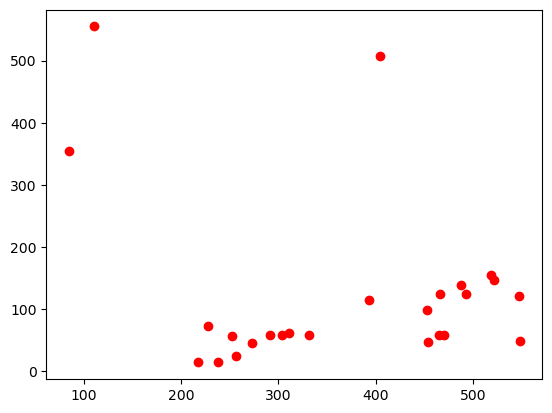

Failed 11
!! Failed 11 out of 36 for layout 0023_00995 !!
0089_00984
Earliest date: 2020-08-14 00:00:00, Latest date: 2020-09-01 23:00:00
Sampler built with 22261 ignition points.


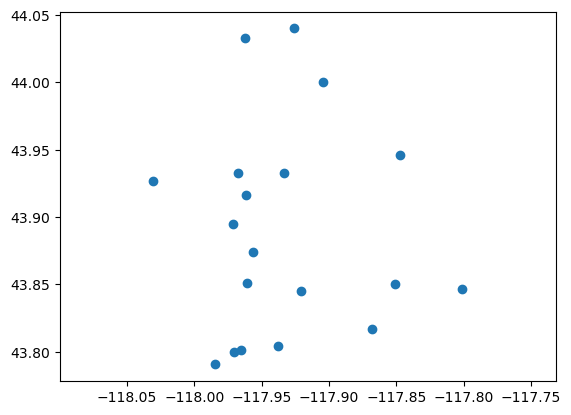

Scenario 0089_00777 has the wrong size for layout 0089_00984: 583 != 559 or 931 != 479


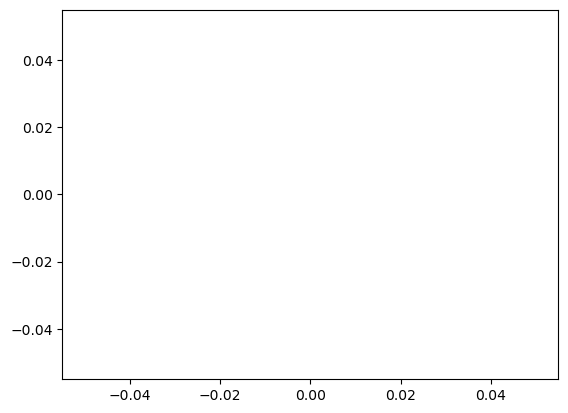

Failed 0
0104_02422
Layout ./WideDataset/0104_02422/Satellite_Images_Mask/ does not exist
Error for layout 0104_02422: unconverted data remains:  
0041_02386
Earliest date: 2023-08-22 00:00:00, Latest date: 2023-09-11 23:00:00
Sampler built with 30010 ignition points.


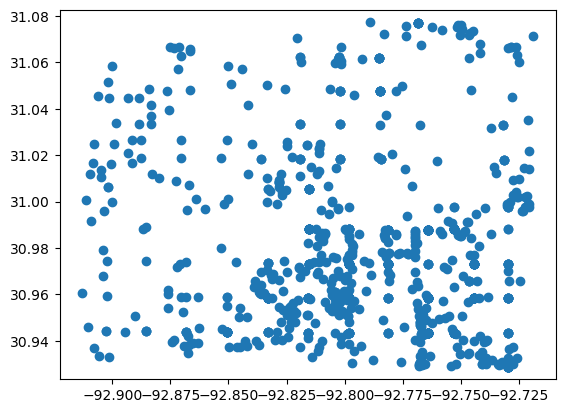

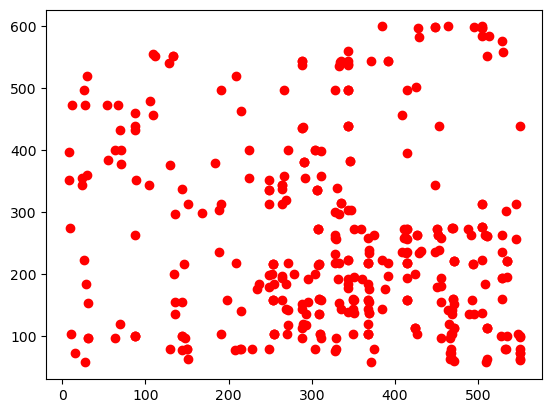

Failed 550
!! Failed 550 out of 918 for layout 0041_02386 !!
0016_03070
Earliest date: 2023-07-21 00:00:00, Latest date: 2023-08-09 23:00:00
Sampler built with 82185 ignition points.


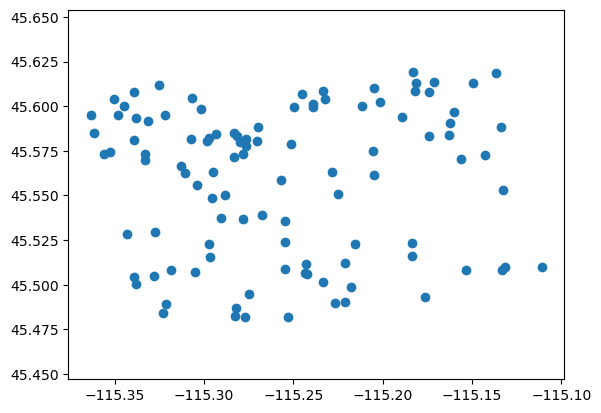

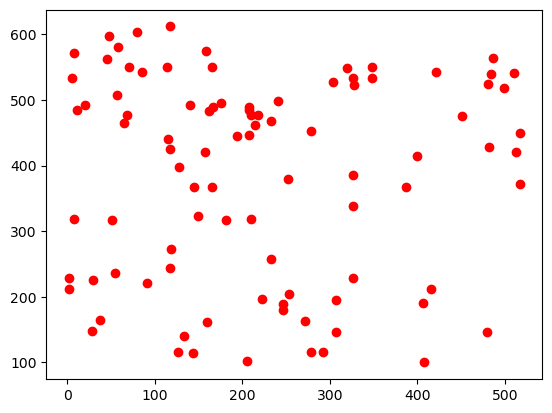

Failed 12
0270_02277
Earliest date: 2023-08-10 00:00:00, Latest date: 2023-08-27 23:00:00
Sampler built with 50236 ignition points.


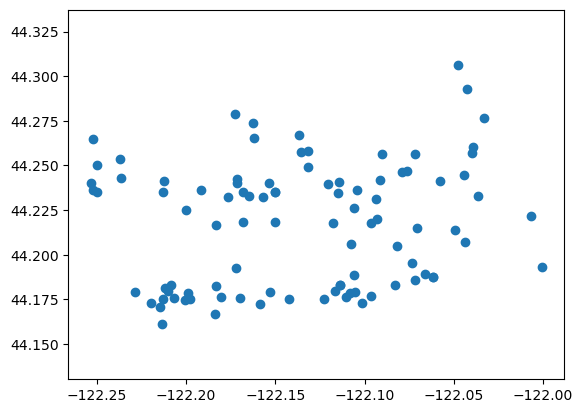

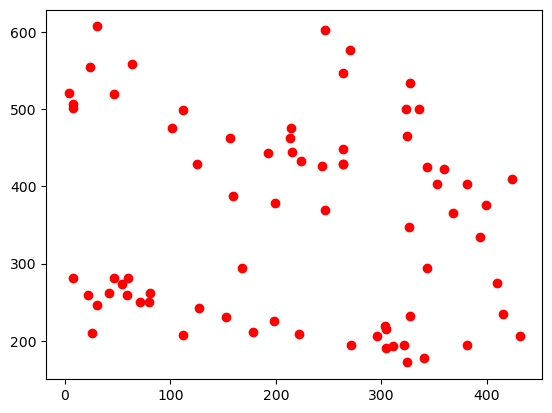

Failed 22
!! Failed 22 out of 95 for layout 0270_02277 !!
0105_03054
Layout ./WideDataset/0105_03054/Satellite_Images_Mask/ does not exist
Error for layout 0105_03054: unconverted data remains:  
0259_02663
Error for layout 0259_02663: unconverted data remains:  
0037_01578
Earliest date: 2022-04-19 00:00:00, Latest date: 2022-05-28 23:00:00
Error processing 0037_00990: No JPG files found in folder: ./WideDataset/0037_01578/Satellite_Images_Mask/0037_00990/
Error processing 0037_00989: No JPG files found in folder: ./WideDataset/0037_01578/Satellite_Images_Mask/0037_00989/
Error processing 0037_00277: No JPG files found in folder: ./WideDataset/0037_01578/Satellite_Images_Mask/0037_00277/
Sampler built with 41686 ignition points.


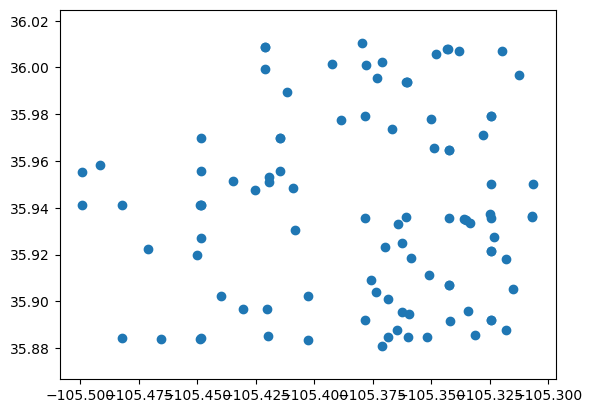

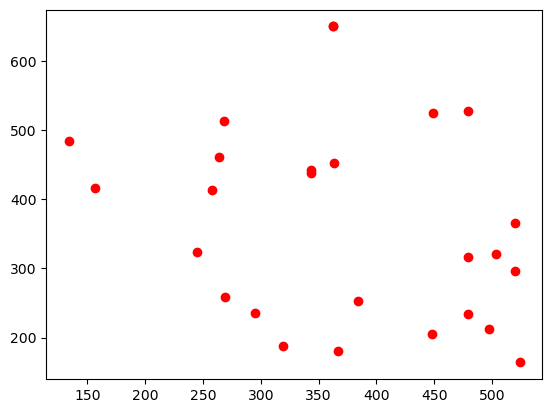

Failed 74
!! Failed 74 out of 100 for layout 0037_01578 !!
0250_02864
Error for layout 0250_02864: unconverted data remains:  
0252_02927
Error for layout 0252_02927: unconverted data remains:  5
0324_02925
Layout ./WideDataset/0324_02925/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0324_02925/Satellite_Image_Mask/ does not exist
0249_02843
Error for layout 0249_02843: unconverted data remains:  
0004_01191
Earliest date: 2023-04-01 00:00:00, Latest date: 2023-04-21 23:00:00
Sampler built with 134452 ignition points.


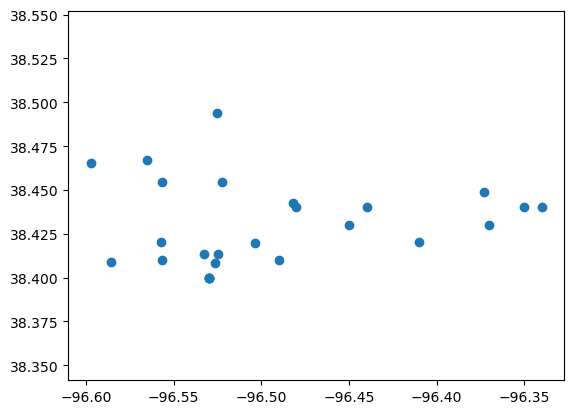

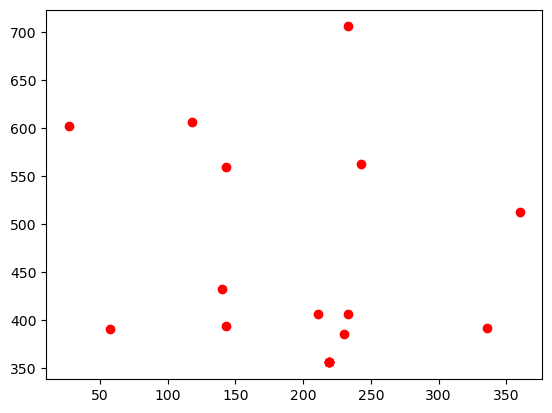

Failed 9
!! Failed 9 out of 26 for layout 0004_01191 !!
0243_02722
Layout ./WideDataset/0243_02722/Satellite_Images_Mask/ does not exist
Error for layout 0243_02722: unconverted data remains:  
0251_02843
Error for layout 0251_02843: unconverted data remains:  
0019_01316
Earliest date: 2023-04-01 00:00:00, Latest date: 2023-04-21 23:00:00
Sampler built with 133355 ignition points.


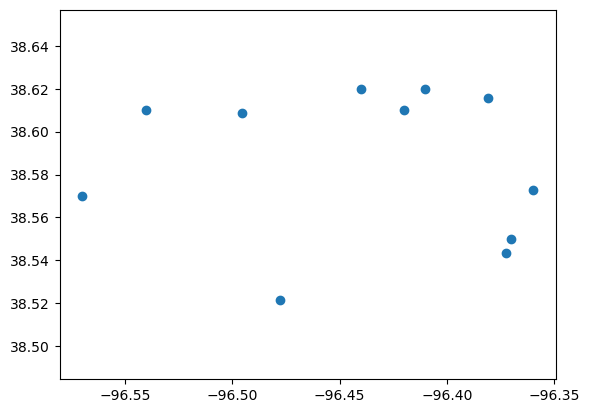

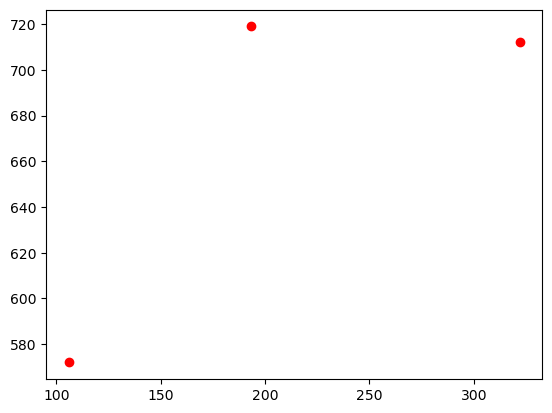

Failed 8
!! Failed 8 out of 11 for layout 0019_01316 !!
0013_01466
Earliest date: 2022-03-28 00:00:00, Latest date: 2022-04-20 23:00:00
Sampler built with 143276 ignition points.


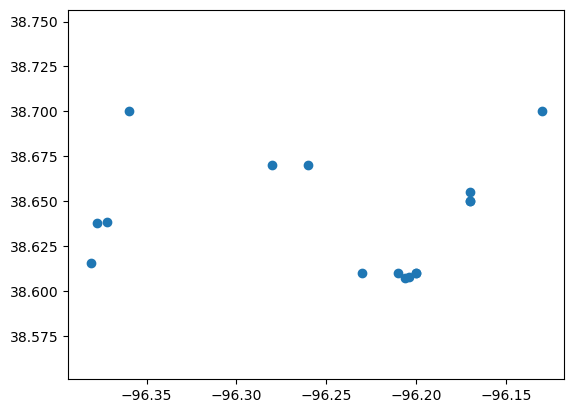

Scenario 0013_00258 has the wrong size for layout 0013_01466: 776 != 472 or 816 != 491


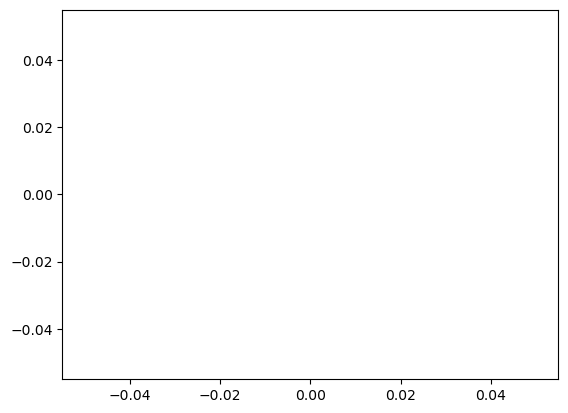

Failed 0
0012_02094
Earliest date: 2022-03-28 00:00:00, Latest date: 2022-04-20 23:00:00
Sampler built with 216358 ignition points.


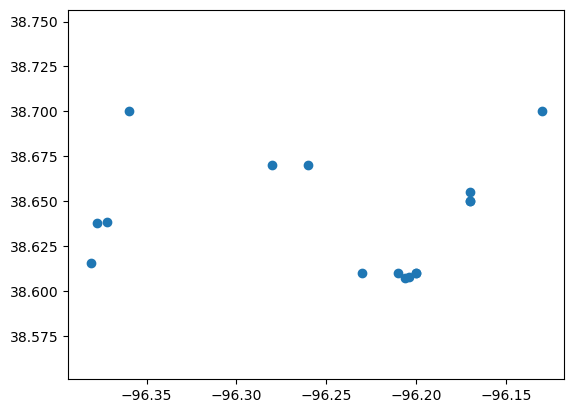

Scenario 0012_00907 has the wrong size for layout 0012_02094: 776 != 539 or 816 != 580


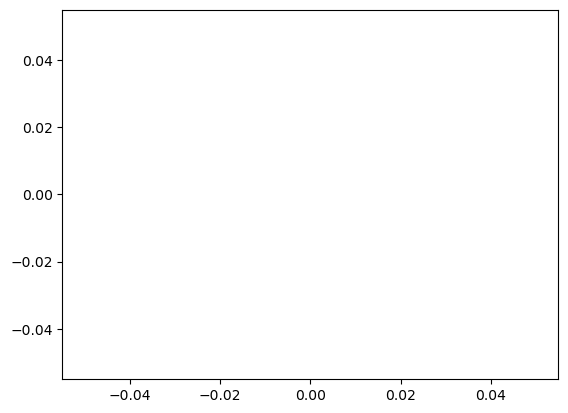

Failed 0
0248_01962
Error for layout 0248_01962: unconverted data remains:  
0067_03550
Error for layout 0067_03550: unconverted data remains:  
0246_00984
Error for layout 0246_00984: unconverted data remains:  
0084_02609
Error for layout 0084_02609: unconverted data remains:  5
0247_03453
Error for layout 0247_03453: unconverted data remains:  
0065_03061
Layout ./WideDataset/0065_03061/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0065_03061/Satellite_Image_Mask/ does not exist
0064_02717
Layout ./WideDataset/0064_02717/Satellite_Images_Mask/ does not exist
Error for layout 0064_02717: unconverted data remains:  
0066_03773
Layout ./WideDataset/0066_03773/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0066_03773/Satellite_Image_Mask/ does not exist
0069_03539
Layout ./WideDataset/0069_03539/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0069_03539/Satellite_Image_Mask/ does not exist
0059_02804
Layout ./WideDataset/0059_02804/Satellite_Images_Ma

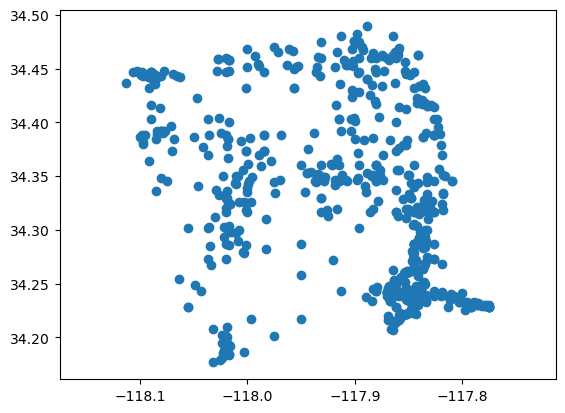

Scenario 0102_00647 has the wrong size for layout 0102_01733: 846 != 565 or 1046 != 555


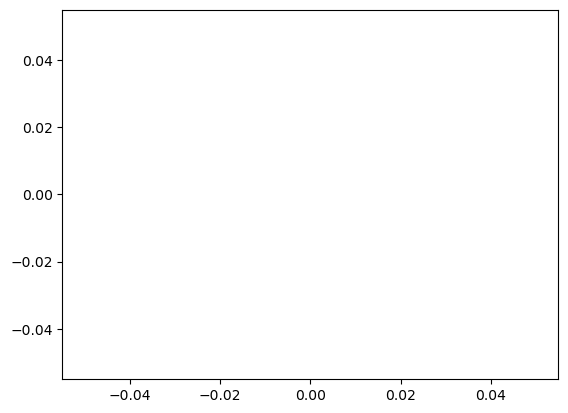

Failed 0
0103_01810
Earliest date: 2020-09-05 00:00:00, Latest date: 2020-09-28 23:00:00
Sampler built with 55126 ignition points.


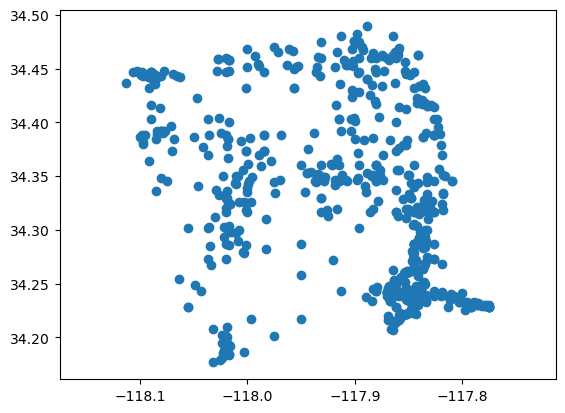

Scenario 0103_00524 has the wrong size for layout 0103_01810: 846 != 591 or 1046 != 638


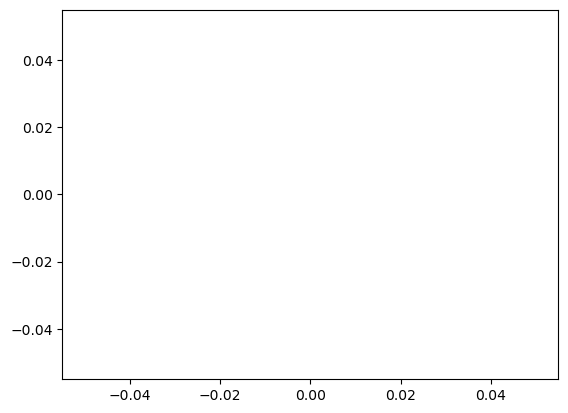

Failed 0
0068_04211
Layout ./WideDataset/0068_04211/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0068_04211/Satellite_Image_Mask/ does not exist
0082_03155
Error for layout 0082_03155: unconverted data remains:  5
0261_02900
Error for layout 0261_02900: unconverted data remains:  
0057_03186
Layout ./WideDataset/0057_03186/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0057_03186/Satellite_Image_Mask/ does not exist
0090_00987
Earliest date: 2020-08-14 00:00:00, Latest date: 2020-09-01 23:00:00
Sampler built with 19427 ignition points.


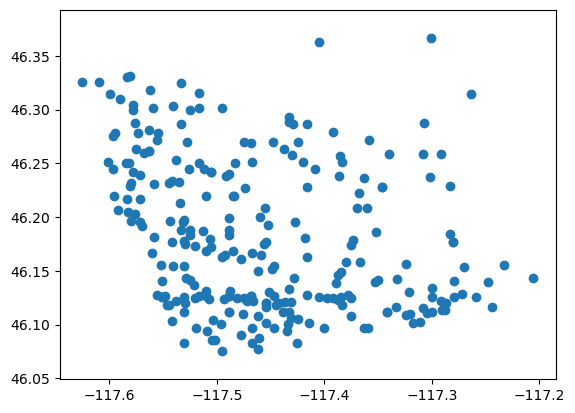

Scenario 0090_00947 has the wrong size for layout 0090_00987: 931 != 555 or 1009 != 505


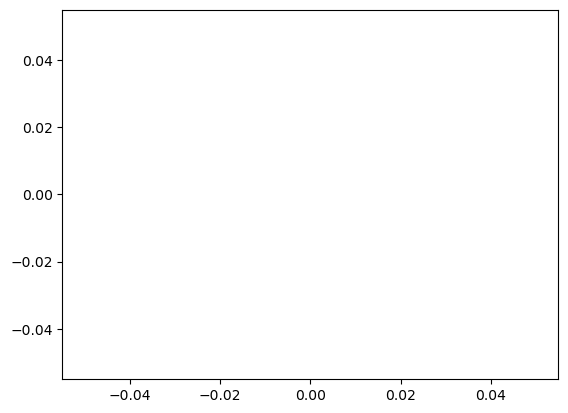

Failed 0
0242_02940
Layout ./WideDataset/0242_02940/Satellite_Images_Mask/ does not exist
Error for layout 0242_02940: unconverted data remains:  
0245_03988
Layout ./WideDataset/0245_03988/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0245_03988/Satellite_Image_Mask/ does not exist
0081_03471
Error for layout 0081_03471: unconverted data remains:  
0060_03010
Layout ./WideDataset/0060_03010/Satellite_Images_Mask/ does not exist
Error for layout 0060_03010: unconverted data remains:  6
0062_03187
Layout ./WideDataset/0062_03187/Satellite_Images_Mask/ does not exist
Error for layout 0062_03187: unconverted data remains:  5
0262_03319
Error for layout 0262_03319: unconverted data remains:  
0260_03391
Error for layout 0260_03391: unconverted data remains:  
0058_03866
Layout ./WideDataset/0058_03866/Satellite_Images_Mask/ does not exist
Error for layout 0058_03866: unconverted data remains:  
0244_03110
Layout ./WideDataset/0244_03110/Satellite_Images_Mask/ does not exist
Er

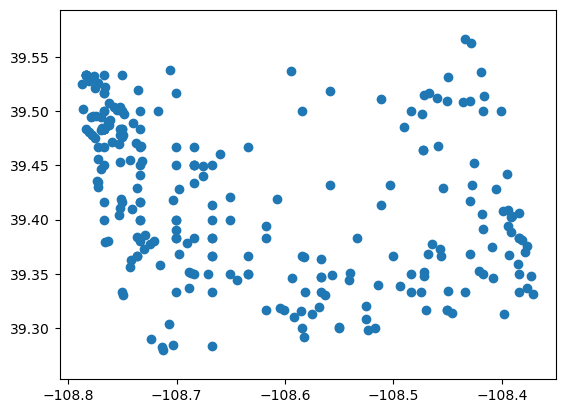

Scenario 0094_00038 has the wrong size for layout 0094_01688: 1102 != 494 or 977 != 534


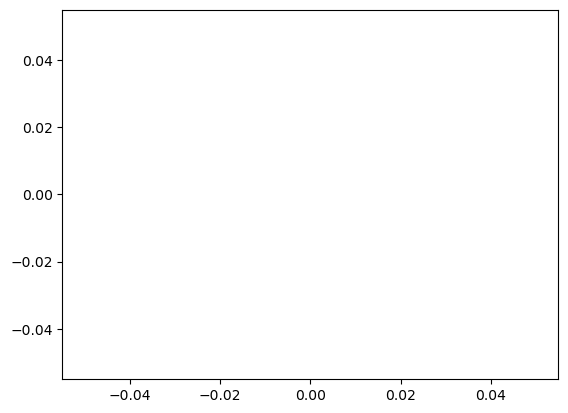

Failed 0
0095_01726
Earliest date: 2020-08-01 00:00:00, Latest date: 2020-08-31 23:00:00
Sampler built with 36114 ignition points.


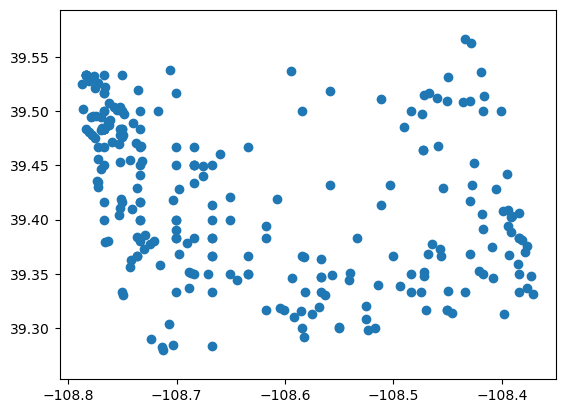

Scenario out210_2_ArrivalTime has the wrong size for layout 0095_01726: 1102 != 558 or 977 != 487


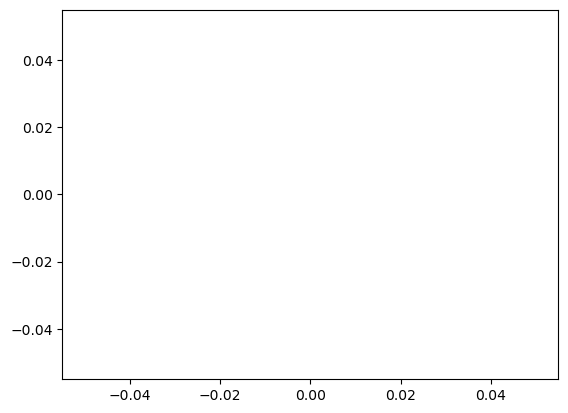

Failed 0
0093_01748
Earliest date: 2020-08-01 00:00:00, Latest date: 2020-08-31 23:00:00
Sampler built with 42163 ignition points.


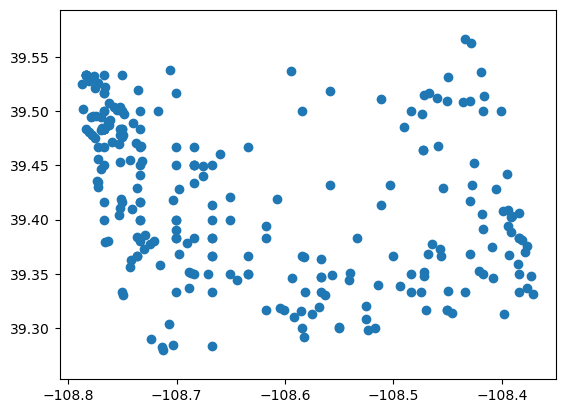

Scenario 0093_01168 has the wrong size for layout 0093_01748: 1102 != 492 or 977 != 514


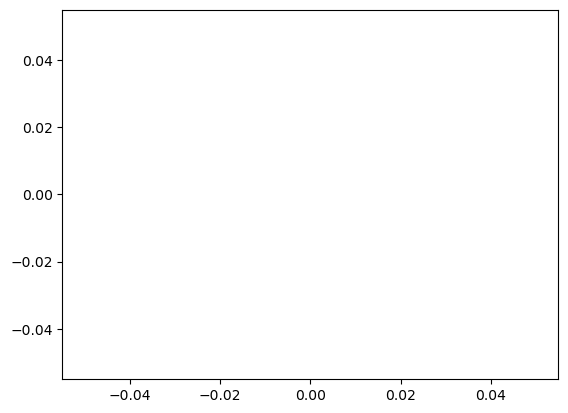

Failed 0
0083_02892
Error for layout 0083_02892: unconverted data remains:  
0021_01232
Earliest date: 2022-03-31 00:00:00, Latest date: 2022-04-28 23:00:00
Error processing 0021_00124: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00124/
Error processing 0021_00123: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00123/
Error processing 0021_00125: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00125/
Error processing 0021_00655: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00655/
Error processing 0021_00035: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00035/
Error processing 0021_00092: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00092/
Error processing 0021_00830: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00830/
Error processing 

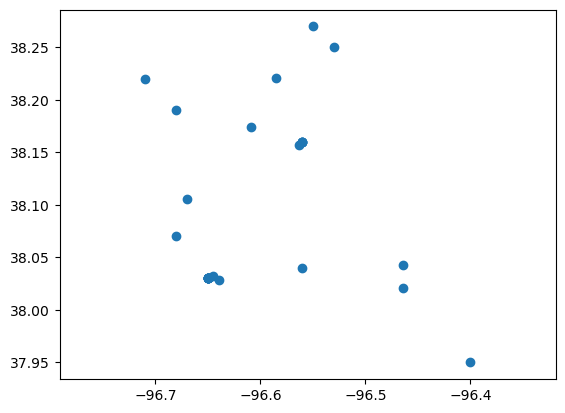

Scenario 0021_00115 has the wrong size for layout 0021_01232: 1124 != 555 or 1317 != 570


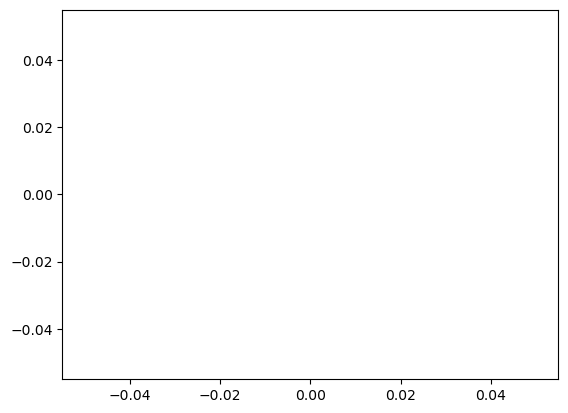

Failed 0
0020_00970
Earliest date: 2022-03-31 00:00:00, Latest date: 2022-04-28 23:00:00
Sampler built with 95106 ignition points.


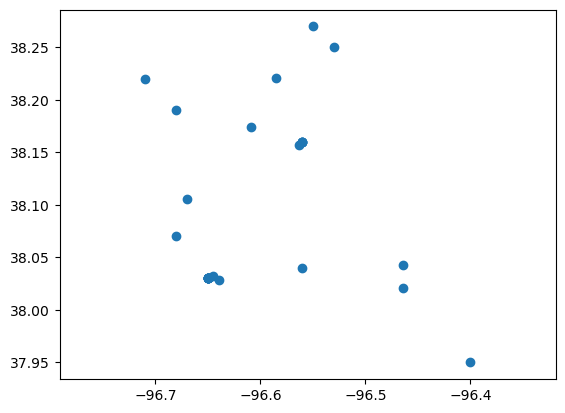

Scenario 0020_00276 has the wrong size for layout 0020_00970: 1124 != 499 or 1317 != 573


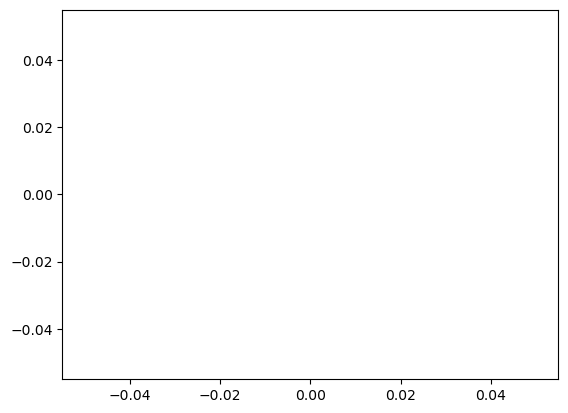

Failed 0
0063_02387
Layout ./WideDataset/0063_02387/Satellite_Images_Mask/ does not exist
Error for layout 0063_02387: unconverted data remains:  5
0061_03726
Layout ./WideDataset/0061_03726/Satellite_Images_Mask/ does not exist
Error for layout 0061_03726: unconverted data remains:  
0100_02449
Earliest date: 2020-09-05 00:00:00, Latest date: 2020-09-28 23:00:00
Sampler built with 36174 ignition points.


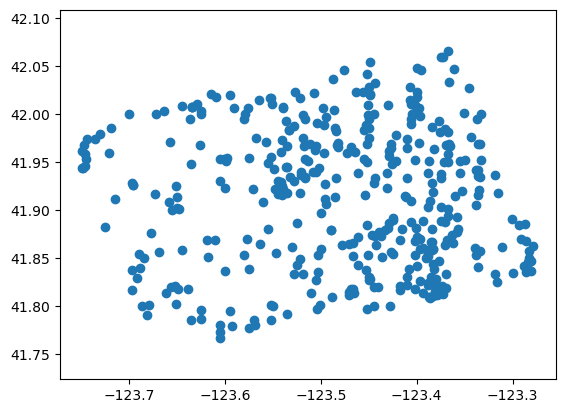

Scenario 0100_01361 has the wrong size for layout 0100_02449: 1163 != 572 or 945 != 471


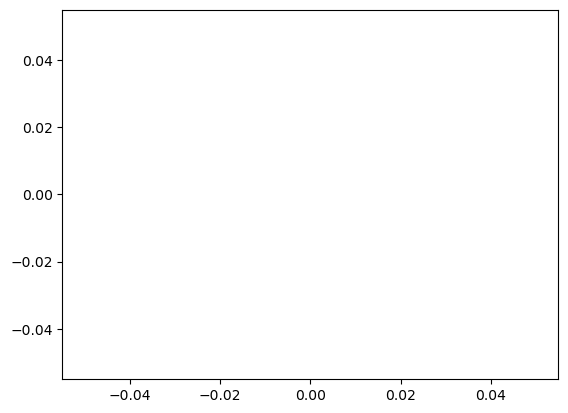

Failed 0
0098_01784
Earliest date: 2020-09-05 00:00:00, Latest date: 2020-09-28 23:00:00
Sampler built with 32471 ignition points.


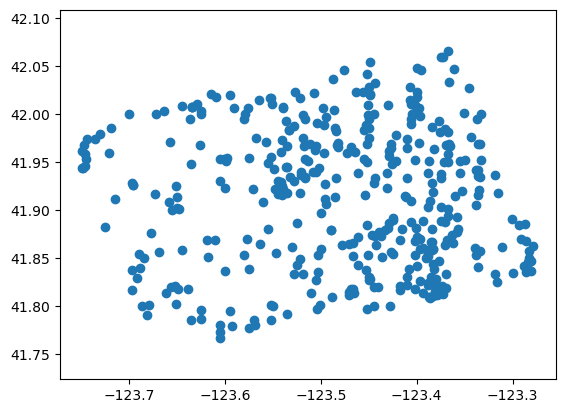

Scenario 0098_01539 has the wrong size for layout 0098_01784: 1163 != 520 or 945 != 487


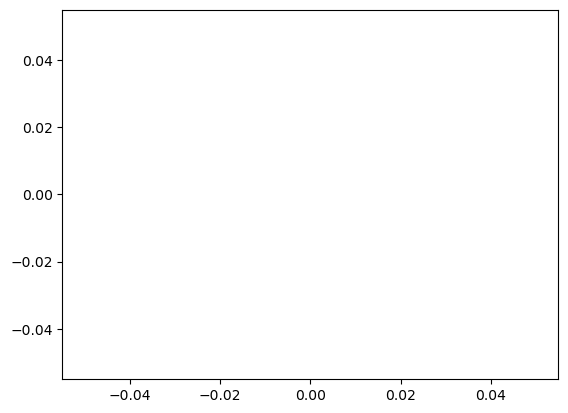

Failed 0
0048_01141
Earliest date: 2022-03-27 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 55838 ignition points.


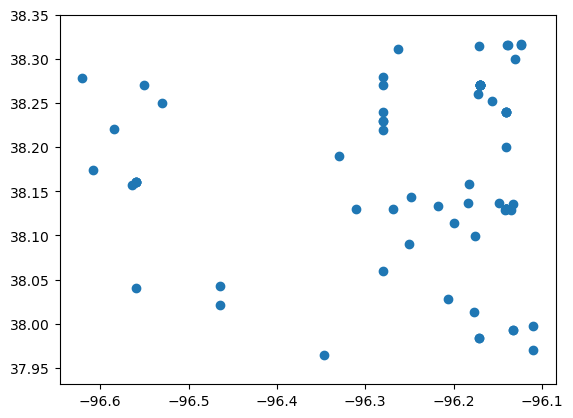

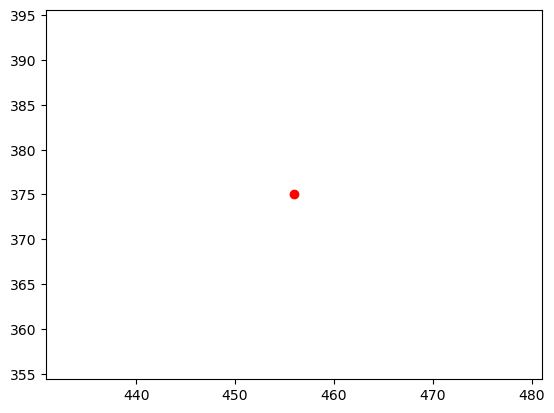

Failed 72
!! Failed 72 out of 73 for layout 0048_01141 !!
0047_05424
Earliest date: 2022-03-27 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 260805 ignition points.


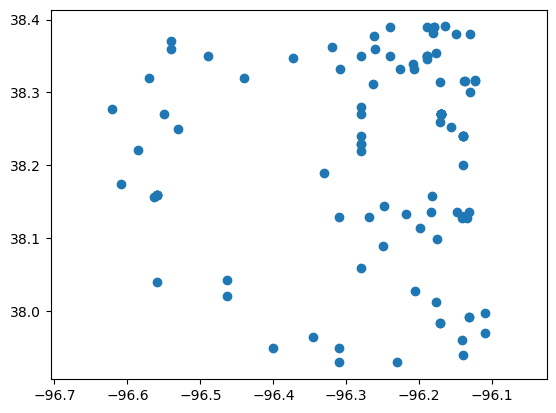

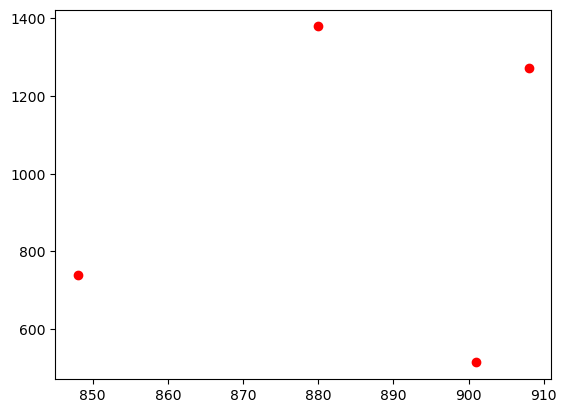

Failed 103
!! Failed 103 out of 107 for layout 0047_05424 !!
0049_01289
Earliest date: 2022-03-27 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 56643 ignition points.


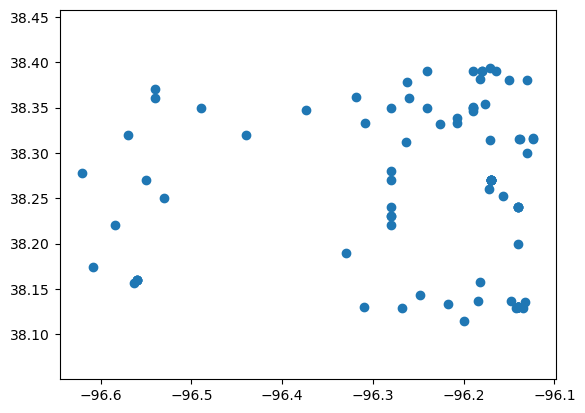

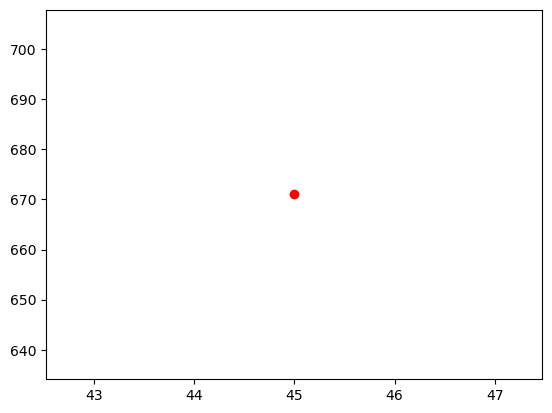

Failed 86
!! Failed 86 out of 87 for layout 0049_01289 !!
0114_02292
Error for layout 0114_02292: unconverted data remains:  5
0113_03495
Error for layout 0113_03495: unconverted data remains:  
0258_02858
Error for layout 0258_02858: unconverted data remains:  
0257_02175
Error for layout 0257_02175: unconverted data remains:  
0253_03246
Error for layout 0253_03246: unconverted data remains:  5
0255_02103
Error for layout 0255_02103: unconverted data remains:  
0254_02361
Error for layout 0254_02361: unconverted data remains:  
0256_02752
Error for layout 0256_02752: unconverted data remains:  
110
131


In [49]:
# Get the layout coordinates 
# 1 extract the tif files
dataset_path = "./WideDataset/"

# copy the layout tifs from a folder to a folder called sim2real_layout
tif_path = "sim2real_layouts"
os.makedirs(tif_path, exist_ok=True)
for folder in os.listdir(dataset_path):
    if folder == ".DS_Store":
        continue
    shutil.copy(f"WideDataset/{folder}/Vegetation_Map/Existing_Vegetation_Cover.tif", f"{tif_path}/{folder}_Existing_Vegetation_Cover.tif")

print("Copied the layout tifs to sim2real_layouts")
####

tif_files = glob(os.path.join(tif_path, "*.tif"))
layout_list = []
widths = []
names = []
for tif_file in tif_files:
    with rasterio.open(tif_file) as dataset:
        # get the file name without the path
        file_name = os.path.basename(tif_file)  # '0004_Elevation.tif'
        identifier = "_".join(file_name.split('_')[:2])

        # extract the resolution, check it is 30
        x_resolution = dataset.transform[0]
        y_resolution = -dataset.transform[4]
        assert x_resolution == y_resolution == 30, f"Resolution is not the same: {x_resolution} != {y_resolution}"

        # extract the coordinates using the bounds
        # /!\ DO NOT USE transform_bounds(dataset.crs, 'EPSG:4326', *dataset.bounds)
        x_min = dataset.bounds[0]
        x_max = dataset.bounds[2]
        y_min = dataset.bounds[1]
        y_max = dataset.bounds[3]

        transformer = Transformer.from_crs(dataset.crs, "EPSG:4326", always_xy=True)
        lat_top_left, lon_top_left = transformer.transform(x_min, y_max)
        lat_top_right, lon_top_right = transformer.transform(x_max, y_max)
        lat_bottom_left, lon_bottom_left = transformer.transform(x_min, y_min)
        lat_bottom_right, lon_bottom_right = transformer.transform(x_max, y_min)

        # Create the polygon using the transformed bounds
        polygon = Polygon((
            (lat_top_left, lon_top_left),
            (lat_top_right, lon_top_right),
            (lat_bottom_right, lon_bottom_right),
            (lat_bottom_left, lon_bottom_left),
            (lat_top_left, lon_top_left)  # close the polygon
        ))

        layout_list.append({
            'identifier': identifier,
            'height': dataset.height,
            'width': dataset.width,
            'geometry': polygon,
            'transformer': transformer,
            'dataset': dataset
        })


        widths.append(dataset.width)
        names.append(identifier)

sorted_indices = np.argsort(widths)
widths = np.array(widths)[sorted_indices]
names = np.array(names)[sorted_indices]
filtered_layout_list = [layout_list[i] for i in sorted_indices]

n_small_layouts = len(widths[widths < 500])
n_medium_layouts = len(widths[(widths >= 500) & (widths < 1000)])
n_large_layouts = len(widths[widths >= 1000])

small_layouts = filtered_layout_list[:n_small_layouts]
medium_layouts = filtered_layout_list[n_small_layouts:n_small_layouts + n_medium_layouts]
large_layouts = filtered_layout_list[n_small_layouts + n_medium_layouts:]

print("loaded the layout list")


# convert the layout list to a geopandas df
gdf = gpd.GeoDataFrame(layout_list, geometry='geometry', crs="EPSG:4326")




# Load the historical fires 
fires_gdf = gpd.read_file("./FPA_FOD_20210617.gpkg")
fires_gdf = fires_gdf.to_crs("EPSG:4326")
print("loaded the fires")


# Joint
# Spatial join: find which points fall into which polygons
joined = gpd.sjoin(fires_gdf, gdf, how='inner', predicate='within')


# Count points per polygon
counts = joined.groupby('identifier').size().reset_index(name='fire_count')


dataset_path = "./WideDataset/"
scenario_path_suffix = "/Satellite_Images_Mask/"

failed_layouts = []
continue_out = False
processed = total = 0

for layout_name in names:
    total+=1
    print(layout_name)
    try:
        layout_folder = dataset_path + layout_name + scenario_path_suffix
        # check the layout folder exists
        if not os.path.exists(layout_folder):
            print(f"Layout {layout_folder} does not exist")
            layout_folder = dataset_path + layout_name +  "/Satellite_Image_Mask/"
            if not os.path.exists(layout_folder):
                print(f"Layout {layout_folder} does not exist")
                failed_layouts.append(layout_name)
                continue
        
        if os.path.exists(f"./WideDataset/{layout_name}/selected_scenarios.txt"):
            processed +=1
            #continue

        # check that the scenario have the right size
        first_scenario = return_first_scenario(layout_folder)
        if first_scenario is None:
            print(f"Layout {layout_name} does not have any scenario")
            failed_layouts.append(layout_name)
            continue
        
        first_loaded_scenario = load_scenario(os.path.join(layout_folder, first_scenario), extension = '.jpg', first_frame_only=True)
        height_scenario, width_scenario = first_loaded_scenario.shape[0], first_loaded_scenario.shape[1]

        earliest_date, latest_date = find_earliest_latest_dates(dataset_path + layout_name)
        print(f"Earliest date: {earliest_date}, Latest date: {latest_date}")

        sampler = ScenarioSampler(layout_folder, extension = '.jpg')
        sampled_scenarios = []
        sampled_ignition_points = []
        associated_fires = []
        date_matched = []
        distances = []
        failed = 0
        # plot the historical fires
        data = joined[joined['identifier'] == layout_name]
        plt.scatter(data["LONGITUDE"], data["LATITUDE"])
        plt.axis("equal")
        plt.show()

        # start with the fires that have potewntial to be test fires, i.e their date is between the earliest and latest date
        # We will have one "test" dataset, one "train" dataset, and one extra train dataset for the test fires
        # filtered_data = data[
        # (data['DISCOVERY_DATE'].dt.date >= earliest_date.date()) & 
        # (data['DISCOVERY_DATE'].dt.date <= latest_date.date())
        # ]
        

        for i, fire in data.iterrows():
            # print the coordinates of the fire
            width, height = fire['width'], fire['height']
            # check that the scenario have the right size
            if width != width_scenario or height != height_scenario:
                print(f"Scenario {first_scenario} has the wrong size for layout {layout_name}: {width} != {width_scenario} or {height} != {height_scenario}")
                failed_layouts.append(layout_name)
                break
            dataset = fire['dataset']
            transformer = fire['transformer']
            x_fire, y_fire = transformer.transform(fire['LONGITUDE'], fire['LATITUDE'], direction='INVERSE')
            row, col = rasterio.transform.rowcol(dataset.transform, x_fire, y_fire)
            # print("row, col", row, col)
            ignition_point = (col, row)
            sample, sampled_ignition_point = sampler.get_scenario_location(ignition_point, leeway_distance=5, sampling_method='closest', exclude_scenarios=sampled_scenarios)
            if sample is None:
                failed += 1
                continue
            sampled_scenarios.append(sample)
            sampled_ignition_points.append(sampled_ignition_point)
            associated_fires.append(fire['FOD_ID'])
            distance = abs(sampled_ignition_point[0] - ignition_point[0]) + abs(sampled_ignition_point[1] - ignition_point[1])
            distances.append(distance)
        # plot the sampled scenarios
        # the axes are inverted as coordinates start in (0,0) in the top left corner
        fig, ax = plt.subplots()
        ax.scatter([point[0] for point in sampled_ignition_points], [width - point[1] for point in sampled_ignition_points], color='red')
        plt.show()
        print(f"Failed {failed}")
        # write the selected scenarios in a txt file
        with open(f"./WideDataset/{layout_name}/selected_scenarios.txt", "w") as f:
            for scenario, fire_id in zip(sampled_scenarios, associated_fires):
                f.write(f"{scenario}, {fire_id}\n")
            f.write(f"Failed: {failed}\n")
            failed_percentage = failed / max(len(data),1)
            f.write(f"Failed percentage: {failed_percentage}\n")
        if len(data) == 0 or failed_percentage > 0.2:
            print(f"!! Failed {failed} out of {len(data)} for layout {layout_name} !!")
            failed_layouts.append(layout_name)
    except Exception as e:
        print(f"Error for layout {layout_name}: {e}")
        failed_layouts.append(layout_name)
print(processed)
print(total)
    

# TODO do we need to create the grid manually? I think the raster file will doirectly give you the coordinates within the layout


# for each fire, sample the scenario (space only, and time+space)
# write the identifier in a txt file (one for space only, one for time+space)

# move the scenarios into a selected folder
# "delete" the other scenarios

# train test split with the date












# same with date

Copied the layout tifs to sim2real_layouts
loaded the layout list
loaded the fires
0101_02057
No fires found for layout 0101_02057 between 2020-09-02 00:00:00 and 2020-09-23 23:00:00
example  fire date: 1992-07-17 00:00:00
0279_03823
Layout 0279_03823 has no fires before 2021: 2021-07-07 00:00:00
0280_03717
Layout 0280_03717 has no fires before 2021: 2021-07-07 00:00:00
0014_00426
Layout 0014_00426 has no fires before 2021: 2023-07-21 00:00:00
0002_00714
Layout 0002_00714 has no fires before 2021: 2023-07-25 00:00:00
0046_02758
Layout 0046_02758 has no fires before 2021: 2022-09-14 00:00:00
0282_03685
Layout 0282_03685 has no fires before 2021: 2021-08-04 00:00:00
0346_02223
Layout 0346_02223 has no fires before 2021: 2021-08-11 00:00:00
0321_03136
Layout 0321_03136 has no fires before 2021: 2021-07-07 00:00:00
0314_02558
Layout 0314_02558 has no fires before 2021: 2021-07-07 00:00:00
0269_00642
Layout 0269_00642 has no fires before 2021: 2022-08-25 00:00:00
0056_01464
Layout 0056_0146

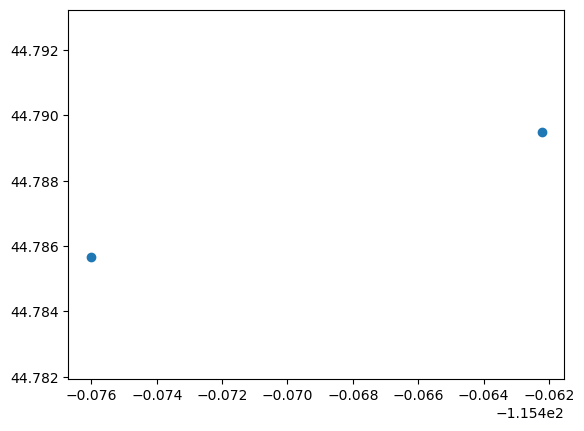

Error for layout 0264_02426: not enough values to unpack (expected 3, got 2)
0327_03305
No fires found for layout 0327_03305 between 2020-08-12 00:00:00 and 2020-09-05 23:00:00
example  fire date: 2000-07-24 00:00:00
0278_01323
Layout 0278_01323 has no fires before 2021: 2023-07-22 00:00:00
0052_00798
Layout 0052_00798 has no fires before 2021: 2022-12-25 00:00:00
0315_02455
Layout ./WideDataset/0315_02455/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0315_02455/Satellite_Image_Mask/ does not exist
0265_02487
Layout 0265_02487 has no fires before 2021: 2021-07-06 00:00:00
0277_02102
Layout 0277_02102 has no fires before 2021: 2021-07-06 00:00:00
0110_02767
Layout ./WideDataset/0110_02767/Satellite_Images_Mask/ does not exist
No fires found for layout 0110_02767 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2008-06-21 00:00:00
0054_01387
Layout 0054_01387 has no fires before 2021: 2023-08-14 00:00:00
0086_02230
Sampler built with 17 ignition dates.

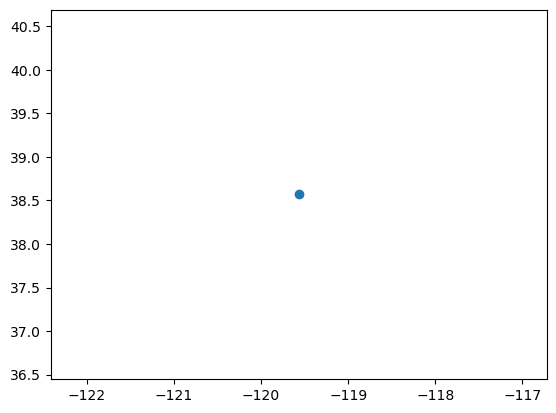

Scenario 0086_00265 has the wrong size for layout 0086_02230: 429 != 263 or 445 != 309


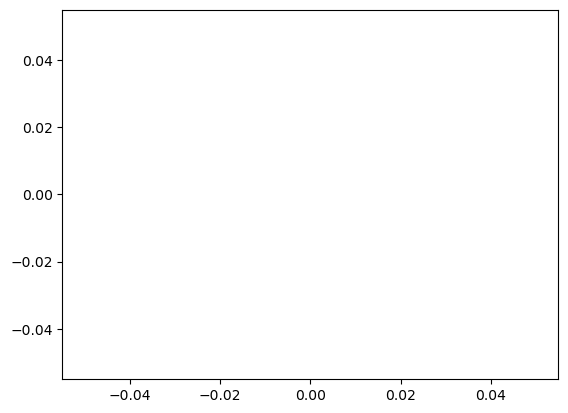

Failed 0
Layout 0086_02230: 88 fires, 0 failed, 0.0
0087_02445
Sampler built with 17 ignition dates.


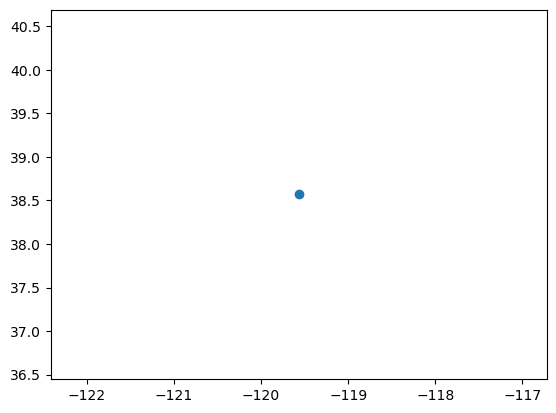

Scenario 0021_00115 has the wrong size for layout 0087_02445: 429 != 267 or 445 != 285


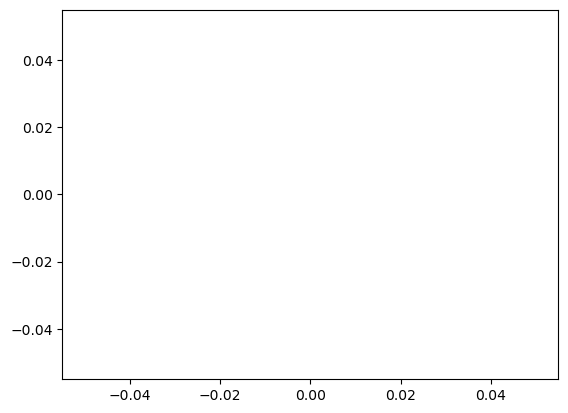

Failed 0
Layout 0087_02445: 88 fires, 0 failed, 0.0
0003_01715
Layout 0003_01715 has no fires before 2021: 2023-05-17 00:00:00
0109_03065
Layout ./WideDataset/0109_03065/Satellite_Images_Mask/ does not exist
Error processing 0109_02125: unconverted data remains:  
Error processing 0109_02919: unconverted data remains:  
Error processing 0109_00672: unconverted data remains:  
Error processing 0109_00440: unconverted data remains:  
Error processing 0109_01592: unconverted data remains:  0
Error processing 0109_02317: unconverted data remains:  
Error processing 0109_00818: unconverted data remains:  
Error processing 0109_00024: unconverted data remains:  
Error processing 0109_02773: unconverted data remains:  
Error processing 0109_02541: unconverted data remains:  
Error processing 0109_00216: unconverted data remains:  
Error processing 0109_01102: unconverted data remains:  
Error processing 0109_02787: unconverted data remains:  
Error processing 0109_01330: unconverted data rema

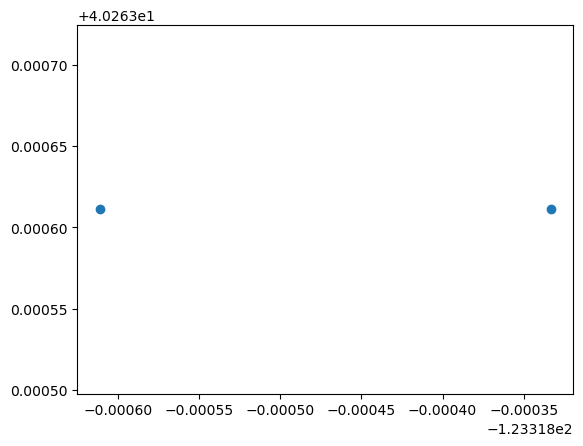

Error for layout 0109_03065: not enough values to unpack (expected 3, got 2)
0088_01340
Layout 0088_01340 has no fires before 2021: 2021-08-09 00:00:00
0045_02388
Layout 0045_02388 has no fires before 2021: 2023-08-24 00:00:00
0335_01696
Layout 0335_01696 has no fires before 2021: 2021-07-12 00:00:00
0338_02320
Layout 0338_02320 has no fires before 2021: 2021-07-06 00:00:00
0337_02831
Layout 0337_02831 has no fires before 2021: 2021-07-06 00:00:00
0316_02459
Layout ./WideDataset/0316_02459/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0316_02459/Satellite_Image_Mask/ does not exist
0333_03036
No fires found for layout 0333_03036 between 2020-08-12 00:00:00 and 2020-09-05 23:00:00
example  fire date: 2001-10-14 00:00:00
0332_03255
No fires found for layout 0332_03255 between 2020-08-12 00:00:00 and 2020-09-05 23:00:00
example  fire date: 2003-07-20 00:00:00
0108_02258
Layout ./WideDataset/0108_02258/Satellite_Images_Mask/ does not exist
Error processing 0108_00511: unconver

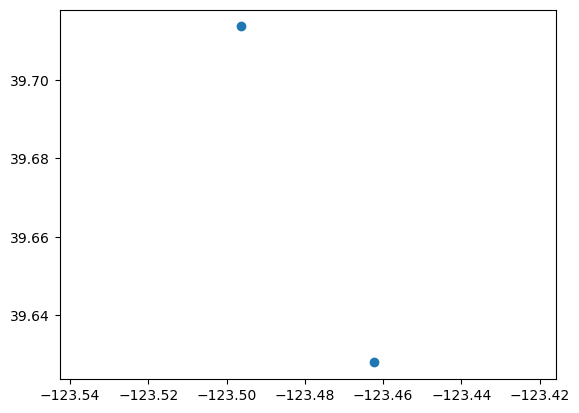

Error for layout 0108_02258: not enough values to unpack (expected 3, got 2)
0325_03049
No fires found for layout 0325_03049 between 2020-08-12 00:00:00 and 2020-09-05 23:00:00
example  fire date: 2002-06-08 00:00:00
0025_02019
Layout 0025_02019 has no fires before 2021: 2022-04-01 00:00:00
0344_03155
Layout 0344_03155 has no fires before 2021: 2022-06-17 00:00:00
0024_02655
Layout 0024_02655 has no fires before 2021: 2022-04-03 00:00:00
0106_02165
Layout ./WideDataset/0106_02165/Satellite_Images_Mask/ does not exist
No fires found for layout 0106_02165 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2006-06-26 00:00:00
0092_03189
No fires found for layout 0092_03189 between 2020-08-09 00:00:00 and 2020-08-29 23:00:00
example  fire date: 2005-07-26 00:00:00
0111_03612
Layout ./WideDataset/0111_03612/Satellite_Images_Mask/ does not exist
No fires found for layout 0111_03612 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2006-11-02 00:00:0

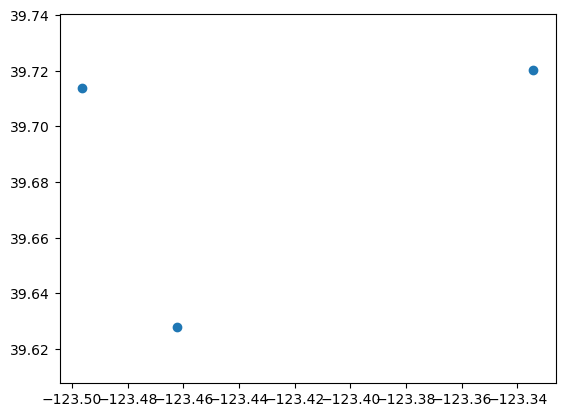

Error for layout 0104_02422: not enough values to unpack (expected 3, got 2)
0041_02386
Layout 0041_02386 has no fires before 2021: 2023-08-22 00:00:00
0016_03070
Layout 0016_03070 has no fires before 2021: 2023-07-21 00:00:00
0270_02277
Layout 0270_02277 has no fires before 2021: 2023-08-10 00:00:00
0105_03054
Layout ./WideDataset/0105_03054/Satellite_Images_Mask/ does not exist
Error processing 0105_01525: unconverted data remains:  
Error processing 0105_01717: unconverted data remains:  
Error processing 0105_02192: unconverted data remains:  0
Error processing 0105_03040: unconverted data remains:  
Error processing 0105_01373: unconverted data remains:  
Error processing 0105_01141: unconverted data remains:  
Error processing 0105_00093: unconverted data remains:  
Error processing 0105_01387: unconverted data remains:  
Error processing 0105_00255: unconverted data remains:  
Error processing 0105_02502: unconverted data remains:  
Error processing 0105_02730: unconverted data 

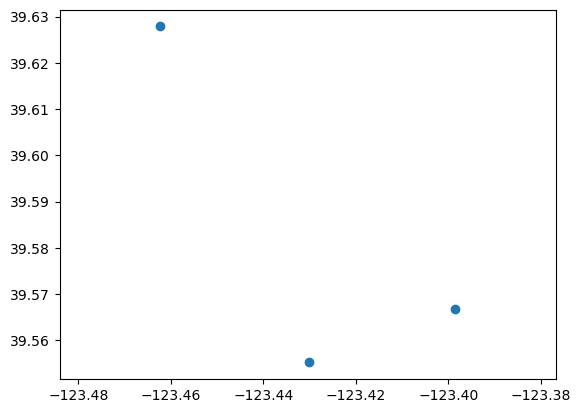

Error for layout 0105_03054: not enough values to unpack (expected 3, got 2)
0259_02663
Error processing 0259_01623: unconverted data remains:  
Error processing 0259_02294: unconverted data remains:  
Error processing 0259_01411: unconverted data remains:  
Error processing 0259_01075: unconverted data remains:  
Error processing 0259_01849: unconverted data remains:  0
Error processing 0259_01247: unconverted data remains:  
Error processing 0259_00395: unconverted data remains:  0
Error processing 0259_02604: unconverted data remains:  
Error processing 0259_01081: unconverted data remains:  
Error processing 0259_00153: unconverted data remains:  
Error processing 0259_00361: unconverted data remains:  
Error processing 0259_02436: unconverted data remains:  
Error processing 0259_00705: unconverted data remains:  
Error processing 0259_02052: unconverted data remains:  
Error processing 0259_02260: unconverted data remains:  
Error processing 0259_00537: unconverted data remains: 

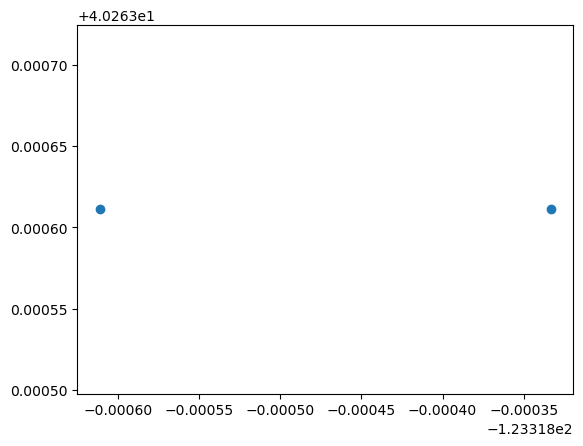

Error for layout 0259_02663: not enough values to unpack (expected 3, got 2)
0037_01578
Layout 0037_01578 has no fires before 2021: 2022-04-19 00:00:00
0250_02864
No fires found for layout 0250_02864 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2001-06-16 00:00:00
0252_02927
Error processing 0252_01616: unconverted data remains:  0
Error processing 0252_02093: unconverted data remains:  0
Error processing 0252_01424: unconverted data remains:  
Error processing 0252_00192: unconverted data remains:  0
Error processing 0252_01040: unconverted data remains:  
Error processing 0252_01272: unconverted data remains:  
Error processing 0252_02631: unconverted data remains:  
Error processing 0252_01888: unconverted data remains:  
Error processing 0252_00166: unconverted data remains:  
Error processing 0252_00354: unconverted data remains:  0
Error processing 0252_01286: unconverted data remains:  
Error processing 0252_02403: unconverted data remains:  
Error pro

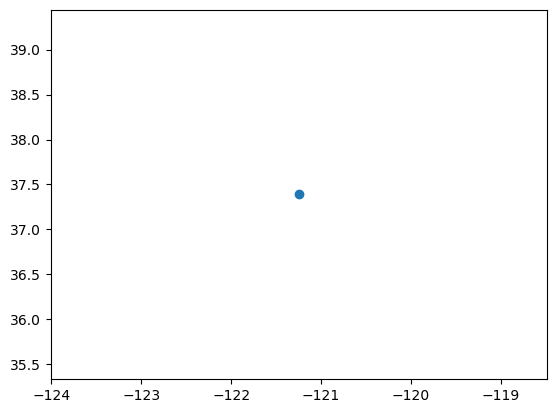

Error for layout 0252_02927: not enough values to unpack (expected 3, got 2)
0324_02925
Layout ./WideDataset/0324_02925/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0324_02925/Satellite_Image_Mask/ does not exist
0249_02843
No fires found for layout 0249_02843 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2001-10-14 00:00:00
0004_01191
Layout 0004_01191 has no fires before 2021: 2023-04-01 00:00:00
0243_02722
Layout ./WideDataset/0243_02722/Satellite_Images_Mask/ does not exist
Error processing 0243_00458: unconverted data remains:  
Error processing 0243_00800: unconverted data remains:  
Error processing 0243_02559: unconverted data remains:  0
Error processing 0243_01926: unconverted data remains:  
Error processing 0243_01328: unconverted data remains:  
Error processing 0243_02566: unconverted data remains:  0
Error processing 0243_00231: unconverted data remains:  0
Error processing 0243_00003: unconverted data remains:  
Error processing 0

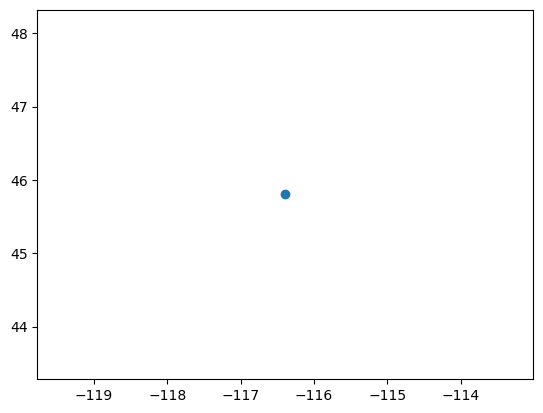

Error for layout 0243_02722: not enough values to unpack (expected 3, got 2)
0251_02843
No fires found for layout 0251_02843 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2003-07-12 00:00:00
0019_01316
Layout 0019_01316 has no fires before 2021: 2023-04-01 00:00:00
0013_01466
Layout 0013_01466 has no fires before 2021: 2022-03-28 00:00:00
0012_02094
Layout 0012_02094 has no fires before 2021: 2022-03-28 00:00:00
0248_01962
Error processing 0248_00009: unconverted data remains:  
Error processing 0248_00835: unconverted data remains:  0
Error processing 0248_01913: unconverted data remains:  
Error processing 0248_01779: unconverted data remains:  
Error processing 0248_00499: unconverted data remains:  
Error processing 0248_00204: unconverted data remains:  
Error processing 0248_00036: unconverted data remains:  
Error processing 0248_00452: unconverted data remains:  
Error processing 0248_01580: unconverted data remains:  0
Error processing 0248_00660: unc

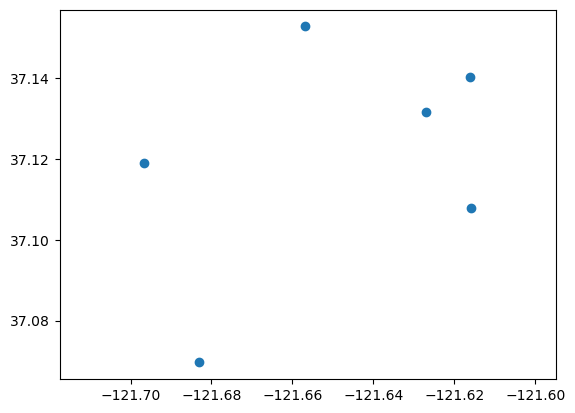

Error for layout 0248_01962: not enough values to unpack (expected 3, got 2)
0067_03550
Error processing 0067_03235: unconverted data remains:  
Error processing 0067_01562: unconverted data remains:  
Error processing 0067_01750: unconverted data remains:  
Error processing 0067_00682: unconverted data remains:  
Error processing 0067_03007: unconverted data remains:  
Error processing 0067_01334: unconverted data remains:  
Error processing 0067_03463: unconverted data remains:  
Error processing 0067_02783: unconverted data remains:  0
Error processing 0067_01106: unconverted data remains:  
Error processing 0067_00212: unconverted data remains:  
Error processing 0067_02545: unconverted data remains:  
Error processing 0067_03497: unconverted data remains:  0
Error processing 0067_02777: unconverted data remains:  0
Error processing 0067_00020: unconverted data remains:  
Error processing 0067_02313: unconverted data remains:  
Error processing 0067_01596: unconverted data remains:

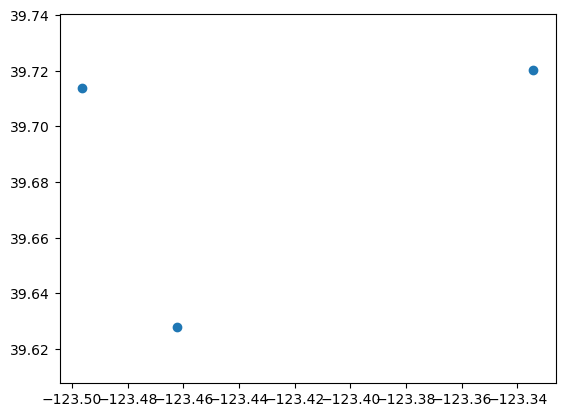

Error for layout 0067_03550: not enough values to unpack (expected 3, got 2)
0246_00984
No fires found for layout 0246_00984 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2006-07-09 00:00:00
0084_02609
No fires found for layout 0084_02609 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2005-08-07 00:00:00
0247_03453
No fires found for layout 0247_03453 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2007-09-03 00:00:00
0065_03061
Layout ./WideDataset/0065_03061/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0065_03061/Satellite_Image_Mask/ does not exist
0064_02717
Layout ./WideDataset/0064_02717/Satellite_Images_Mask/ does not exist
No fires found for layout 0064_02717 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2005-08-08 00:00:00
0066_03773
Layout ./WideDataset/0066_03773/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0066_03773/Satellite_Image_Mask/ does not

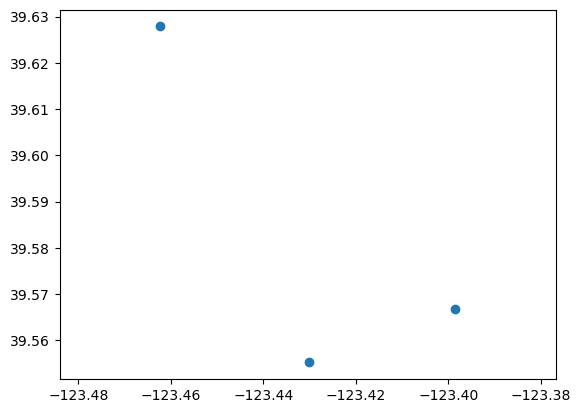

Error for layout 0059_02804: not enough values to unpack (expected 3, got 2)
0102_01733
Sampler built with 22 ignition dates.


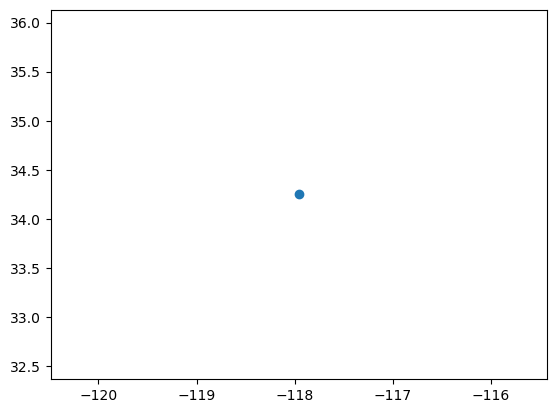

Scenario 0102_00647 has the wrong size for layout 0102_01733: 846 != 565 or 1046 != 555


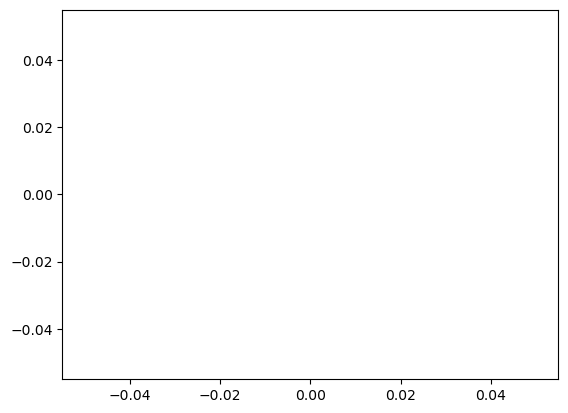

Failed 0
Layout 0102_01733: 682 fires, 0 failed, 0.0
0103_01810
Sampler built with 22 ignition dates.


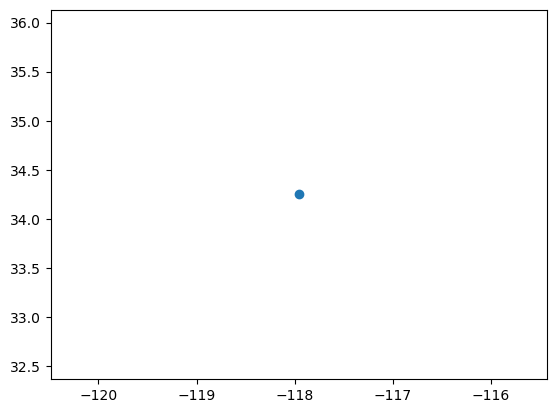

Scenario 0103_00524 has the wrong size for layout 0103_01810: 846 != 591 or 1046 != 638


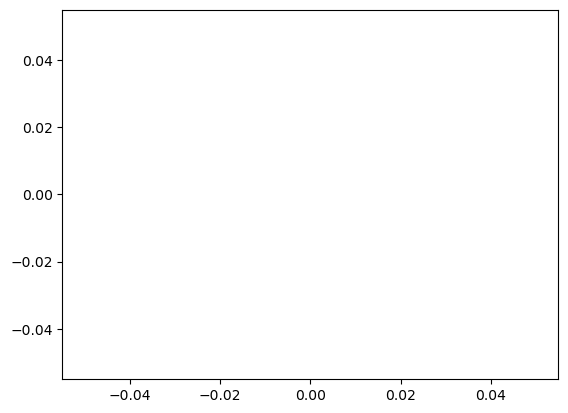

Failed 0
Layout 0103_01810: 682 fires, 0 failed, 0.0
0068_04211
Layout ./WideDataset/0068_04211/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0068_04211/Satellite_Image_Mask/ does not exist
0082_03155
Error processing 0082_01690: unconverted data remains:  
Error processing 0082_00742: unconverted data remains:  
Error processing 0082_02829: unconverted data remains:  
Error processing 0082_02015: unconverted data remains:  
Error processing 0082_02227: unconverted data remains:  
Error processing 0082_00570: unconverted data remains:  0
Error processing 0082_02643: unconverted data remains:  
Error processing 0082_00114: unconverted data remains:  
Error processing 0082_00928: unconverted data remains:  0
Error processing 0082_00326: unconverted data remains:  
Error processing 0082_02471: unconverted data remains:  
Error processing 0082_01032: unconverted data remains:  
Error processing 0082_01200: unconverted data remains:  0
Error processing 0082_02485: unconverted d

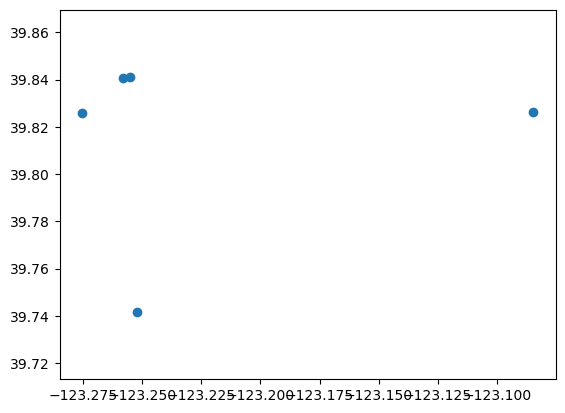

Error for layout 0082_03155: not enough values to unpack (expected 3, got 2)
0261_02900
Error processing 0261_01852: unconverted data remains:  0
Error processing 0261_00980: unconverted data remains:  
Error processing 0261_01638: unconverted data remains:  0
Error processing 0261_02881: unconverted data remains:  
Error processing 0261_02049: unconverted data remains:  
Error processing 0261_02875: unconverted data remains:  
Error processing 0261_00974: unconverted data remains:  
Error processing 0261_00148: unconverted data remains:  
Error processing 0261_01435: unconverted data remains:  
Error processing 0261_02082: unconverted data remains:  
Error processing 0261_01607: unconverted data remains:  
Error processing 0261_01263: unconverted data remains:  
Error processing 0261_01051: unconverted data remains:  
Error processing 0261_00183: unconverted data remains:  
Error processing 0261_02412: unconverted data remains:  
Error processing 0261_01297: unconverted data remains: 

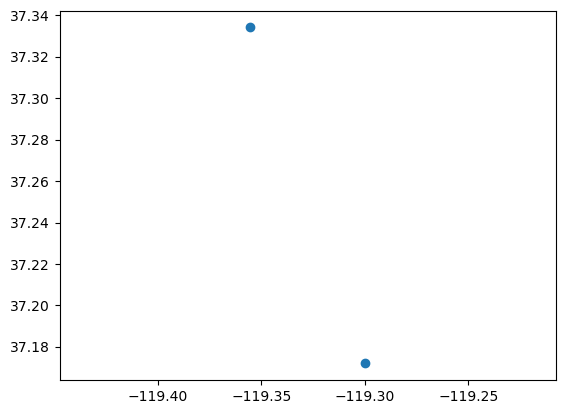

Error for layout 0261_02900: not enough values to unpack (expected 3, got 2)
0057_03186
Error processing 0057_02208: unconverted data remains:  0
Error processing 0057_02806: unconverted data remains:  
Error processing 0057_00309: unconverted data remains:  
Error processing 0057_00907: unconverted data remains:  
Error processing 0057_02698: unconverted data remains:  
Error processing 0057_01821: unconverted data remains:  
Error processing 0057_01479: unconverted data remains:  
Error processing 0057_00799: unconverted data remains:  0
Error processing 0057_00104: unconverted data remains:  
Error processing 0057_00938: unconverted data remains:  0
Error processing 0057_02653: unconverted data remains:  
Error processing 0057_02461: unconverted data remains:  
Error processing 0057_00336: unconverted data remains:  0
Error processing 0057_02839: unconverted data remains:  
Error processing 0057_02005: unconverted data remains:  
Error processing 0057_01680: unconverted data remains

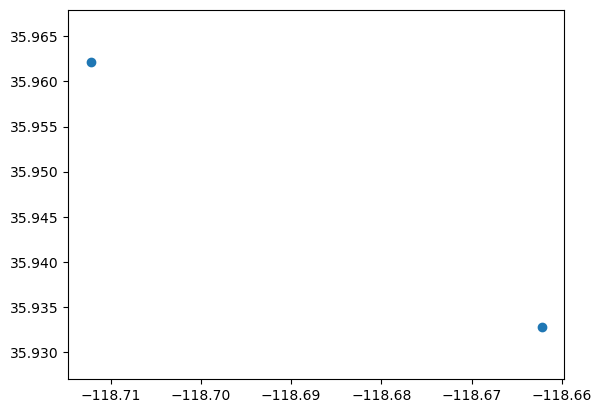

Error for layout 0057_03186: not enough values to unpack (expected 3, got 2)
0090_00987
Sampler built with 17 ignition dates.


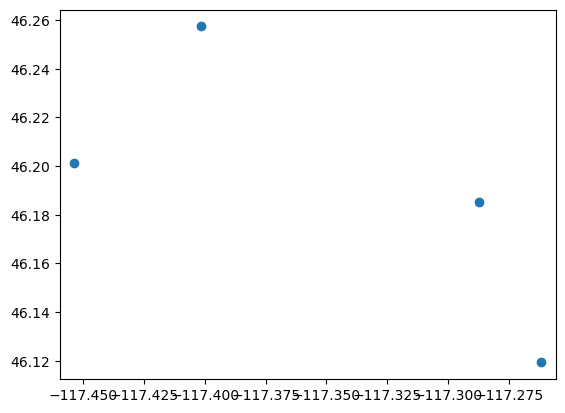

Scenario 0090_00947 has the wrong size for layout 0090_00987: 931 != 555 or 1009 != 505


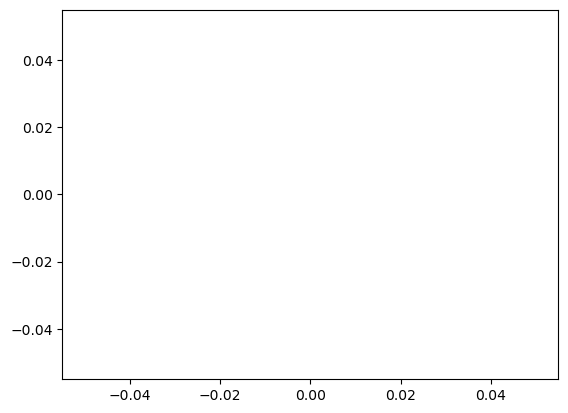

Failed 0
Layout 0090_00987: 268 fires, 0 failed, 0.0
0242_02940
Layout ./WideDataset/0242_02940/Satellite_Images_Mask/ does not exist
Error processing 0242_00509: unconverted data remains:  0
Error processing 0242_02850: unconverted data remains:  
Error processing 0242_02408: unconverted data remains:  
Error processing 0242_00951: unconverted data remains:  
Error processing 0242_01883: unconverted data remains:  0
Error processing 0242_01279: unconverted data remains:  
Error processing 0242_00199: unconverted data remains:  0
Error processing 0242_01877: unconverted data remains:  0
Error processing 0242_02098: unconverted data remains:  
Error processing 0242_00152: unconverted data remains:  
Error processing 0242_01080: unconverted data remains:  
Error processing 0242_02605: unconverted data remains:  
Error processing 0242_02437: unconverted data remains:  
Error processing 0242_00360: unconverted data remains:  
Error processing 0242_02053: unconverted data remains:  
Error p

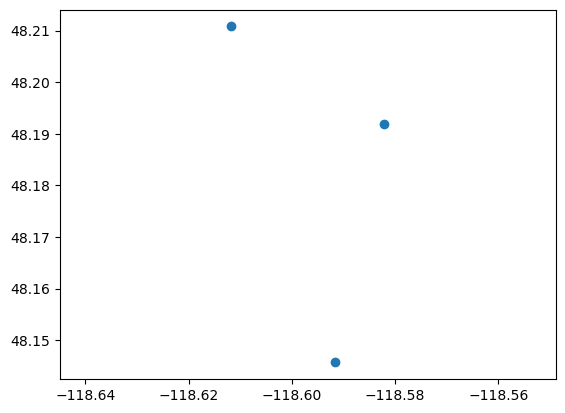

Error for layout 0242_02940: not enough values to unpack (expected 3, got 2)
0245_03988
Layout ./WideDataset/0245_03988/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0245_03988/Satellite_Image_Mask/ does not exist
0081_03471
Error processing 0081_02782: unconverted data remains:  
Error processing 0081_01107: unconverted data remains:  
Error processing 0081_01335: unconverted data remains:  
Error processing 0081_03462: unconverted data remains:  
Error processing 0081_00683: unconverted data remains:  0
Error processing 0081_01751: unconverted data remains:  
Error processing 0081_03006: unconverted data remains:  
Error processing 0081_03234: unconverted data remains:  
Error processing 0081_01563: unconverted data remains:  
Error processing 0081_00677: unconverted data remains:  
Error processing 0081_02120: unconverted data remains:  
Error processing 0081_02312: unconverted data remains:  0
Error processing 0081_00445: unconverted data remains:  
Error processing 00

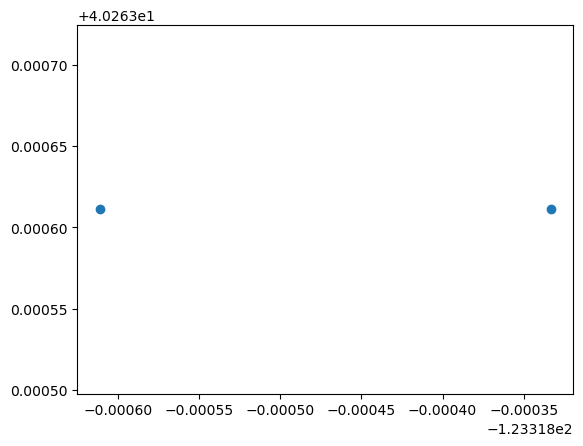

Error for layout 0081_03471: not enough values to unpack (expected 3, got 2)
0060_03010
Layout ./WideDataset/0060_03010/Satellite_Images_Mask/ does not exist
Error processing 0060_02157: unconverted data remains:  
Error processing 0060_00600: unconverted data remains:  
Error processing 0060_00432: unconverted data remains:  
Error processing 0060_02365: unconverted data remains:  0
Error processing 0060_01184: unconverted data remains:  
Error processing 0060_00056: unconverted data remains:  
Error processing 0060_02701: unconverted data remains:  
Error processing 0060_02533: unconverted data remains:  0
Error processing 0060_00264: unconverted data remains:  
Error processing 0060_01170: unconverted data remains:  0
Error processing 0060_01342: unconverted data remains:  0
Error processing 0060_00290: unconverted data remains:  
Error processing 0060_01726: unconverted data remains:  0
Error processing 0060_01514: unconverted data remains:  0
Error processing 0060_02391: unconvert

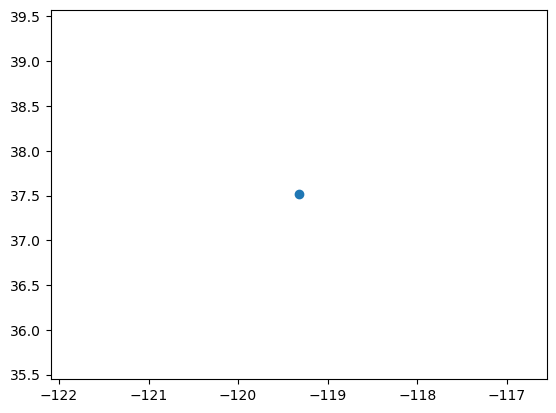

Error for layout 0060_03010: not enough values to unpack (expected 3, got 2)
0062_03187
Layout ./WideDataset/0062_03187/Satellite_Images_Mask/ does not exist
Error processing 0062_01326: unconverted data remains:  0
Error processing 0062_01928: unconverted data remains:  
Error processing 0062_01114: unconverted data remains:  
Error processing 0062_02791: unconverted data remains:  
Error processing 0062_01570: unconverted data remains:  0
Error processing 0062_03015: unconverted data remains:  
Error processing 0062_01742: unconverted data remains:  
Error processing 0062_00690: unconverted data remains:  
Error processing 0062_01584: unconverted data remains:  
Error processing 0062_00456: unconverted data remains:  0
Error processing 0062_02301: unconverted data remains:  
Error processing 0062_02133: unconverted data remains:  
Error processing 0062_00664: unconverted data remains:  
Error processing 0062_02557: unconverted data remains:  0
Error processing 0062_00200: unconverted

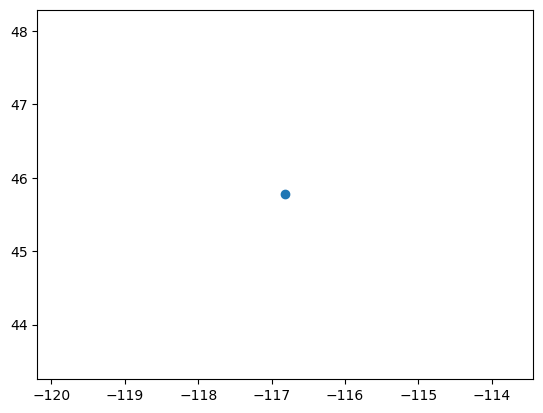

Error for layout 0062_03187: not enough values to unpack (expected 3, got 2)
0262_03319
Error processing 0262_02940: unconverted data remains:  
Error processing 0262_00419: unconverted data remains:  
Error processing 0262_00841: unconverted data remains:  
Error processing 0262_01993: unconverted data remains:  
Error processing 0262_02518: unconverted data remains:  
Error processing 0262_00089: unconverted data remains:  
Error processing 0262_01967: unconverted data remains:  
Error processing 0262_01369: unconverted data remains:  0
Error processing 0262_02188: unconverted data remains:  
Error processing 0262_03268: unconverted data remains:  
Error processing 0262_02527: unconverted data remains:  
Error processing 0262_00270: unconverted data remains:  
Error processing 0262_00042: unconverted data remains:  
Error processing 0262_01190: unconverted data remains:  0
Error processing 0262_02715: unconverted data remains:  
Error processing 0262_00426: unconverted data remains: 

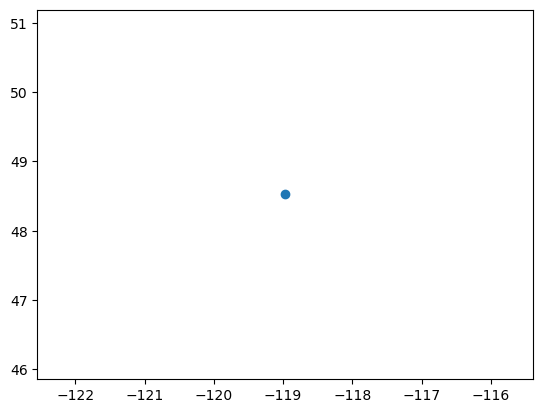

Error for layout 0262_03319: not enough values to unpack (expected 3, got 2)
0260_03391
Error processing 0260_02588: unconverted data remains:  
Error processing 0260_01903: unconverted data remains:  0
Error processing 0260_00489: unconverted data remains:  
Error processing 0260_01769: unconverted data remains:  
Error processing 0260_02924: unconverted data remains:  
Error processing 0260_02118: unconverted data remains:  0
Error processing 0260_00019: unconverted data remains:  
Error processing 0260_00825: unconverted data remains:  
Error processing 0260_03001: unconverted data remains:  
Error processing 0260_00684: unconverted data remains:  
Error processing 0260_01756: unconverted data remains:  
Error processing 0260_01564: unconverted data remains:  
Error processing 0260_03233: unconverted data remains:  
Error processing 0260_01100: unconverted data remains:  
Error processing 0260_02785: unconverted data remains:  0
Error processing 0260_01332: unconverted data remains:

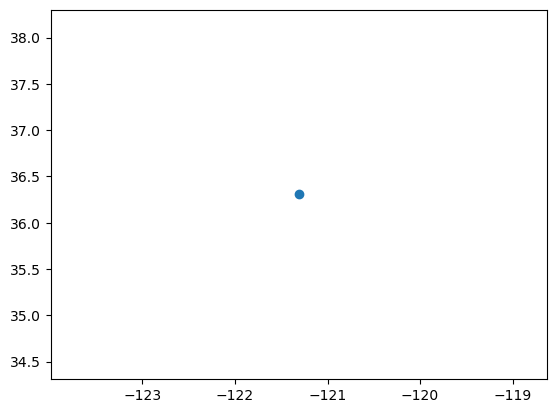

Error for layout 0260_03391: not enough values to unpack (expected 3, got 2)
0058_03866
Layout ./WideDataset/0058_03866/Satellite_Images_Mask/ does not exist
No fires found for layout 0058_03866 between 2016-07-15 00:00:00 and 2016-09-03 23:00:00
example  fire date: 2005-05-20 00:00:00
0244_03110
Layout ./WideDataset/0244_03110/Satellite_Images_Mask/ does not exist
Error processing 0244_01508: unconverted data remains:  
Error processing 0244_02983: unconverted data remains:  
Error processing 0244_01950: unconverted data remains:  
Error processing 0244_00882: unconverted data remains:  0
Error processing 0244_00278: unconverted data remains:  0
Error processing 0244_00876: unconverted data remains:  
Error processing 0244_01198: unconverted data remains:  
Error processing 0244_02379: unconverted data remains:  
Error processing 0244_03099: unconverted data remains:  
Error processing 0244_02977: unconverted data remains:  
Error processing 0244_01153: unconverted data remains:  0
Er

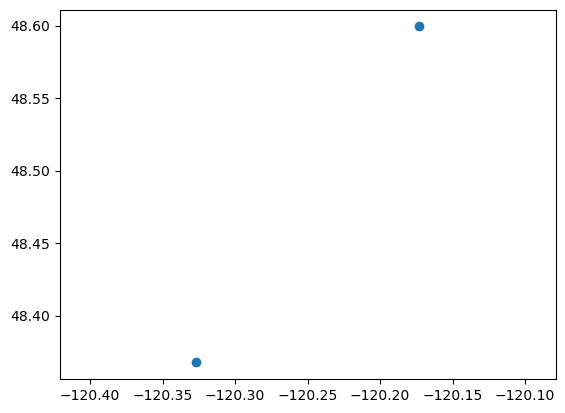

Error for layout 0244_03110: not enough values to unpack (expected 3, got 2)
0094_01688
Sampler built with 29 ignition dates.


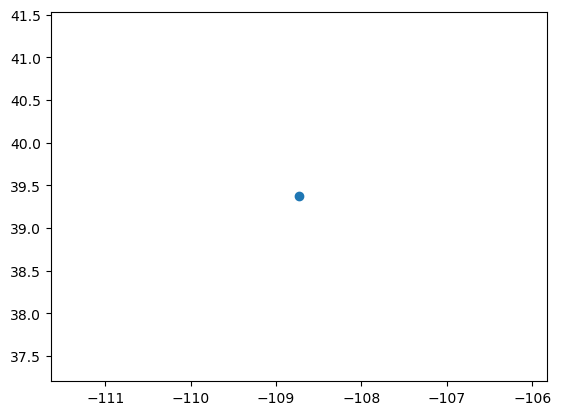

Scenario 0094_00038 has the wrong size for layout 0094_01688: 1102 != 494 or 977 != 534


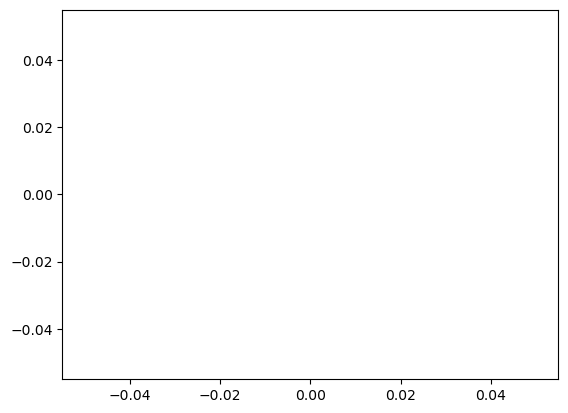

Failed 0
Layout 0094_01688: 272 fires, 0 failed, 0.0
0095_01726
Sampler built with 0 ignition dates.


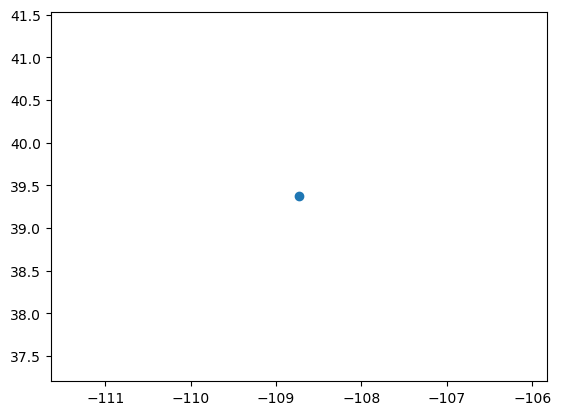

Scenario out210_2_ArrivalTime has the wrong size for layout 0095_01726: 1102 != 558 or 977 != 487


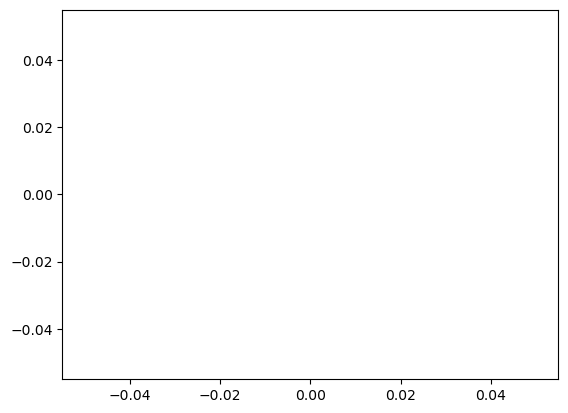

Failed 0
Layout 0095_01726: 272 fires, 0 failed, 0.0
0093_01748
Sampler built with 29 ignition dates.


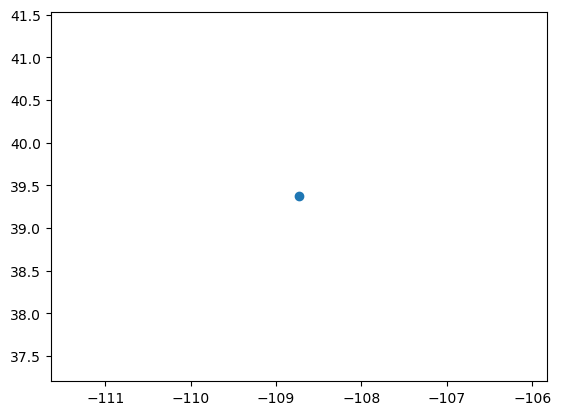

Scenario 0093_01168 has the wrong size for layout 0093_01748: 1102 != 492 or 977 != 514


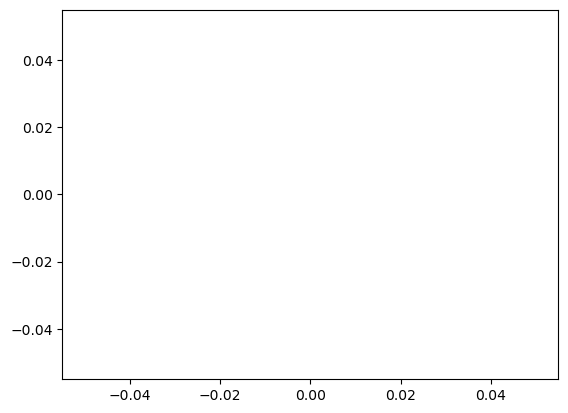

Failed 0
Layout 0093_01748: 272 fires, 0 failed, 0.0
0083_02892
Error processing 0083_02376: unconverted data remains:  
Error processing 0083_00421: unconverted data remains:  0
Error processing 0083_00613: unconverted data remains:  
Error processing 0083_02144: unconverted data remains:  
Error processing 0083_00277: unconverted data remains:  
Error processing 0083_02520: unconverted data remains:  0
Error processing 0083_02712: unconverted data remains:  0
Error processing 0083_00879: unconverted data remains:  0
Error processing 0083_00045: unconverted data remains:  
Error processing 0083_01197: unconverted data remains:  
Error processing 0083_00283: unconverted data remains:  
Error processing 0083_01351: unconverted data remains:  
Error processing 0083_01163: unconverted data remains:  0
Error processing 0083_02382: unconverted data remains:  
Error processing 0083_01507: unconverted data remains:  
Error processing 0083_01735: unconverted data remains:  
Error processing 00

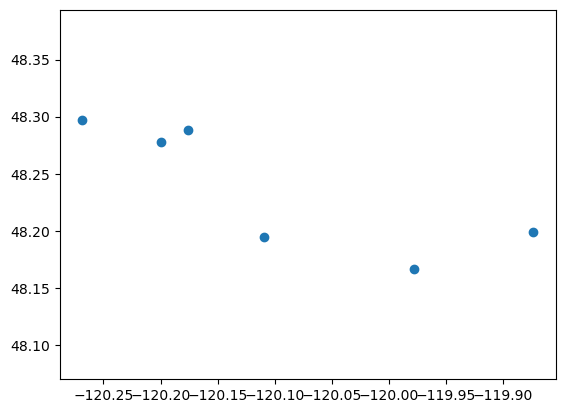

Error for layout 0083_02892: not enough values to unpack (expected 3, got 2)
0021_01232
Layout 0021_01232 has no fires before 2021: 2022-03-31 00:00:00
0020_00970
Layout 0020_00970 has no fires before 2021: 2022-03-31 00:00:00
0063_02387
Layout ./WideDataset/0063_02387/Satellite_Images_Mask/ does not exist
Error processing 0063_00197: unconverted data remains:  
Error processing 0063_01045: unconverted data remains:  
Error processing 0063_01879: unconverted data remains:  
Error processing 0063_01277: unconverted data remains:  
Error processing 0063_02096: unconverted data remains:  
Error processing 0063_01613: unconverted data remains:  0
Error processing 0063_01421: unconverted data remains:  
Error processing 0063_02062: unconverted data remains:  
Error processing 0063_00735: unconverted data remains:  
Error processing 0063_00507: unconverted data remains:  0
Error processing 0063_02250: unconverted data remains:  0
Error processing 0063_00163: unconverted data remains:  
Error

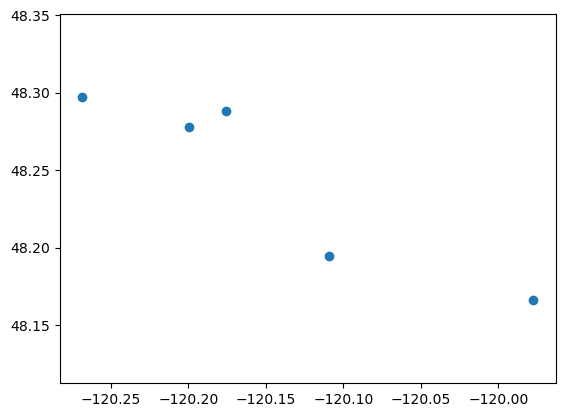

Error for layout 0063_02387: not enough values to unpack (expected 3, got 2)
0061_03726
Layout ./WideDataset/0061_03726/Satellite_Images_Mask/ does not exist
Error processing 0061_00563: unconverted data remains:  
Error processing 0061_02234: unconverted data remains:  
Error processing 0061_02006: unconverted data remains:  
Error processing 0061_00751: unconverted data remains:  
Error processing 0061_01683: unconverted data remains:  
Error processing 0061_02462: unconverted data remains:  
Error processing 0061_00335: unconverted data remains:  
Error processing 0061_00107: unconverted data remains:  
Error processing 0061_02650: unconverted data remains:  0
Error processing 0061_03544: unconverted data remains:  
Error processing 0061_02496: unconverted data remains:  
Error processing 0061_01213: unconverted data remains:  
Error processing 0061_01021: unconverted data remains:  
Error processing 0061_00597: unconverted data remains:  0
Error processing 0061_01445: unconverted d

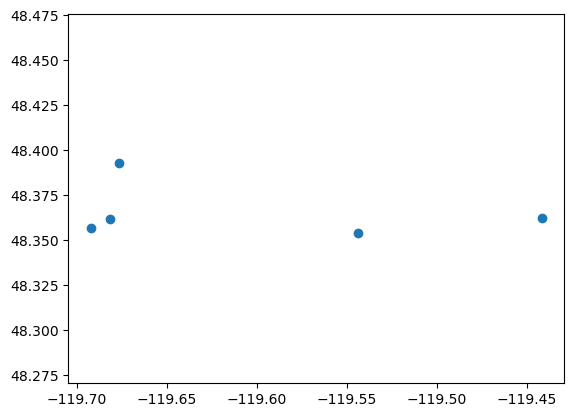

Error for layout 0061_03726: not enough values to unpack (expected 3, got 2)
0100_02449
Sampler built with 22 ignition dates.


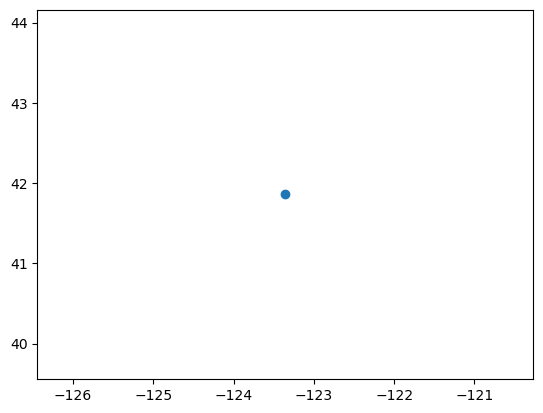

Scenario 0100_01361 has the wrong size for layout 0100_02449: 1163 != 572 or 945 != 471


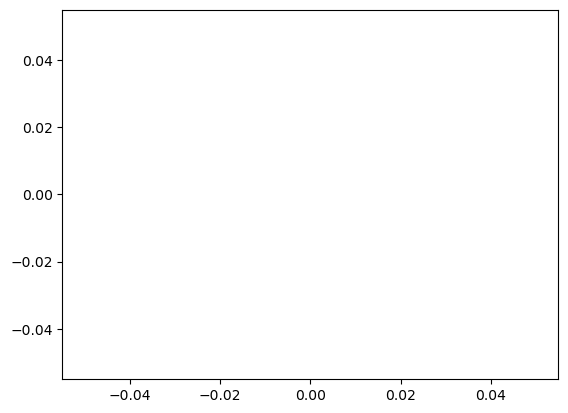

Failed 0
Layout 0100_02449: 420 fires, 0 failed, 0.0
0098_01784
Sampler built with 22 ignition dates.


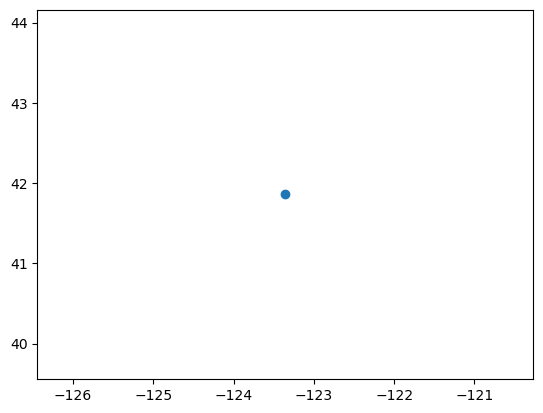

Scenario 0098_01539 has the wrong size for layout 0098_01784: 1163 != 520 or 945 != 487


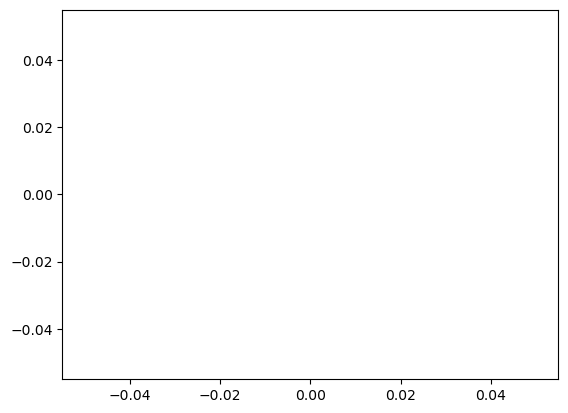

Failed 0
Layout 0098_01784: 420 fires, 0 failed, 0.0
0048_01141
Layout 0048_01141 has no fires before 2021: 2022-03-27 00:00:00
0047_05424
Layout 0047_05424 has no fires before 2021: 2022-03-27 00:00:00
0049_01289
Layout 0049_01289 has no fires before 2021: 2022-03-27 00:00:00
0114_02292
Error processing 0114_00559: unconverted data remains:  0
Error processing 0114_00901: unconverted data remains:  0
Error processing 0114_01229: unconverted data remains:  
Error processing 0114_01827: unconverted data remains:  
Error processing 0114_00102: unconverted data remains:  0
Error processing 0114_00330: unconverted data remains:  
Error processing 0114_02003: unconverted data remains:  
Error processing 0114_00754: unconverted data remains:  
Error processing 0114_01686: unconverted data remains:  
Error processing 0114_00566: unconverted data remains:  
Error processing 0114_02231: unconverted data remains:  
Error processing 0114_01672: unconverted data remains:  0
Error processing 0114_0

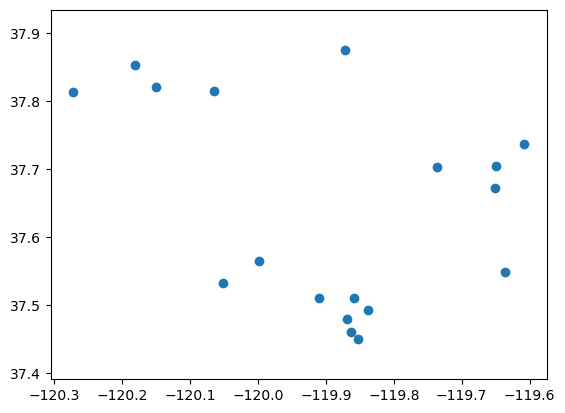

Scenario 0114_00559 has the wrong size for layout 0114_02292: 1995 != 671 or 1974 != 634


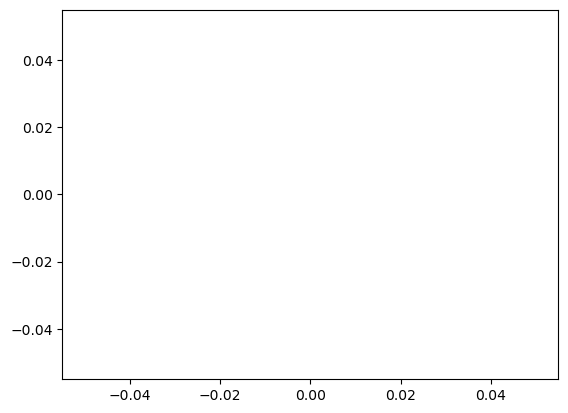

Failed 0
Layout 0114_02292: 2703 fires, 0 failed, 0.0
0113_03495
Error processing 0113_02882: unconverted data remains:  
Error processing 0113_01409: unconverted data remains:  
Error processing 0113_00983: unconverted data remains:  
Error processing 0113_01851: unconverted data remains:  
Error processing 0113_01099: unconverted data remains:  0
Error processing 0113_00977: unconverted data remains:  
Error processing 0113_00379: unconverted data remains:  0
Error processing 0113_02876: unconverted data remains:  
Error processing 0113_03198: unconverted data remains:  0
Error processing 0113_02278: unconverted data remains:  
Error processing 0113_01260: unconverted data remains:  
Error processing 0113_00180: unconverted data remains:  
Error processing 0113_01052: unconverted data remains:  
Error processing 0113_03361: unconverted data remains:  
Error processing 0113_01436: unconverted data remains:  
Error processing 0113_01604: unconverted data remains:  
Error processing 011

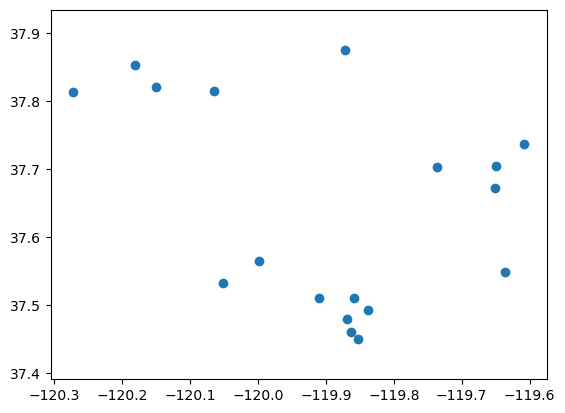

Scenario 0113_02882 has the wrong size for layout 0113_03495: 1995 != 857 or 1974 != 773


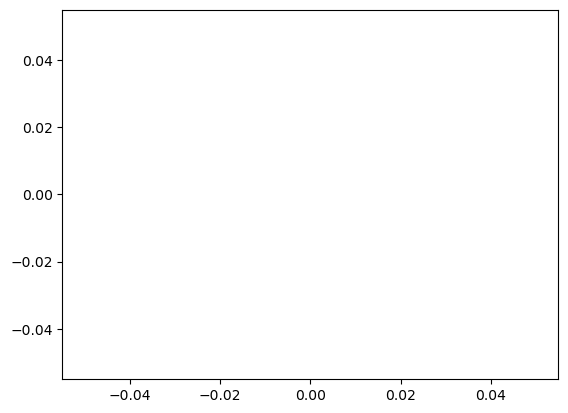

Failed 0
Layout 0113_03495: 2703 fires, 0 failed, 0.0
0258_02858
Error processing 0258_00492: unconverted data remains:  
Error processing 0258_01540: unconverted data remains:  
Error processing 0258_01772: unconverted data remains:  
Error processing 0258_01316: unconverted data remains:  
Error processing 0258_02593: unconverted data remains:  
Error processing 0258_01918: unconverted data remains:  
Error processing 0258_01124: unconverted data remains:  
Error processing 0258_00230: unconverted data remains:  
Error processing 0258_02567: unconverted data remains:  
Error processing 0258_02755: unconverted data remains:  
Error processing 0258_00002: unconverted data remains:  
Error processing 0258_02331: unconverted data remains:  
Error processing 0258_00466: unconverted data remains:  
Error processing 0258_00654: unconverted data remains:  
Error processing 0258_01786: unconverted data remains:  
Error processing 0258_02103: unconverted data remains:  
Error processing 0258_0

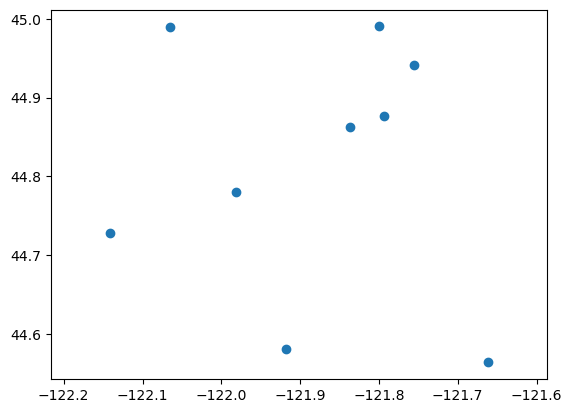

Scenario 0258_00492 has the wrong size for layout 0258_02858: 2263 != 1057 or 1840 != 960


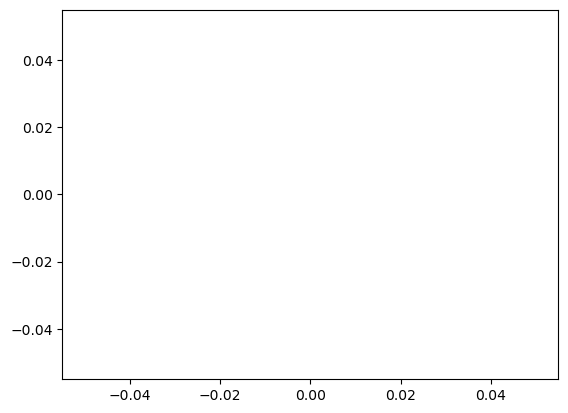

Failed 0
Layout 0258_02858: 1891 fires, 0 failed, 0.0
0257_02175
Error processing 0257_00180: unconverted data remains:  0
Error processing 0257_01052: unconverted data remains:  
Error processing 0257_01260: unconverted data remains:  
Error processing 0257_02081: unconverted data remains:  
Error processing 0257_01604: unconverted data remains:  
Error processing 0257_01436: unconverted data remains:  
Error processing 0257_02075: unconverted data remains:  0
Error processing 0257_00722: unconverted data remains:  
Error processing 0257_00510: unconverted data remains:  
Error processing 0257_00948: unconverted data remains:  
Error processing 0257_00174: unconverted data remains:  
Error processing 0257_00346: unconverted data remains:  0
Error processing 0257_01294: unconverted data remains:  
Error processing 0257_01409: unconverted data remains:  
Error processing 0257_00983: unconverted data remains:  0
Error processing 0257_01851: unconverted data remains:  0
Error processing 0

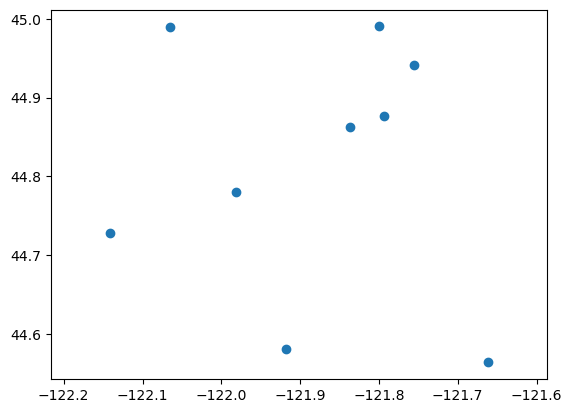

Scenario 0257_00180 has the wrong size for layout 0257_02175: 2263 != 1142 or 1840 != 1053


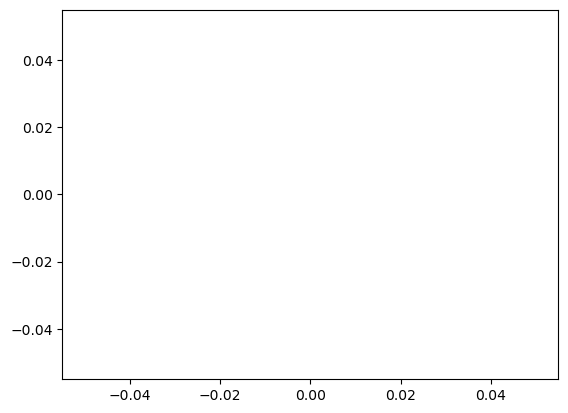

Failed 0
Layout 0257_02175: 1891 fires, 0 failed, 0.0
0253_03246
Error processing 0253_03222: unconverted data remains:  
Error processing 0253_01575: unconverted data remains:  
Error processing 0253_01747: unconverted data remains:  
Error processing 0253_00695: unconverted data remains:  0
Error processing 0253_03010: unconverted data remains:  
Error processing 0253_01323: unconverted data remains:  0
Error processing 0253_02794: unconverted data remains:  
Error processing 0253_01111: unconverted data remains:  
Error processing 0253_00205: unconverted data remains:  
Error processing 0253_02552: unconverted data remains:  
Error processing 0253_02760: unconverted data remains:  
Error processing 0253_00037: unconverted data remains:  
Error processing 0253_02304: unconverted data remains:  
Error processing 0253_01581: unconverted data remains:  
Error processing 0253_00453: unconverted data remains:  
Error processing 0253_00661: unconverted data remains:  0
Error processing 025

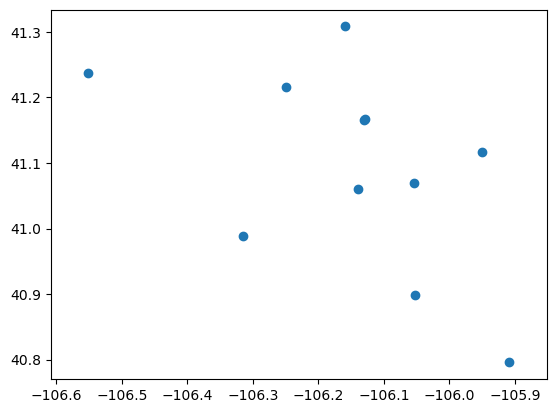

Scenario 0253_03222 has the wrong size for layout 0253_03246: 2712 != 812 or 2318 != 721


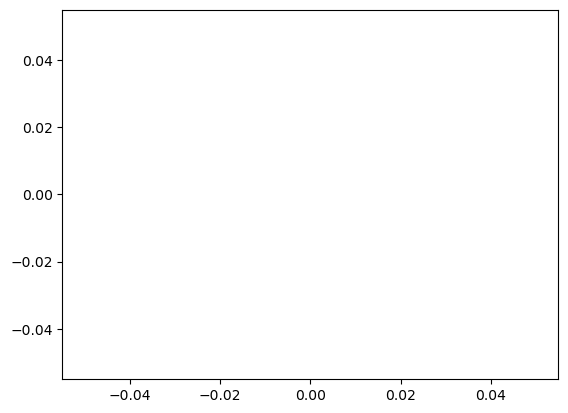

Failed 0
Layout 0253_03246: 422 fires, 0 failed, 0.0
0255_02103
Error processing 0255_00574: unconverted data remains:  
Error processing 0255_02011: unconverted data remains:  
Error processing 0255_00746: unconverted data remains:  0
Error processing 0255_01694: unconverted data remains:  
Error processing 0255_00322: unconverted data remains:  0
Error processing 0255_00110: unconverted data remains:  
Error processing 0255_01204: unconverted data remains:  
Error processing 0255_01036: unconverted data remains:  
Error processing 0255_00580: unconverted data remains:  
Error processing 0255_01452: unconverted data remains:  0
Error processing 0255_01660: unconverted data remains:  
Error processing 0255_00913: unconverted data remains:  
Error processing 0255_00779: unconverted data remains:  
Error processing 0255_01499: unconverted data remains:  
Error processing 0255_01835: unconverted data remains:  
Error processing 0255_01009: unconverted data remains:  
Error processing 0255

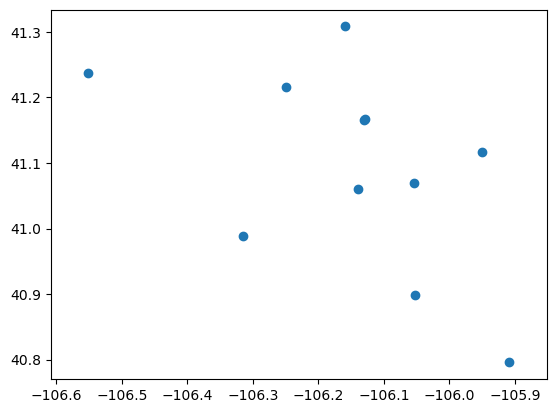

Scenario 0255_00574 has the wrong size for layout 0255_02103: 2712 != 632 or 2318 != 604


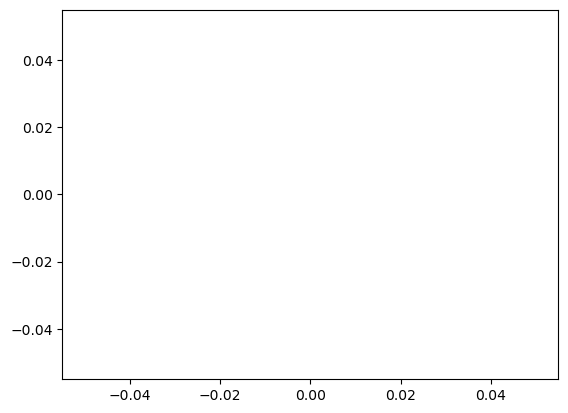

Failed 0
Layout 0255_02103: 422 fires, 0 failed, 0.0
0254_02361
Error processing 0254_02140: unconverted data remains:  
Error processing 0254_00617: unconverted data remains:  
Error processing 0254_00425: unconverted data remains:  
Error processing 0254_01193: unconverted data remains:  
Error processing 0254_00041: unconverted data remains:  
Error processing 0254_00273: unconverted data remains:  
Error processing 0254_01167: unconverted data remains:  
Error processing 0254_00889: unconverted data remains:  
Error processing 0254_01355: unconverted data remains:  
Error processing 0254_00287: unconverted data remains:  
Error processing 0254_01731: unconverted data remains:  0
Error processing 0254_01503: unconverted data remains:  
Error processing 0254_01990: unconverted data remains:  
Error processing 0254_00842: unconverted data remains:  
Error processing 0254_00628: unconverted data remains:  
Error processing 0254_01158: unconverted data remains:  
Error processing 0254_0

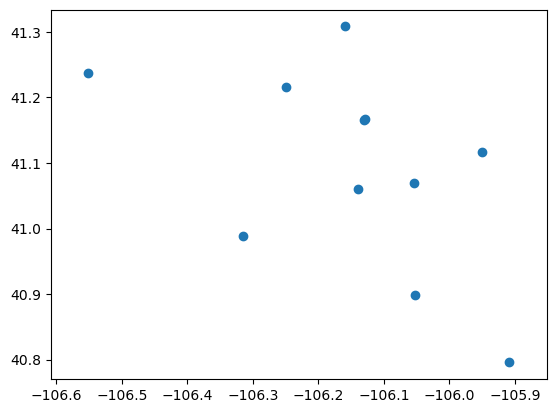

Scenario 0254_02140 has the wrong size for layout 0254_02361: 2712 != 710 or 2318 != 626


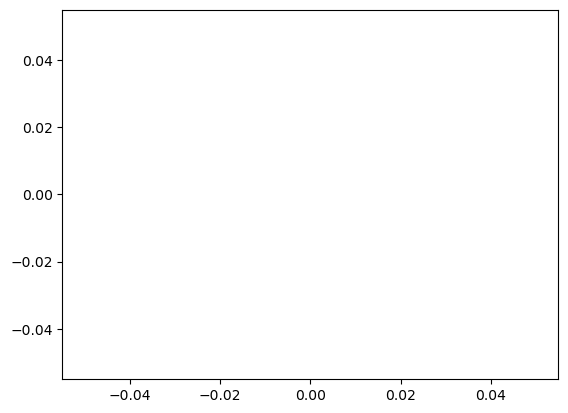

Failed 0
Layout 0254_02361: 422 fires, 0 failed, 0.0
0256_02752
Error processing 0256_01331: unconverted data remains:  
Error processing 0256_01103: unconverted data remains:  
Error processing 0256_01567: unconverted data remains:  0
Error processing 0256_01755: unconverted data remains:  
Error processing 0256_00687: unconverted data remains:  
Error processing 0256_01593: unconverted data remains:  
Error processing 0256_00441: unconverted data remains:  
Error processing 0256_02316: unconverted data remains:  
Error processing 0256_02124: unconverted data remains:  
Error processing 0256_00673: unconverted data remains:  
Error processing 0256_02540: unconverted data remains:  
Error processing 0256_00217: unconverted data remains:  
Error processing 0256_00025: unconverted data remains:  0
Error processing 0256_00819: unconverted data remains:  0
Error processing 0256_01558: unconverted data remains:  
Error processing 0256_01900: unconverted data remains:  
Error processing 0256

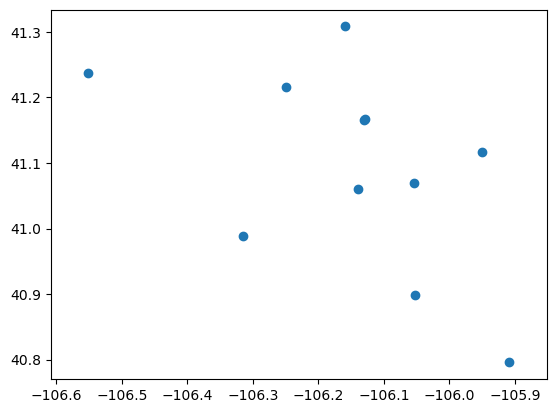

Scenario 0256_01331 has the wrong size for layout 0256_02752: 2712 != 720 or 2318 != 689


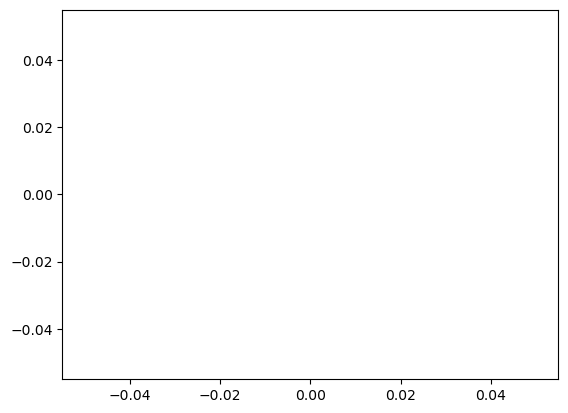

Failed 0
Layout 0256_02752: 422 fires, 0 failed, 0.0
112
131
['0086_02230', '0087_02445', '0102_01733', '0103_01810', '0090_00987', '0094_01688', '0095_01726', '0093_01748', '0100_02449', '0098_01784', '0114_02292', '0113_03495', '0258_02858', '0257_02175', '0253_03246', '0255_02103', '0254_02361', '0256_02752']


In [8]:
from Scenario_sampler import ScenarioSamplerDate
# Get the layout coordinates 
# 1 extract the tif files
dataset_path = "./WideDataset/"

# copy the layout tifs from a folder to a folder called sim2real_layout
tif_path = "sim2real_layouts"
os.makedirs(tif_path, exist_ok=True)
for folder in os.listdir(dataset_path):
    if folder == ".DS_Store":
        continue
    shutil.copy(f"WideDataset/{folder}/Vegetation_Map/Existing_Vegetation_Cover.tif", f"{tif_path}/{folder}_Existing_Vegetation_Cover.tif")

print("Copied the layout tifs to sim2real_layouts")
####

tif_files = glob(os.path.join(tif_path, "*.tif"))
layout_list = []
widths = []
names = []
for tif_file in tif_files:
    with rasterio.open(tif_file) as dataset:
        # get the file name without the path
        file_name = os.path.basename(tif_file)  # '0004_Elevation.tif'
        identifier = "_".join(file_name.split('_')[:2])

        # extract the resolution, check it is 30
        x_resolution = dataset.transform[0]
        y_resolution = -dataset.transform[4]
        assert x_resolution == y_resolution == 30, f"Resolution is not the same: {x_resolution} != {y_resolution}"

        # extract the coordinates using the bounds
        # /!\ DO NOT USE transform_bounds(dataset.crs, 'EPSG:4326', *dataset.bounds)
        x_min = dataset.bounds[0]
        x_max = dataset.bounds[2]
        y_min = dataset.bounds[1]
        y_max = dataset.bounds[3]

        transformer = Transformer.from_crs(dataset.crs, "EPSG:4326", always_xy=True)
        lat_top_left, lon_top_left = transformer.transform(x_min, y_max)
        lat_top_right, lon_top_right = transformer.transform(x_max, y_max)
        lat_bottom_left, lon_bottom_left = transformer.transform(x_min, y_min)
        lat_bottom_right, lon_bottom_right = transformer.transform(x_max, y_min)

        # Create the polygon using the transformed bounds
        polygon = Polygon((
            (lat_top_left, lon_top_left),
            (lat_top_right, lon_top_right),
            (lat_bottom_right, lon_bottom_right),
            (lat_bottom_left, lon_bottom_left),
            (lat_top_left, lon_top_left)  # close the polygon
        ))

        layout_list.append({
            'identifier': identifier,
            'height': dataset.height,
            'width': dataset.width,
            'geometry': polygon,
            'transformer': transformer,
            'dataset': dataset
        })


        widths.append(dataset.width)
        names.append(identifier)

sorted_indices = np.argsort(widths)
widths = np.array(widths)[sorted_indices]
names = np.array(names)[sorted_indices]
filtered_layout_list = [layout_list[i] for i in sorted_indices]

n_small_layouts = len(widths[widths < 500])
n_medium_layouts = len(widths[(widths >= 500) & (widths < 1000)])
n_large_layouts = len(widths[widths >= 1000])

small_layouts = filtered_layout_list[:n_small_layouts]
medium_layouts = filtered_layout_list[n_small_layouts:n_small_layouts + n_medium_layouts]
large_layouts = filtered_layout_list[n_small_layouts + n_medium_layouts:]

print("loaded the layout list")


# convert the layout list to a geopandas df
gdf = gpd.GeoDataFrame(layout_list, geometry='geometry', crs="EPSG:4326")




# Load the historical fires 
# fires_gdf = gpd.read_file("./FPA_FOD_20210617.gpkg")
# fires_gdf = fires_gdf.to_crs("EPSG:4326")
print("loaded the fires")


# Joint
# Spatial join: find which points fall into which polygons
joined = gpd.sjoin(fires_gdf, gdf, how='inner', predicate='within')


# Count points per polygon
counts = joined.groupby('identifier').size().reset_index(name='fire_count')


dataset_path = "./WideDataset/"
scenario_path_suffix = "/Satellite_Images_Mask/"

failed_layouts = []
processed_layouts = []
continue_out = False
processed = total = 0

for layout_name in names:
    total+=1
    print(layout_name)
    try:
        layout_folder = dataset_path + layout_name + scenario_path_suffix
        # check the layout folder exists
        if not os.path.exists(layout_folder):
            print(f"Layout {layout_folder} does not exist")
            layout_folder = dataset_path + layout_name +  "/Satellite_Image_Mask/"
            if not os.path.exists(layout_folder):
                print(f"Layout {layout_folder} does not exist")
                failed_layouts.append(layout_name)
                continue
        
        if os.path.exists(f"./WideDataset/{layout_name}/selected_scenarios.txt"):
            processed +=1
            #continue

        # check that the scenario have the right size
        first_scenario = return_first_scenario(layout_folder)
        if first_scenario is None:
            print(f"Layout {layout_name} does not have any scenario")
            failed_layouts.append(layout_name)
            continue
        
        first_loaded_scenario = load_scenario(os.path.join(layout_folder, first_scenario), extension = '.jpg', first_frame_only=True)
        height_scenario, width_scenario = first_loaded_scenario.shape[0], first_loaded_scenario.shape[1]

        earliest_date, latest_date = find_earliest_latest_dates(dataset_path + layout_name)

        if earliest_date.year > 2020:
            print(f"Layout {layout_name} has no fires before 2021: {earliest_date}")
            failed_layouts.append(layout_name)
            continue

        # plot the historical fires
        data = joined[joined['identifier'] == layout_name]

        filtered_data = data[
        (data['DISCOVERY_DATE'].dt.date >= earliest_date.date()) & 
        (data['DISCOVERY_DATE'].dt.date <= latest_date.date())
        ]

        if len(filtered_data) == 0:
            print(f"No fires found for layout {layout_name} between {earliest_date} and {latest_date}")
            print("example  fire date:", data['DISCOVERY_DATE'].iloc[0])
            failed_layouts.append(layout_name)
            continue

        sampler = ScenarioSamplerDate(layout_folder, extension = '.jpg')
        sampled_scenarios = []
        sampled_ignition_points = []
        sampled_ignition_dates = []
        associated_fires = []
        date_matched = []
        distances = []
        failed = 0
        

        plt.scatter(filtered_data["LONGITUDE"], filtered_data["LATITUDE"])
        plt.axis("equal")
        plt.show()

        # start with the fires that have potewntial to be test fires, i.e their date is between the earliest and latest date
        # We will have one "test" dataset, one "train" dataset, and one extra train dataset for the test fires

        

        for i, fire in filtered_data.iterrows():
            # print the coordinates of the fire
            width, height = fire['width'], fire['height']
            # check that the scenario have the right size
            if width != width_scenario or height != height_scenario:
                print(f"Scenario {first_scenario} has the wrong size for layout {layout_name}: {width} != {width_scenario} or {height} != {height_scenario}")
                failed_layouts.append(layout_name)
                break
            dataset = fire['dataset']
            transformer = fire['transformer']
            x_fire, y_fire = transformer.transform(fire['LONGITUDE'], fire['LATITUDE'], direction='INVERSE')
            row, col = rasterio.transform.rowcol(dataset.transform, x_fire, y_fire)
            date = fire['DISCOVERY_DATE']
            # print("row, col", row, col)
            ignition_point = (col, row)
            sample, sampled_ignition_point, sampled_ignition_date = sampler.get_scenario_location(ignition_point, date = fire['DISCOVERY_DATE'], leeway_distance=5, leeway_date=1, sampling_method='closest', exclude_scenarios=sampled_scenarios)
            if sample is None:
                failed += 1
                continue
            sampled_scenarios.append(sample)
            sampled_ignition_points.append(sampled_ignition_point)
            sampled_ignition_dates.append(sampled_ignition_date)
            associated_fires.append(fire['FOD_ID'])
            distance = abs(sampled_ignition_point[0] - ignition_point[0]) + abs(sampled_ignition_point[1] - ignition_point[1])
            distances.append(distance)
        # plot the sampled scenarios
        # the axes are inverted as coordinates start in (0,0) in the top left corner
        fig, ax = plt.subplots()
        ax.scatter([point[0] for point in sampled_ignition_points], [width - point[1] for point in sampled_ignition_points], color='red')
        plt.show()
        print(f"Failed {failed}")
        # write the selected scenarios in a txt file
        with open(f"./WideDataset/{layout_name}/selected_scenarios_test.txt", "w") as f:
            for scenario, fire_id in zip(sampled_scenarios, associated_fires):
                f.write(f"{scenario}, {fire_id}\n")
            f.write(f"Failed: {failed}\n")
            failed_percentage = failed / max(len(data),1)
            f.write(f"Failed percentage: {failed_percentage}\n")
            print(f"Layout {layout_name}: {len(data)} fires, {failed} failed, {failed_percentage}")
            processed_layouts.append(layout_name)
        if len(data) == 0 or failed_percentage > 0.2:
            print(f"!! Failed {failed} out of {len(data)} for layout {layout_name} !!")
            failed_layouts.append(layout_name)
    except Exception as e:
        print(f"Error for layout {layout_name}: {e}")
        failed_layouts.append(layout_name)
print(processed)
print(total)
print(processed_layouts)
    

# TODO do we need to create the grid manually? I think the raster file will doirectly give you the coordinates within the layout


# for each fire, sample the scenario (space only, and time+space)
# write the identifier in a txt file (one for space only, one for time+space)

# move the scenarios into a selected folder
# "delete" the other scenarios

# train test split with the date









In [54]:
print([(a,b) for (a,b) in fire.items()])

[('FOD_ID', 400389827), ('FPA_ID', 'ICS209_2018_9225274'), ('SOURCE_SYSTEM_TYPE', 'INTERAGCY'), ('SOURCE_SYSTEM', 'IA-ICS209'), ('NWCG_REPORTING_AGENCY', 'ST/C&L'), ('NWCG_REPORTING_UNIT_ID', 'USKSCSX'), ('NWCG_REPORTING_UNIT_NAME', 'Chase County'), ('SOURCE_REPORTING_UNIT', 'KSCSX'), ('SOURCE_REPORTING_UNIT_NAME', 'Chase County'), ('LOCAL_FIRE_REPORT_ID', None), ('LOCAL_INCIDENT_ID', '000602'), ('FIRE_CODE', 'LP0G'), ('FIRE_NAME', '190 AND YY RD'), ('ICS_209_PLUS_INCIDENT_JOIN_ID', '2018_9225274_190 AND YY RD'), ('ICS_209_PLUS_COMPLEX_JOIN_ID', None), ('MTBS_ID', 'KS3834709637320180419'), ('MTBS_FIRE_NAME', '190 AND YY RD'), ('COMPLEX_NAME', None), ('FIRE_YEAR', 2018), ('DISCOVERY_DATE', Timestamp('2018-04-19 00:00:00+0000', tz='UTC')), ('DISCOVERY_DOY', 109), ('DISCOVERY_TIME', '1258'), ('NWCG_CAUSE_CLASSIFICATION', 'Human'), ('NWCG_GENERAL_CAUSE', 'Missing data/not specified/undetermined'), ('NWCG_CAUSE_AGE_CATEGORY', None), ('CONT_DATE', None), ('CONT_DOY', nan), ('CONT_TIME', None

NameError: name 'fire' is not defined

In [35]:
from glob import glob
import os
tif_path = "sim2real_layouts"
# Get the layout coordinates 
# 1 extract the tif files
dataset_path = "./WideDataset/"


tif_files = glob(os.path.join(tif_path, "*.tif"))
layout_list = []
widths = []
names = []
for tif_file in tif_files:
    file_name = os.path.basename(tif_file)  # '0004_Elevation.tif'
    identifier = "_".join(file_name.split('_')[:2])
    names.append(identifier)



dataset_path = "./WideDataset/"
scenario_path_suffix = "/Satellite_Images_Mask/"


##################################





total = 0
yes = 0
yesyes = 0
for layout_name in names:
    
    print(layout_name)
    try:
        layout_folder = dataset_path + layout_name + scenario_path_suffix
        # check the layout folder exists
        if not os.path.exists(layout_folder):
            print(f"Layout {layout_folder} does not exist")
            layout_folder = dataset_path + layout_name +  "/Satellite_Image_Mask/"
            if not os.path.exists(layout_folder):
                print(f"Layout {layout_folder} does not exist")
                continue

        earliest_date, latest_date = find_earliest_latest_dates(dataset_path + layout_name)
        if earliest_date is not None:
            if earliest_date.year <= 2020:
                yes+=1
            if latest_date.year <= 2020:
                yesyes+=1
        total += 1
        if total % 10 == 0:
            print(f"total: {total}, yes: {yes}, yesyes: {yesyes}")
    except Exception as e:
        print(f"Error for layout {layout_name}: {e}")
print(total)



0319_04796
0054_01387
0277_02102
0025_02019
0110_02767
Layout ./WideDataset/0110_02767/Satellite_Images_Mask/ does not exist
0278_01323
0049_01289
0321_03136
0065_03061
Layout ./WideDataset/0065_03061/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0065_03061/Satellite_Image_Mask/ does not exist
0089_00984
0018_02440
total: 10, yes: 2, yesyes: 0
0337_02831
0086_02230
0279_03823
0057_03186
Layout ./WideDataset/0057_03186/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0057_03186/Satellite_Image_Mask/ does not exist
0255_02103
0023_00995
0012_02094
0020_00970
0108_02258
Layout ./WideDataset/0108_02258/Satellite_Images_Mask/ does not exist
0345_03074
0087_02445
total: 20, yes: 6, yesyes: 0
0067_03550
0111_03612
Layout ./WideDataset/0111_03612/Satellite_Images_Mask/ does not exist
0092_03189
0016_03070
0068_04211
Layout ./WideDataset/0068_04211/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0068_04211/Satellite_Image_Mask/ does not exist
0282_03685
0246_00

KeyboardInterrupt: 

In [16]:
import pandas as pd
fires_gdf['DISCOVERY_DATE'] = pd.to_datetime(fires_gdf['DISCOVERY_DATE'])
fires_gdf['DISCOVERY_DATE'].dt.date

0          2005-02-02
1          2004-05-12
2          2004-05-31
3          2004-06-28
4          2004-06-28
              ...    
2303561    2020-06-05
2303562    2020-07-11
2303563    2020-08-27
2303564    2020-08-17
2303565    2020-11-20
Name: DISCOVERY_DATE, Length: 2303566, dtype: object

In [12]:
fires_gdf['DISCOVERY_DATE']

AttributeError: Can only use .dt accessor with datetimelike values

In [26]:
sorted_indices = np.argsort(widths)
print(names[sorted_indices[0]])
print(widths[sorted_indices[0]])

0101_02057
134


In [16]:
joined[joined['identifier'] == '0001_02614'].iloc[0]['width']

287

In [27]:
joined[joined['identifier'] == '0101_02057'].iloc[0]['width']

134

In [ ]:
for layout_name in os.listdir('./WideDataset/'):
        if os.path.exists(f"./WideDataset/{layout_name}/selected_scenarios.txt"):
            processed +=1
            #continue



print(processed)
print(total)
    